1° AVANCE

In [22]:
#importamos las librerias.
import numpy as np
import pandas as  pd


- Lee el archivo data_latinoamerica.csv con código Python en tu Visual Studio Code.

In [23]:
# data frame para la lectura del archivo propuesto para la actividad.
data  = pd.read_csv('data_latinoamerica.csv')

Carga y transformación de los datos

En este primer avance nos centraremos en el dataset proporcionado. El archivo original es considerable, con un peso de aproximadamente 21 GB, conteniendo alrededor de 22 millones de registros y 707 columnas. Conscientes de esta magnitud, los compañeros de ingeniería de datos han preparado un dataset específico, enfocado en los datos de los países de Latinoamérica. Este nuevo archivo, en formato CSV, cuenta con **12,216,057 filas y 50 columnas**, lo que facilitará su manipulación y análisis. Además, han creado un archivo adicional para facilitar el trabajo: "readme.txt" que contiene información detallada sobre las columnas seleccionadas. Es importante resaltar la importancia de una adecuada preparación y limpieza de datos para el análisis subsiguiente.

- Comprueba que el dataset cargado tiene la cantidad de registros y columnas especificadas

In [24]:
# confirmamos de que las cantidades filas y columnas corresponden a el nuevo archivo preparado por los de ingenieros de datos 
num_filas, num_columnas = data.shape

print(f"El número de filas es: {num_filas}\nEl número de columnas es: {num_columnas}")



El número de filas es: 12216057
El número de columnas es: 50


- Selecciona los países donde se expandirán: Colombia, Argentina, Chile, México, Perú y Brasil.

In [25]:
paises_seleccionados = ['Colombia','Argentina' , 'Chile', 'Mexico', 'Peru', 'Brazil']
data_latinoamerica = data[data['country_name'].isin(paises_seleccionados)] # isin para filtrar columnas

In [26]:
np.shape(data_latinoamerica) # Solo para ver la diferecia despues del filtrado por paises seleccionados

(11970289, 50)

In [27]:
data_latinoamerica.dropna(how='all', inplace=True) # para eliminar filas con valores completamente nulos 

In [28]:
data_latinoamerica.isnull().sum()[data_latinoamerica.isnull().sum()>4000000]

new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
gdp_usd                                  11963352
gdp_per_capita_usd                       11962361
smoking_prevalence                       11964343
diabetes_prevalence                      11964343
infant_mortality_rate                    11964343
nurses_per_1000                          11964343
physicians_per_1000                      11964343
population_largest_city                  11964343
area_rural_sq_km                         11964343
area_urban_sq_km                         11964343
life_expectancy                          11964343


Después de haber hecho un análisis de la calidad de los datos, podemos ver que tenemos datos faltantes en muchas columnas, por lo que después realizaremos un nuevo filtro por la columna 'Location_key' pero será mejor si solo utilizamos las instancias que corresponden a los países que hemos seleccionado y sus regiones o subregiones AR, CL, CO, MX, PE, BR

In [29]:
data_latinoamerica_paises=data_latinoamerica[data_latinoamerica['location_key'].isin(['AR','CL','CO','MX','PE','BR'])]


In [30]:
print(np.shape(data_latinoamerica_paises))

(5946, 50)


- Filtra los datos en fechas mayores a 2021-01-01.

In [31]:
data_latinoamerica_paises_Fecha=data_latinoamerica_paises[data_latinoamerica_paises['date']>'2021-01-01']

In [32]:
# Contamos valores nulos
valores_nulos_fecha=data_latinoamerica_paises_Fecha.isnull().sum()[data_latinoamerica_paises_Fecha.isnull().sum()>0]
print(valores_nulos_fecha)
print(np.shape(data_latinoamerica_paises_Fecha))

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


- Compara a nivel de país para llenar valores faltantes.

In [33]:
# Usar un for para completar los valores nulos de las columnas de la media de cada país.
for pais in paises_seleccionados:
    data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'new_confirmed'] = data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'new_confirmed'].fillna(data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'new_confirmed'].mean())
    data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'new_deceased'] = data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'new_deceased'].fillna(data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'new_deceased'].mean())
    data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'new_recovered'] = data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'new_recovered'].fillna(data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'new_recovered'].mean())
    data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'cumulative_confirmed'] = data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'cumulative_confirmed'].fillna(data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'cumulative_confirmed'].mean())
    data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'cumulative_deceased'] = data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'cumulative_deceased'].fillna(data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'cumulative_deceased'].mean())
    data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'cumulative_recovered'] = data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'cumulative_recovered'].fillna(data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'cumulative_recovered'].mean())
    data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'rainfall_mm'] = data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'rainfall_mm'].fillna(data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'rainfall_mm'].mean())
    data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'relative_humidity'] = data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'relative_humidity'].fillna(data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'relative_humidity'].mean())
    data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'average_temperature_celsius'] = data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'average_temperature_celsius'].fillna(data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'average_temperature_celsius'].mean())
    data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'minimum_temperature_celsius'] = data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'minimum_temperature_celsius'].fillna(data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'minimum_temperature_celsius'].mean())
    data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'maximum_temperature_celsius'] = data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'maximum_temperature_celsius'].fillna(data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'maximum_temperature_celsius'].mean())
    
# Llenar NaN con el valor de 0 en la columna new_recovered, cumulative_recovered, cumulative_vaccine_doses_administered para hacer análisis de estos datos.
data_latinoamerica_paises_Fecha['new_recovered'] = data_latinoamerica_paises_Fecha['new_recovered'].fillna(0)
data_latinoamerica_paises_Fecha['cumulative_recovered'] = data_latinoamerica_paises_Fecha['cumulative_recovered'].fillna(0)
data_latinoamerica_paises_Fecha['cumulative_vaccine_doses_administered'] = data_latinoamerica_paises_Fecha['cumulative_vaccine_doses_administered'].fillna(0)


In [34]:
# Contamos valores nulos

print(data_latinoamerica_paises_Fecha.isnull().sum()[data_latinoamerica_paises_Fecha.isnull().sum() > 0])
print(np.shape(data_latinoamerica_paises_Fecha))

Series([], dtype: int64)
(3744, 50)


- Guarda los datos filtrados en un archivo con el nombre DatosFinalesFiltrado.csv a fin de poder utilizarlo luego y no tener que repetir el proceso de filtrado y limpieza.

In [35]:
data_latinoamerica_paises_Fecha.to_csv("DatosFinalesFiltrado.csv", index=False)

In [36]:
data_latinoamerica_paises = pd.read_csv("DatosFinalesFiltrado.csv", sep=',')

In [37]:
# Ver información de las columnas
for i in data_latinoamerica_paises.columns:
    print(i)
    print(data_latinoamerica_paises[i].describe())
    print('--------------------------------')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
--------------------------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
--------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
--------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
--------------------------------
new_confirmed
count     3744.00
mean     13921.91
std      24219.36
min       -573.00
25%       1536.75
50%       5214.00
75%      14834.00
max     298408.00
Name: new_confirmed, dtype: float64
--------------------------------
new_deceased
count    3744.00
mean      276.89
std       507.24
min         0.00
25%        26.00
50%       100.50
75%       312.00
max     11447.00
Name: new_deceased, dtype: float64
-

Respuestas a las Preguntas
- ¿Qué implican estas métricas y cómo pueden ayudar en el análisis de datos?

Media: Representa el valor promedio de los datos y es útil para obtener una idea general del centro de los datos.
Mediana: Indica el valor central de los datos cuando están ordenados. Es útil cuando los datos contienen valores atípicos, ya que no se ve afectada por ellos.
Moda: Es el valor más frecuente en el conjunto de datos. Ayuda a identificar tendencias o patrones comunes.
Varianza: Mide la dispersión de los datos con respecto a la media. Una varianza alta indica que los datos están más dispersos.
Desviación Estándar: Es la raíz cuadrada de la varianza y también mide la dispersión de los datos. Es más fácil de interpretar que la varianza porque se encuentra en las mismas unidades que los datos originales.

- ¿Se muestran todas las estadísticas en todas las columnas durante el análisis?

No, no todas las estadísticas se calculan automáticamente para todas las columnas, especialmente si las columnas contienen diferentes tipos de datos. Las estadísticas descriptivas generalmente se calculan para columnas numéricas.

- ¿Cuál es la razón de la respuesta anterior y cómo podría afectar la interpretación de los resultados obtenidos?

La razón es que algunas métricas no tienen sentido para datos no numéricos. Por ejemplo, la media no se puede calcular para datos categóricos. Si intentas calcular estadísticas para columnas no apropiadas, los resultados pueden ser incorrectos o no tener sentido. Esto afecta la interpretación porque podrías obtener métricas que no reflejan con precisión la naturaleza de los datos. Por lo tanto, es importante seleccionar las métricas adecuadas según el tipo de datos en cada columna.

In [38]:
data_latinoamerica_paises.describe()

new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
count        3744.00       3744.00               3744.00              3744.00   
mean        13921.91        276.89            6777073.63            192957.90   
std         24219.36        507.24            7989269.06            182798.79   
min          -573.00          0.00                971.00                 1.00   
25%          1536.75         26.00            2132215.75             59255.75   
50%          5214.00        100.50            3632143.50            139614.00   
75%         14834.00        312.00            6223497.00            214939.50   
max        298408.00      11447.00           34568833.00            685203.00   

       cumulative_vaccine_doses_administered   population  population_male  \
count                                3744.00      3744.00          3744.00   
mean                             65444735.40  77721474.17      37870352.50   
std                              92476798.58  67137757.18      33184935.45   
min                                     0.00  17574003.00       8972014.00   
25%                               2618296.75  29381884.00      14450757.00   
50%                              32445756.50  47910798.00      22254165.00   
75%                              74781083.00 110991953.00      54855231.00   
max                             347868481.00 212559409.00     104435783.00   

       population_female  population_rural  population_urban  ...  \
count            3744.00           3744.00           3744.00  ...   
mean         39271616.50       12554975.83       68339307.83  ...   
std          34484070.37       10080742.20       58295291.25  ...   
min           8601989.00        2341903.00       16610135.00  ...   
25%          14931127.00        3599141.00       25390339.00  ...   
50%          23245825.00        8316127.50       41083436.50  ...   
75%          57481307.00       24948670.00      102626859.00  ...   
max         108123626.00       27807886.00      183241641.00  ...   

       population_largest_city  area_rural_sq_km  area_urban_sq_km  \
count                  3744.00           3744.00           3744.00   
mean               14438882.00        2636579.50          59502.50   
std                 5710076.85        2584740.13          45125.32   
min                 6723516.00         709418.00          12027.00   
25%                10554712.00        1090598.00          16425.00   
50%                12918324.50        1543881.00          45582.00   
75%                21671908.00        2690269.00         102418.00   
max                21846507.00        8241430.00         134981.00   

       life_expectancy  adult_male_mortality_rate  \
count          3744.00                    3744.00   
mean             76.81                     154.27   
std               1.60                      27.00   
min              74.99                     107.67   
25%              75.67                     146.37   
50%              76.52                     149.35   
75%              77.11                     184.38   
max              80.04                     188.53   

       adult_female_mortality_rate  pollution_mortality_rate  \
count                      3744.00                   3744.00   
mean                         81.43                     36.57   
std                          11.80                     13.03   
min                          59.03                     25.30   
25%                          78.00                     26.60   
50%                          82.15                     33.30   
75%                          91.42                     37.00   
max                          95.81                     63.90   

       comorbidity_mortality_rate  new_recovered  cumulative_recovered  
count                     3744.00        3744.00               3744.00  
mean                        14.82        8949.37            4144853.46  
std                          1.67       22970.7

In [39]:
# Crear una función que solo muestre los valores numéricos de la media, la mediana, la variazna, rango, moda.
def describir_datos(data):
    for i in data.columns:
        if data[i].dtype == 'float64' or data[i].dtype == 'int64':
            print(i)
            print('Media', data [i].mean())
            print('Mediana:', data[i].median())
            print('Varianza:', data[i].var())
            print('Rango:', data[i].max() - data[i].min())
            print('Moda:', data[i].mode()[0])
            print('--------------------------------')

describir_datos(data_latinoamerica_paises)

new_confirmed
Media 13921.908931182315
Mediana: 5214.0
Varianza: 586577465.58212
Rango: 298981.0
Moda: 0.0
--------------------------------
new_deceased
Media 276.8874105647718
Mediana: 100.5
Varianza: 257292.4462981465
Rango: 11447.0
Moda: 0.0
--------------------------------
cumulative_confirmed
Media 6777073.631994818
Mediana: 3632143.5
Varianza: 63828420109841.22
Rango: 34567862.0
Moda: 6093645.0
--------------------------------
cumulative_deceased
Media 192957.90207498998
Mediana: 139614.0
Varianza: 33415397832.126804
Rango: 685202.0
Moda: 128994.0
--------------------------------
cumulative_vaccine_doses_administered
Media 65444735.39636752
Mediana: 32445756.5
Varianza: 8551958275078892.0
Rango: 347868481.0
Moda: 0.0
--------------------------------
population
Media 77721474.16666667
Mediana: 47910798.0
Varianza: 4507478439615793.0
Rango: 194985406.0
Moda: 17574003.0
--------------------------------
population_male
Media 37870352.5
Mediana: 22254165.0
Varianza: 1101239940970119.2

2° AVANCE

In [40]:
# Carga de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [41]:
import warnings
warnings.filterwarnings("ignore")

In [42]:
# Cargar el dataset
data_latinoamerica_paises=pd.read_csv("DatosFinalesFiltrado.csv",sep=',')

In [43]:
data_latinoamerica_paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3744 non-null   float64
 5   new_deceased                           3744 non-null   float64
 6   cumulative_confirmed                   3744 non-null   float64
 7   cumulative_deceased                    3744 non-null   float64
 8   cumulative_vaccine_doses_administered  3744 non-null   float64
 9   population                             3744 non-null   float64
 10  population_male                        3744 non-null   float64
 11  popu

Acercamiento a las estadísticas básicas de los datos.
Usamos un ciclo for para recorrer las columnas y obtener la media, mediana, desviación estandar, mínimo y máximo de cada columna.

In [44]:
for i in data_latinoamerica_paises.columns:
    print(i)
    print(data_latinoamerica_paises[i].describe())
    print('---------------------------------')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
---------------------------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
---------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
---------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
---------------------------------
new_confirmed
count     3744.00
mean     13921.91
std      24219.36
min       -573.00
25%       1536.75
50%       5214.00
75%      14834.00
max     298408.00
Name: new_confirmed, dtype: float64
---------------------------------
new_deceased
count    3744.00
mean      276.89
std       507.24
min         0.00
25%        26.00
50%       100.50
75%       312.00
max     11447.00
Name: new_deceased, dtype: floa

In [45]:
paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']

Ponemos como indice la columna "Date" para poder hacer un análisis de los datos a lo largo del tiempo.

In [46]:
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])
data_latinoamerica_paises.set_index('date', inplace=True)

In [47]:
data_latinoamerica_paises.head()

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina        7767.00   
2021-01-03           AR           AR    Argentina        4934.00   
2021-01-04           AR           AR    Argentina       13953.00   
2021-01-05           AR           AR    Argentina       14085.00   
2021-01-06           AR           AR    Argentina       14496.00   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02        166.00            1670634.00             46688.00   
2021-01-03        157.00            1675568.00             46845.00   
2021-01-04        157.00            1689521.00             47002.00   
2021-01-05        160.00            1703606.00             47162.00   
2021-01-06        131.00            1718102.00             47293.00   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                               20334.00 44938712.00   
2021-01-03                               20529.00 44938712.00   
2021-01-04                               25164.00 44938712.00   
2021-01-05                               29852.00 44938712.00   
2021-01-06                               34162.00 44938712.00   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-02      19523766.00  ...              15057273.00        2690269.00   
2021-01-03      19523766.00  ...              15057273.00        2690269.00   
2021-01-04      19523766.00  ...              15057273.00        2690269.00   
2021-01-05      19523766.00  ...              15057273.00        2690269.00   
2021-01-06      19523766.00  ...              15057273.00        2690269.00   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-02          55032.00            76.52                     147.09   
2021-01-03          55032.00            76.52                     147.09   
2021-01-04          55032.00            76.52                     147.09   
2021-01-05          55032.00            76.52                     147.09   
2021-01-06          55032.00            76.52                     147.09   

            adult_female_mortality_rate  pollution_mortality_rate  \
date                                                                
2021-01-02                        79.48                     26.60   
2021-01-03                        79.48                     26.60   
2021-01-04                        79.48                     26.60   
2021-01-05                        79.48                     26.60   
2021-01-06                        79.48                     26.60   

            comorbidity_mortality_rate  new_recovered  cumulative_recovered  
date                                                                         
2021-01-02                       15.80           0.00                  0.00  
2021-01-03                       15.80           0.00                  0.00  
2021-01-04                       15.80           0.00                  0.00  
2021-01-05                       15.80           0.00                  0.00  
2021-01-06                       15.80           0.00                  0.00  

[5 rows x 49 columns]

Un primer acercamiento será realizar una matriz de correlación para ver si existe alguna relación entre las variables para tener en cuenta para un análisis posterior.

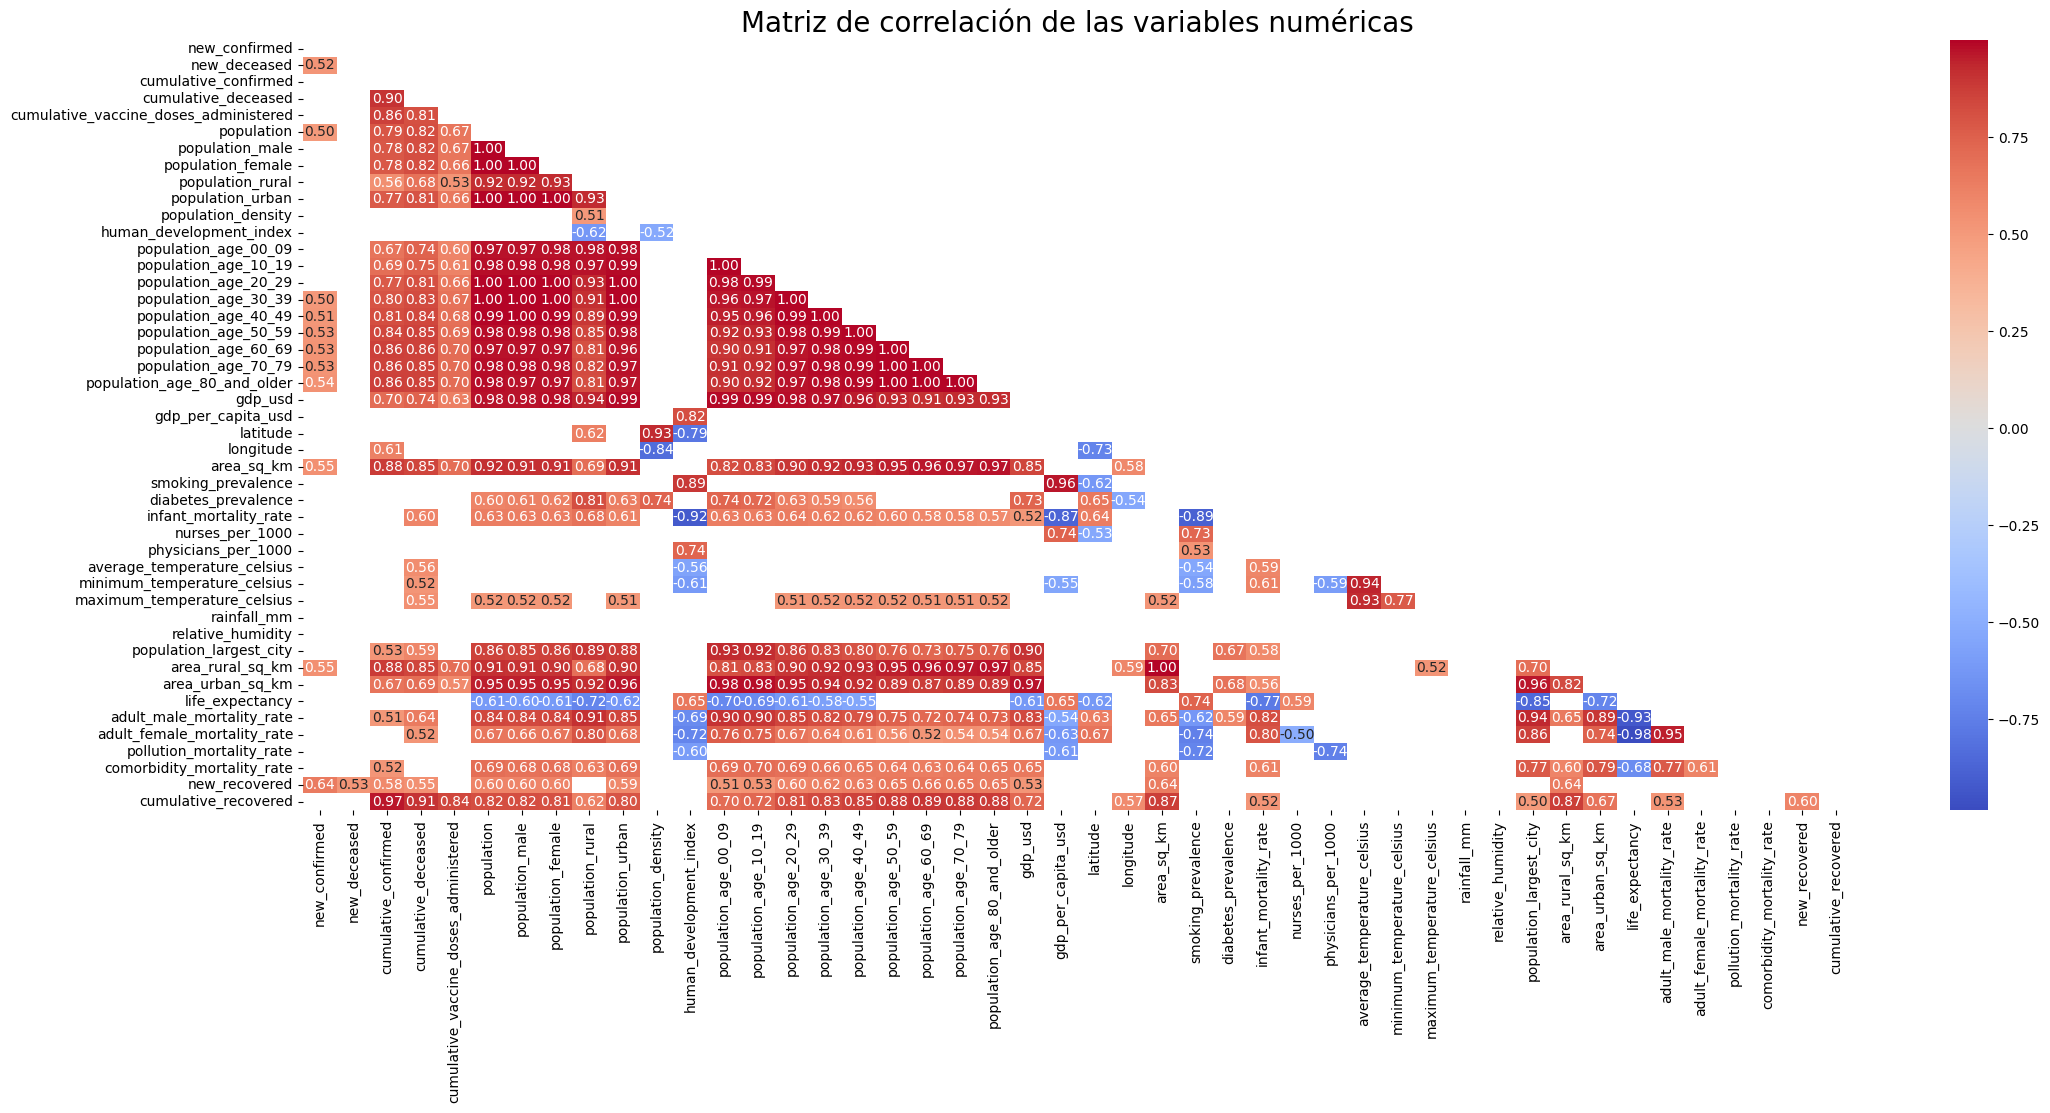

In [48]:
#Se crea la matriz de correlación de las variables numéricas
numeric_columns = data_latinoamerica_paises.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data_latinoamerica_paises[numeric_columns].corr()
#Aquí se crea máscara para el triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Vamos a mostrar valores superiores a 0.5 es decur donde hay una correlación fuerte sin embargo tambien se puede mostrar valores negativos.
correlation_matrix = correlation_matrix[abs(correlation_matrix) > abs(0.5)]

# Se crea la gráfica
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de las variables numéricas', fontsize=20)
plt.show()

En la gráfica anterior se presentan Las variables con mayor correlación, para identificarlas más rápido, se definió un umbral cuyo valor absoluto sea mayor a 0.5 y se graficaron en un heatmap.

Ya teniendo una idea de las variables que tienen mayor correlación, podría hacer un análisis más detallado de estas variables esto se podría hacer en un análisis posterior y una toma de decisiones para la creación de un modelo ML.

Sin embargo podemos proceder a realizar una rápida revisión gráfica de la gran mayoría de las columnas para ver como se comportan los datos, para esta primera aproximación vamos a utilizar barplots utilizando un ciclo for y la librería seaborn.

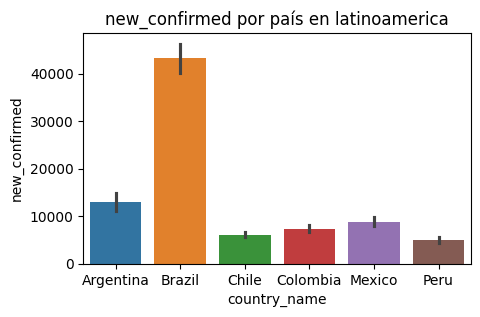

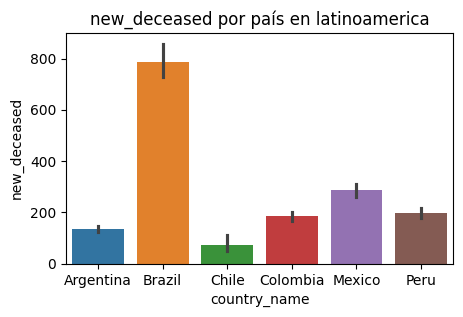

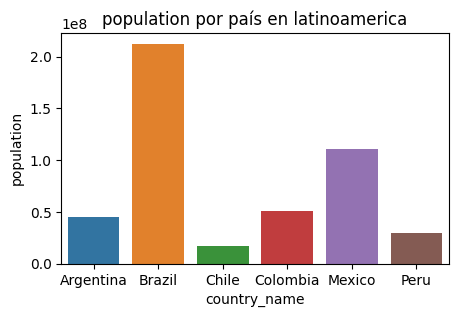

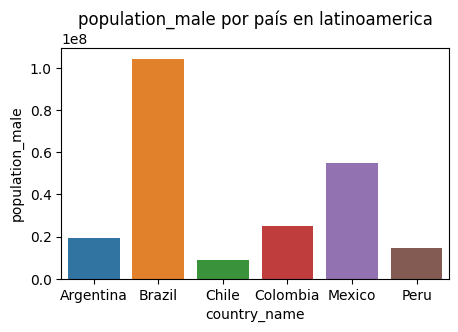

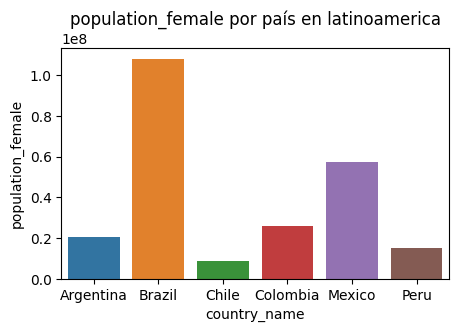

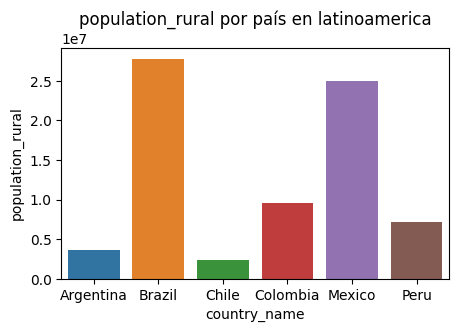

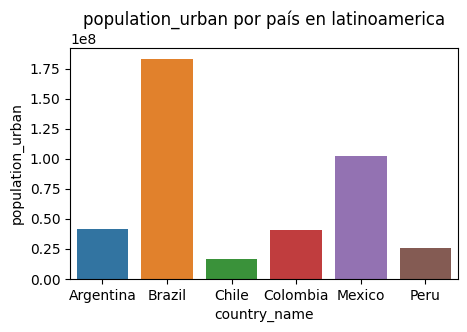

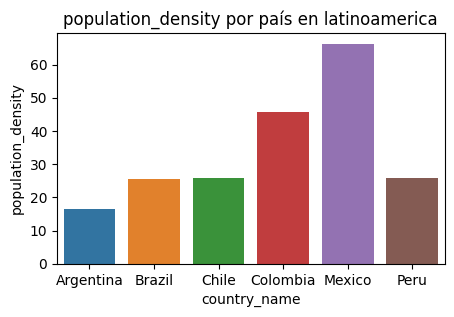

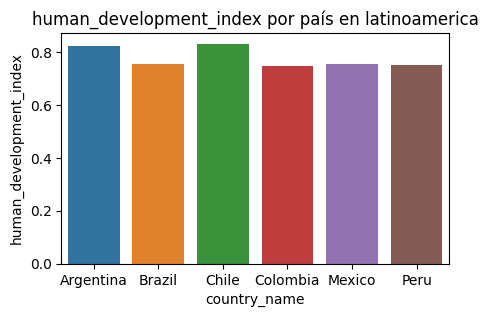

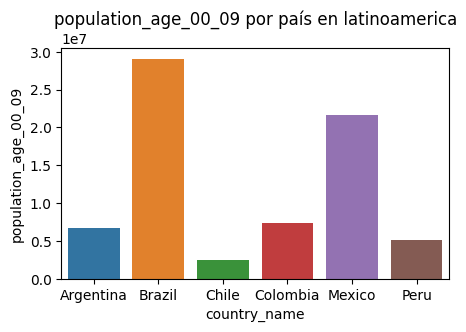

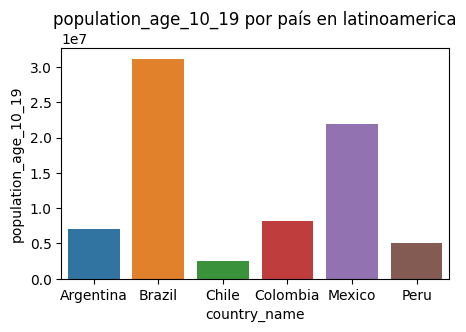

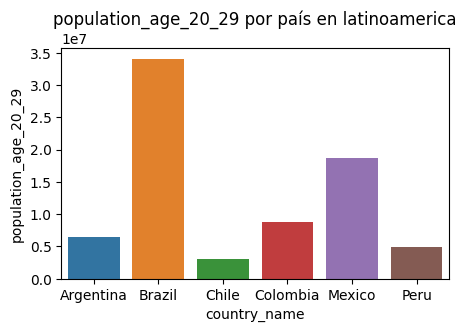

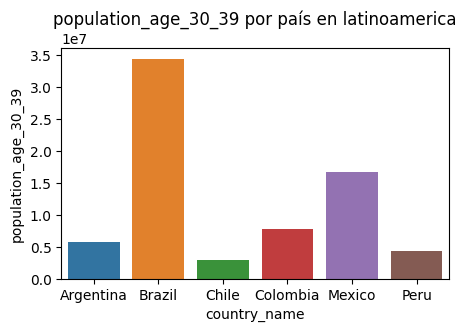

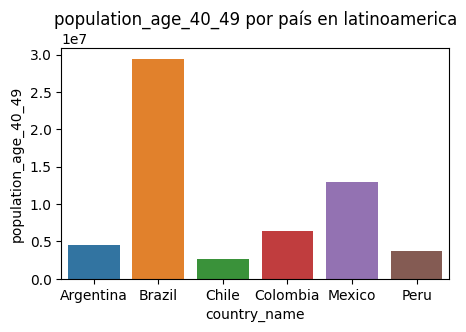

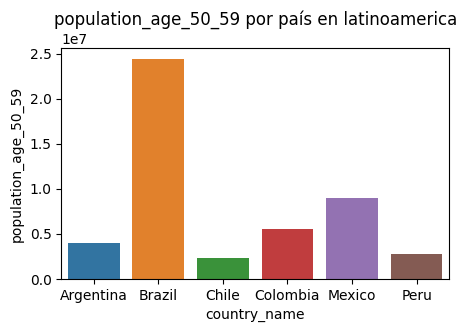

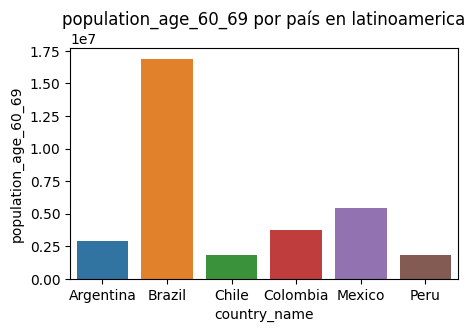

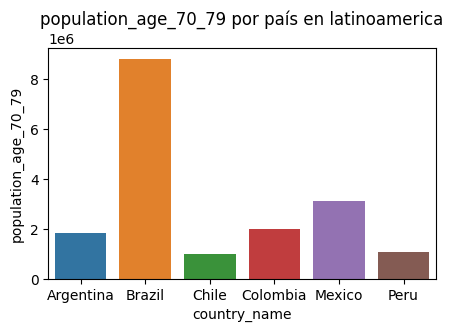

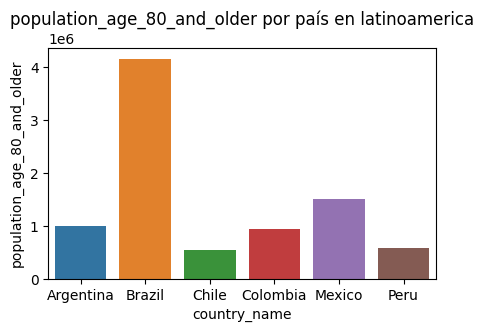

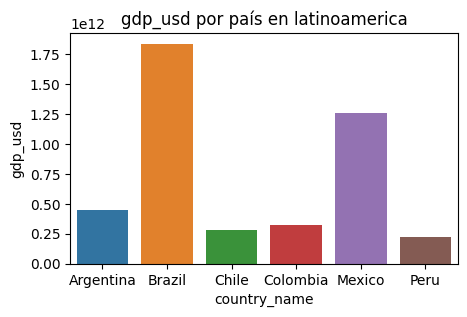

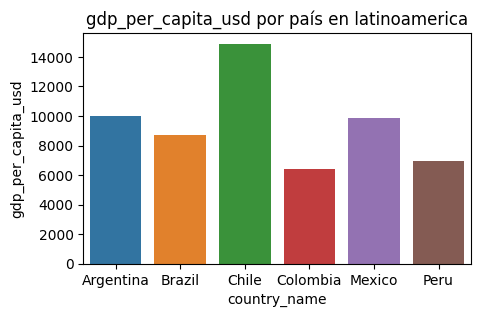

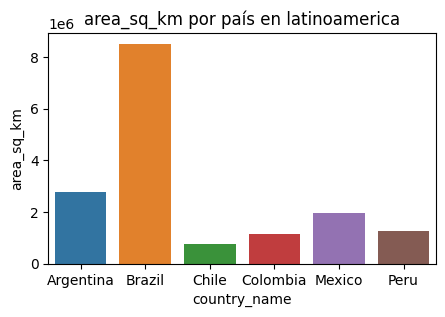

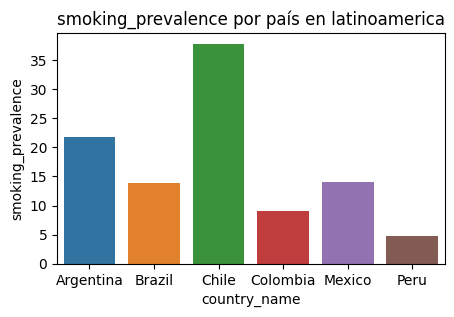

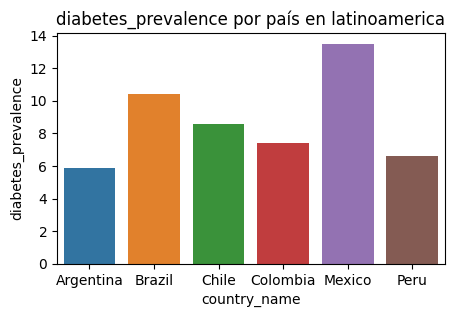

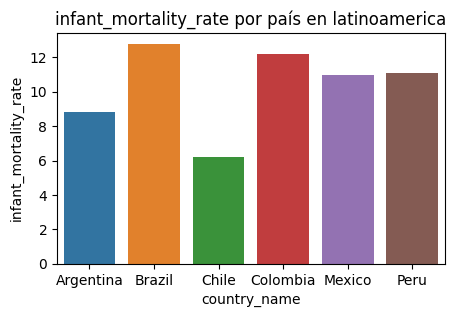

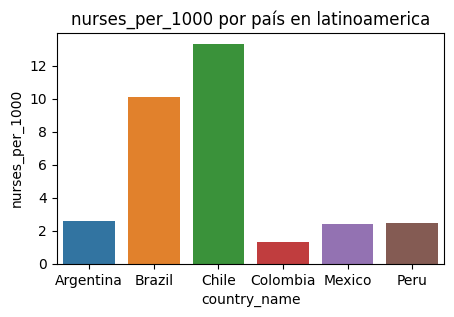

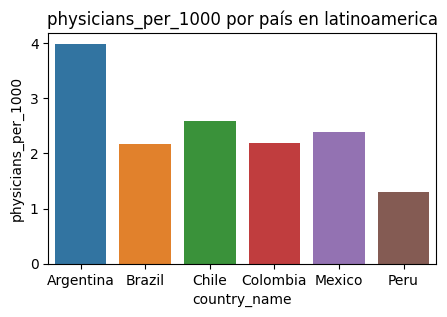

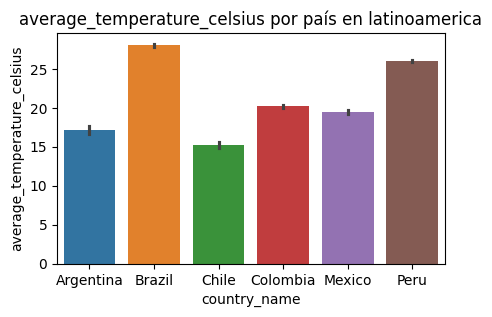

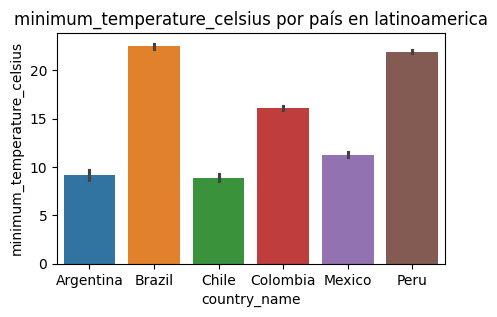

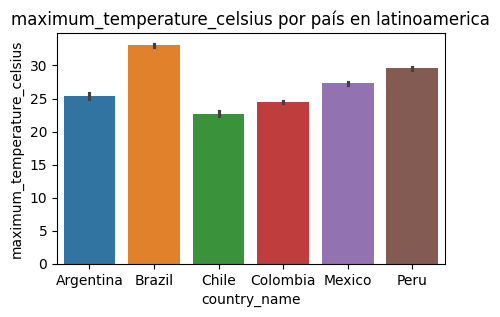

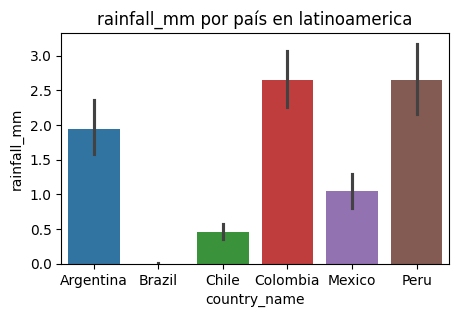

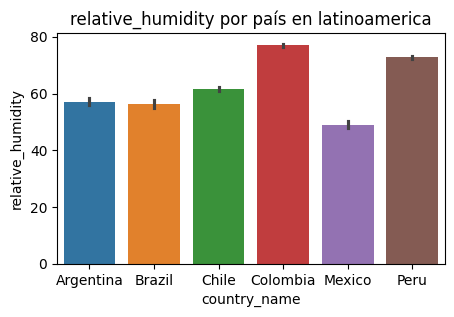

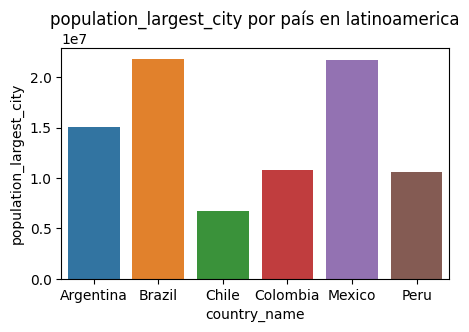

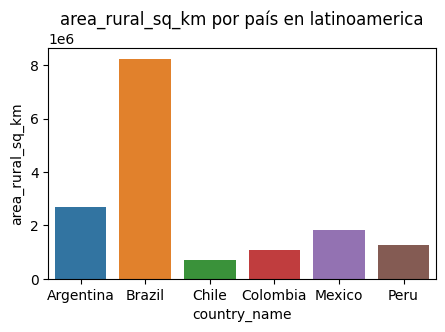

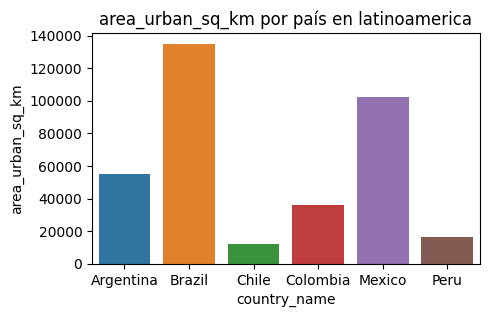

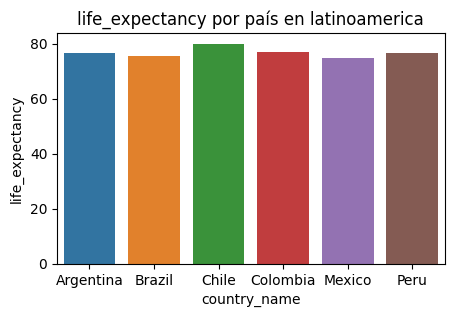

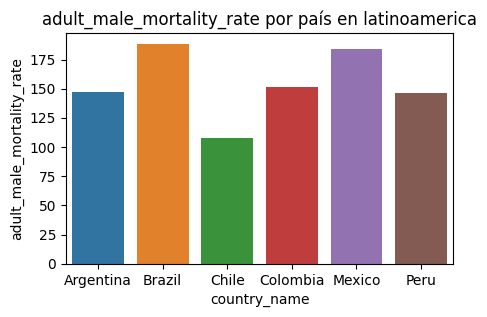

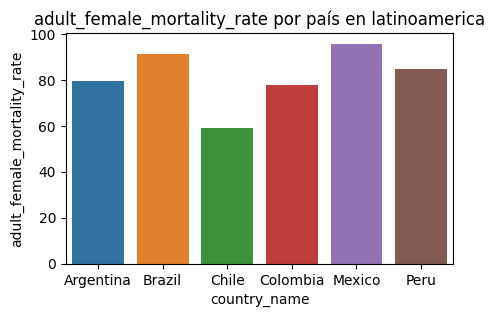

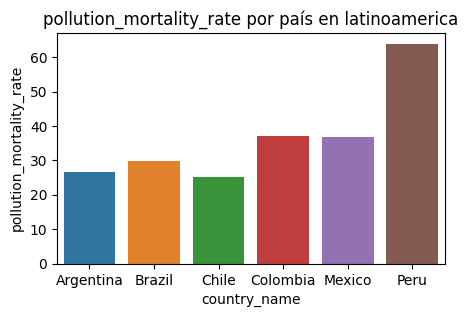

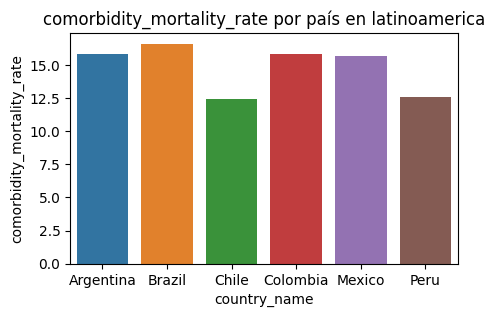

In [49]:
# diagrams bar for evere country in data_latinoamerica_paises with 6 columns
for i in data_latinoamerica_paises.columns:
    if i not in ['location_key','date','country_code','country_name','latitude','longitude','cumulative_confirmed', 'cumulative_deceased',
       'cumulative_recovered', 'cumulative_vaccine_doses_administered','new_recovered']:
        fig, ax = plt.subplots(figsize=(5, 3))
        sns.barplot(x='country_name', y=i, data=data_latinoamerica_paises, ax=ax,hue='country_name')
        plt.title(f'{i} por país en latinoamerica')
        plt.show()


Se repite el proceso con un ciclo for pero ahora vamos a realizar histogramas para ver la distribución de algunos de los datos.

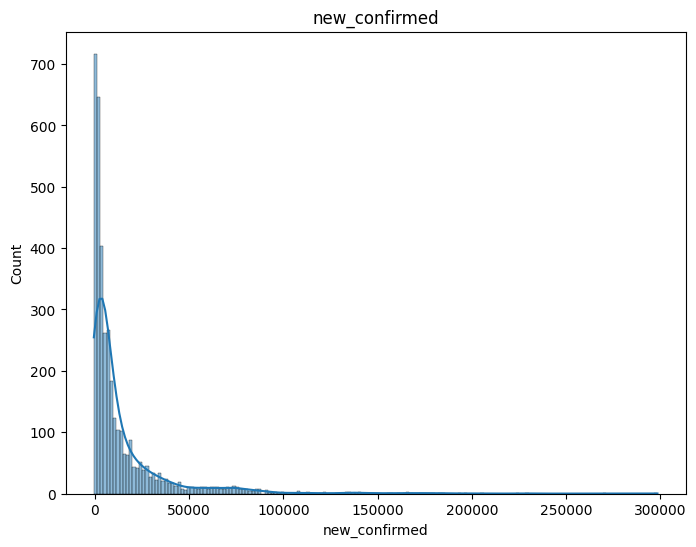

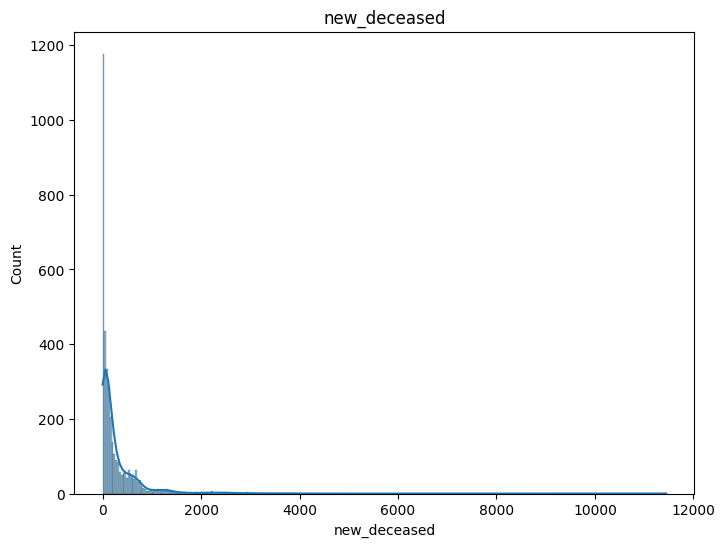

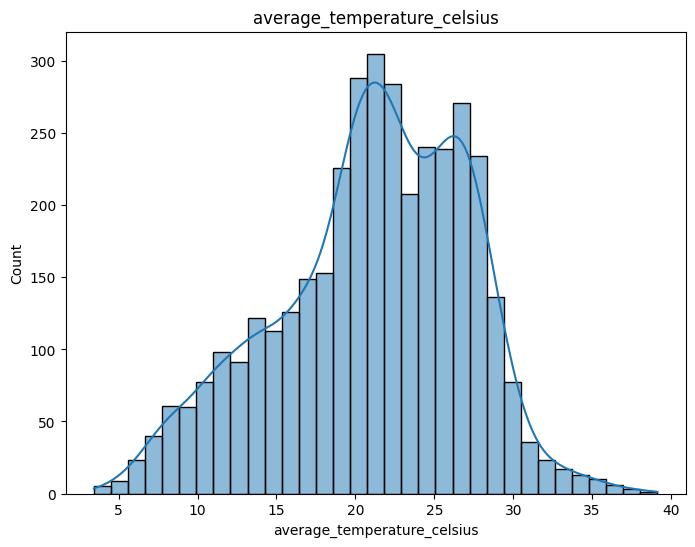

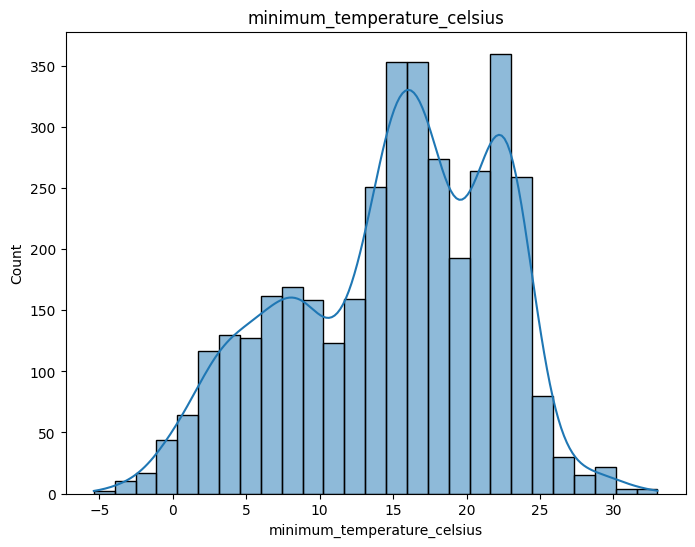

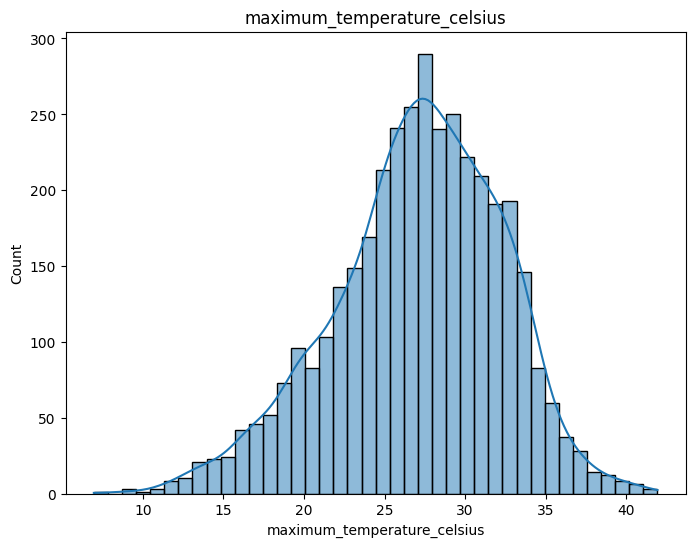

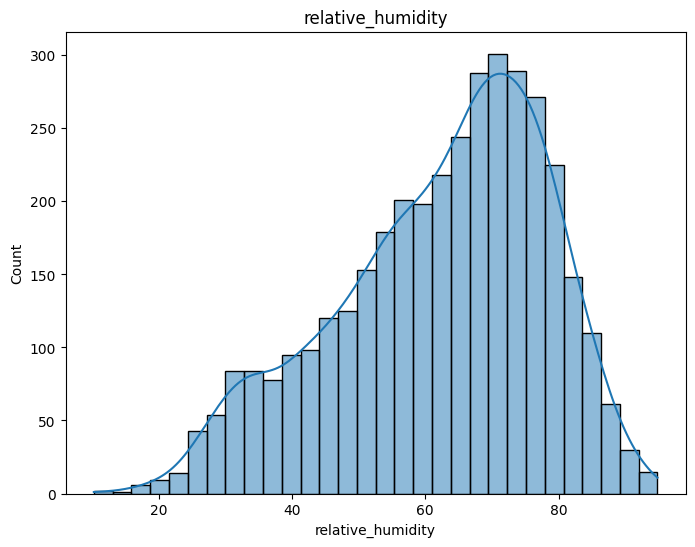

In [50]:
lista_columnas_6=["new_confirmed","new_deceased","cumulative_confirmed","cumulative_deceased",
                  "cumulative_vaccine_doses_administered","average_temperature_celsius","minimum_temperature_celsius",
                  "maximum_temperature_celsius","relative_humidity"]
# Crear histogramas de las variables numéricas
for i in data_latinoamerica_paises[lista_columnas_6]:
    if i not in ['location_key','date','country_code','country_name','latitude','longitude','cumulative_confirmed', 'cumulative_deceased',
       'cumulative_recovered', 'cumulative_vaccine_doses_administered']:
        fig, ax = plt.subplots(figsize=(8,6))
        sns.histplot(data_latinoamerica_paises[i], kde=True)
        plt.title(i)
        plt.show()

Procederemos a realizar un analisis enfocados en algunas variables especficicas, en este caso vamos a analizar la variable average_temperature y la variable new_confirmed, con el fin de tratar de entender el comportamiento de los casos respecto a la temperatura.

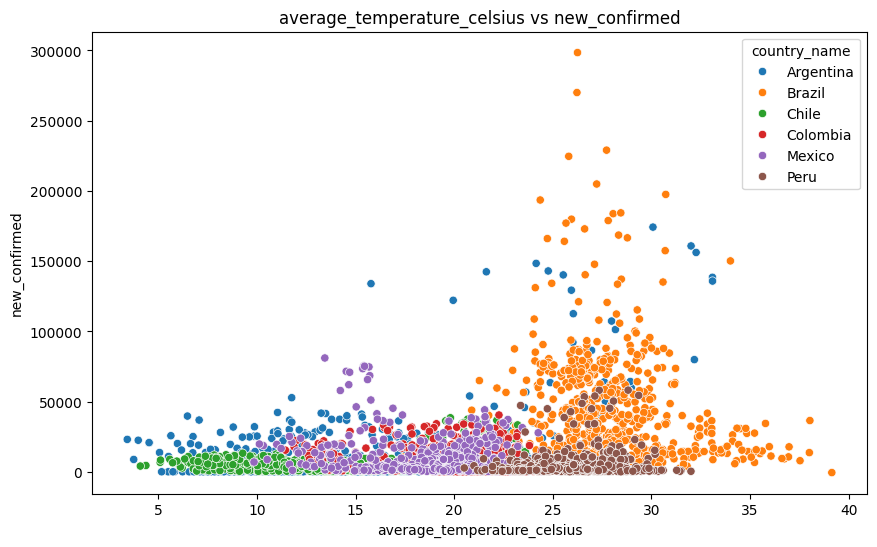

In [51]:
# Grafica de average_temperature_celsius vs new_confirmed
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='average_temperature_celsius', y='new_confirmed', data=data_latinoamerica_paises, hue='country_name')
plt.title('average_temperature_celsius vs new_confirmed')
plt.show()

Se ha podido observar que en algunos paises la temperatura no influye en la cantidad de casos confirmados, sin embargo en otros paises si se puede observar una relación entre la temperatura y la cantidad de casos confirmados.

Como vimos que la temperatura tiene alguna relación con los casos confirmados, vamos a realizar un análisis de la temperatura promedio con la cantidad de muertes.

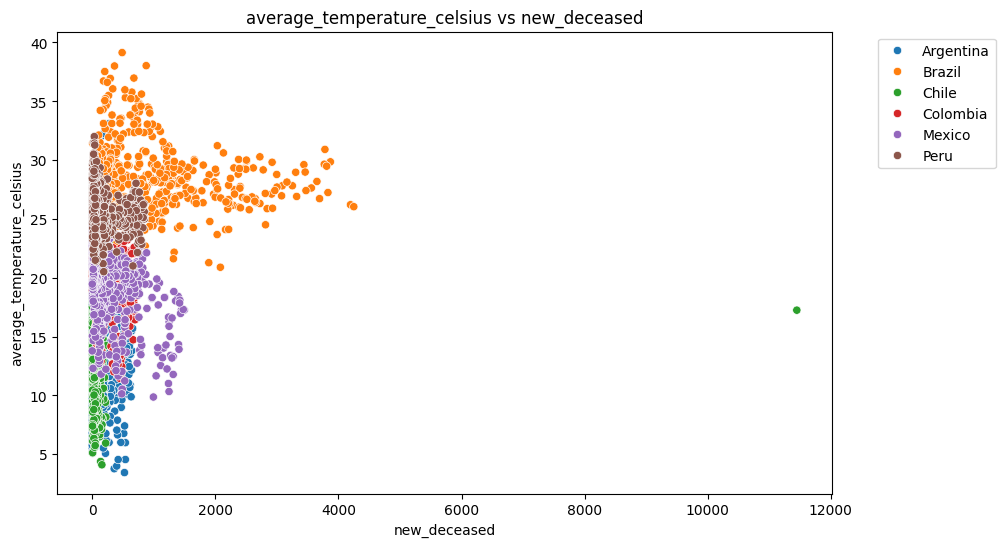

In [52]:
# Grafica de average_temperature_celsius vs new_deceased
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(y='average_temperature_celsius', x='new_deceased', data=data_latinoamerica_paises, hue='country_name')
plt.title('average_temperature_celsius vs new_deceased')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

En la grafica anterior se ve un comportamiento similar al de los casos confirmados, en algunos paises la temperatura no influye en la cantidad de muertes, sin embargo en otros paises si se puede observar una relación entre la temperatura y la cantidad de muertes.

Ahora si veamos como se comportan las variables en un estudio longitudinal, es decir a lo largo del tiempo.

Por lo tanto, se hace una primera aproximación y observaremos las dosis administradas por mes en todos los países.

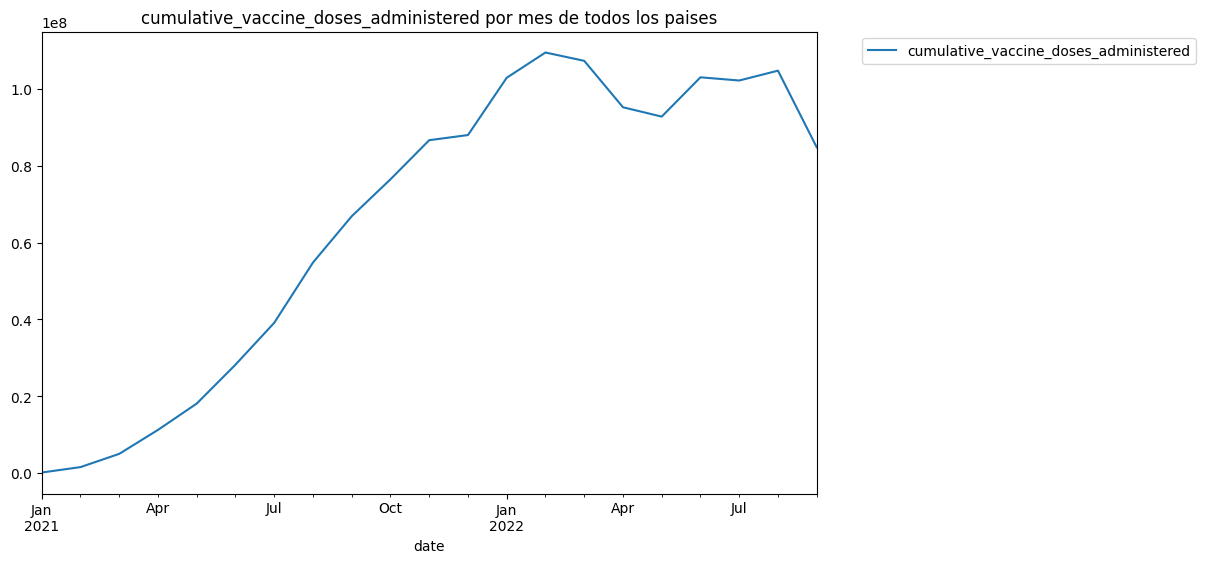

In [53]:
# Grafica de valores medios de todos los paises cumulative_vaccine_doses_administered
fig, ax = plt.subplots(figsize=(10, 6))
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('cumulative_vaccine_doses_administered por mes de todos los paises')
plt.show()

En la anterior gráfica se puede observar que la cantidad de dosis administradas en los países de Argentina, Brasil, Chile, Colombia, México y Perú ha ido aumentando a lo largo del tiempo, recordemos que es un análisis general y no se ha hecho un análisis detallado.

Como la anterior gráfica no nos da mucha información, vamos a realizar un análisis más detallado de las dosis administradas por mes en cada país.

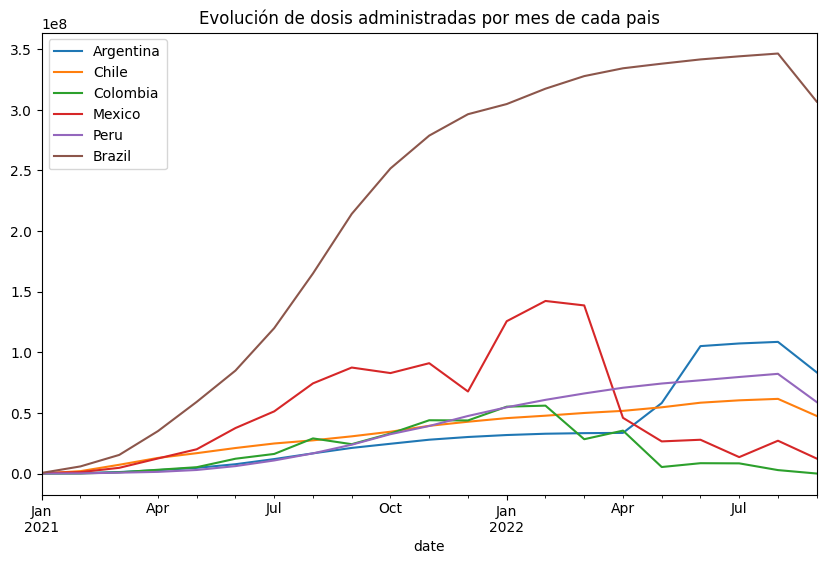

In [54]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.title('Evolución de dosis administradas por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

Si realizamos un análisis más detallado de las dosis administradas por mes en cada país, podemos observar que en algunos paises la cantidad de dosis administradas ha ido aumentando a lo largo del tiempo, sin embargo en otros paises la cantidad de dosis administradas ha ido disminuyendo, Esto puede ser debido a muchos factores, como la cantidad de vacunas disponibles, la cantidad de personas que se han vacunado, entre otros.

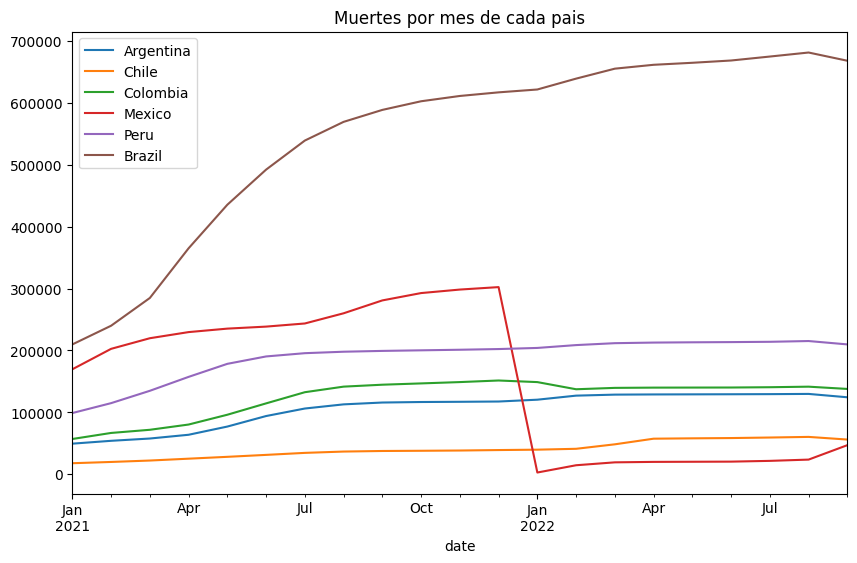

In [55]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_deceased'].plot()
plt.title('Muertes por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

El paía que mas muertes ha tenido es Brasil, seguido de México, Perú, Colombia, Argentina y Chile. Sin embargo, esto no quiere decir que estos paises sean los que peor han manejado la pandemia, ya que hay que tener en cuenta la cantidad de habitantes de cada país además de otros factores y cantidad de datos que tenemos.

La disminución de casos en méxico puede ser una perdida de datos o una disminución real de casos, esto se puede analizar en un estudio posterior.

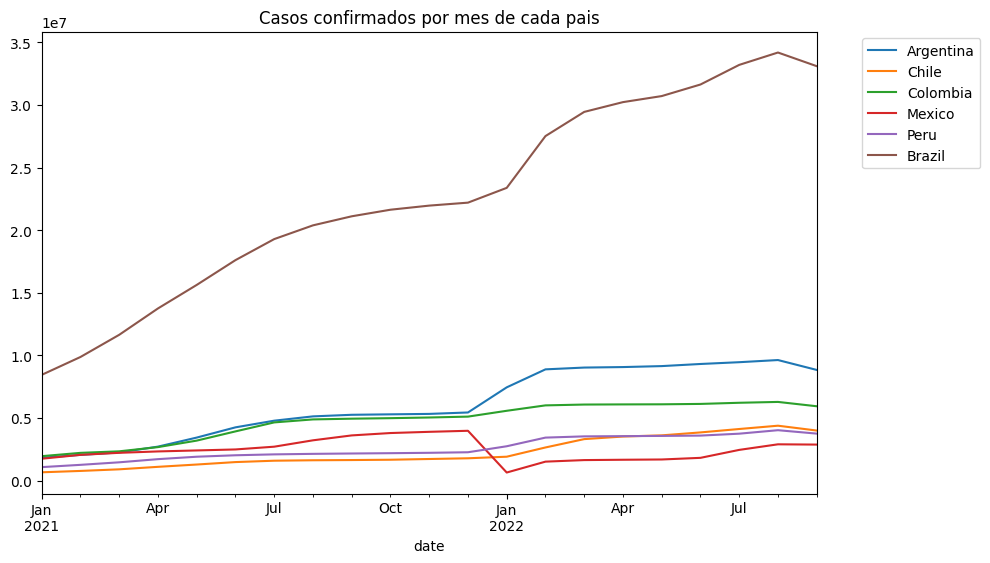

In [56]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_confirmed'].plot()
plt.title('Casos confirmados por mes de cada pais')
plt.legend(paises_seleccionados, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

El país que más casos confirmados ha tenido es Brasil, seguido de México, Argentina, Colombia, Chile y Perú. Esto no quiere decir que manejaran peor la pandemia, ya que hay que tener en cuenta la cantidad de habitantes de cada país además de otros factores y cantidad de datos que tenemos.

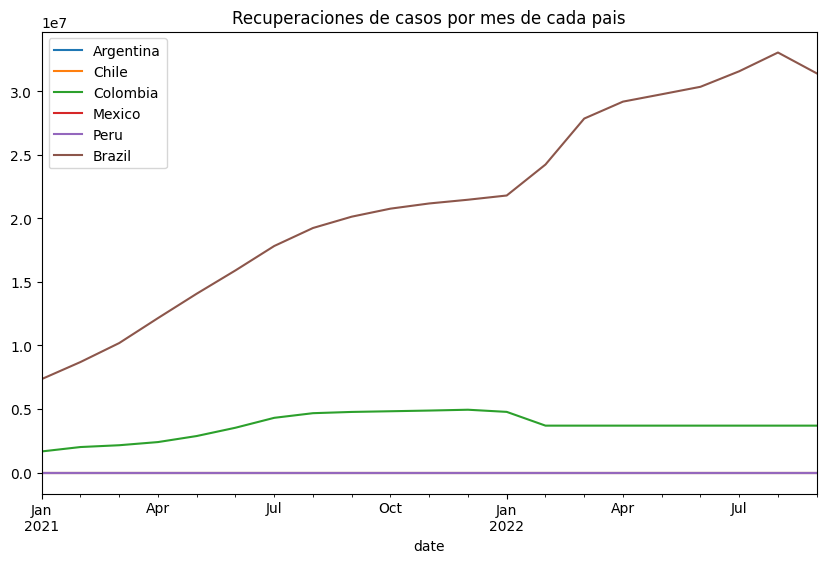

In [57]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_recovered'].plot()
plt.title('Recuperaciones de casos por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

El país que mejor se recupero ha sido Brasil, sin embargo esto como lo dijimos viene relacionado a la cantidad de personas y vacunas disponibles.

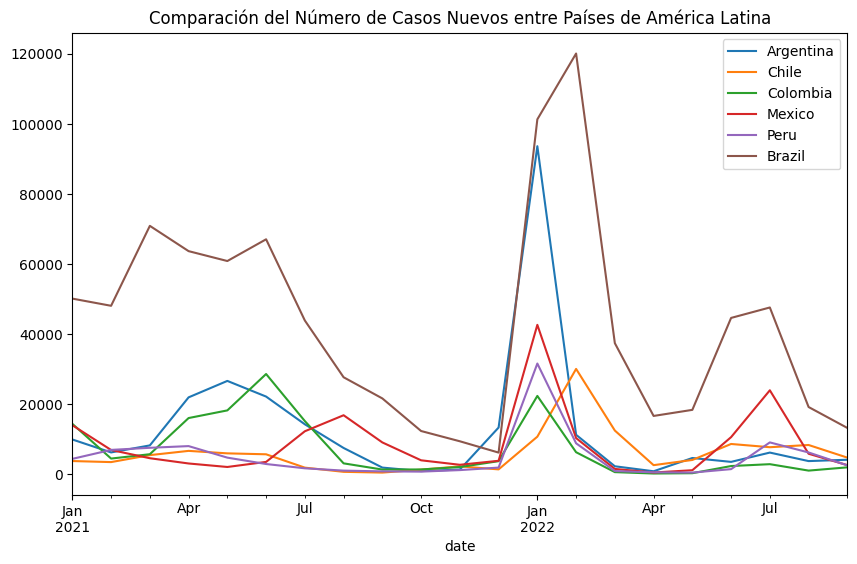

In [58]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['new_confirmed'].plot()
plt.title('Comparación del Número de Casos Nuevos entre Países de América Latina')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

De los paises que mejor manejó la pandemia fue Chile, seguido de Perú, Argentina, Colombia, México y Brasil, se puede observar que la cantidad de muertes y casos confirmados es menor en estos paises ademas de no ser tan desproporcionada la cantidad de vacunas administradas.

Text(0.5, 1.0, 'Distribución de dosis acumuladas por país')

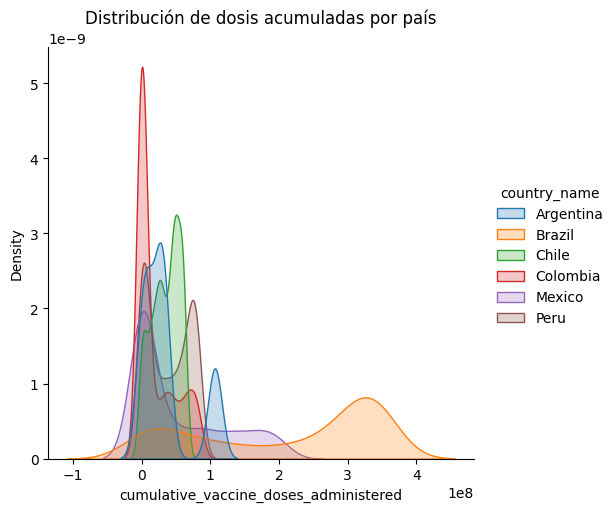

In [59]:
sns.displot(data_latinoamerica_paises, x="cumulative_vaccine_doses_administered", hue="country_name", kind="kde", fill=True)
plt.title('Distribución de dosis acumuladas por país')

De los paises que peor manejaron la pandemia fue Brasil, seguido de México, Colombia, Argentina, Perú y Chile, se puede observar que la cantidad de muertes y casos confirmados es mayor en estos paises ademas de ser desproporcionada la cantidad de vacunas administradas.

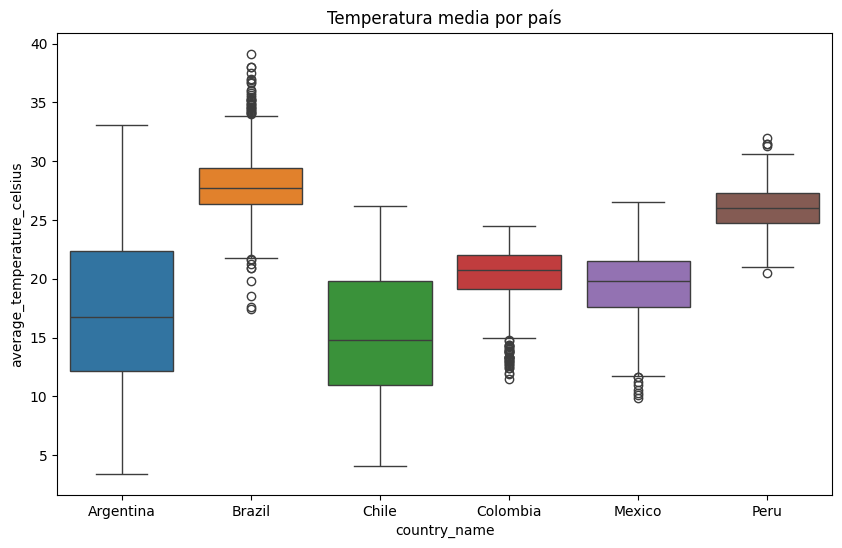

In [60]:
#average_temperature_celsius vs new_confirmed por pais boxplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='country_name', y='average_temperature_celsius', data=data_latinoamerica_paises, hue='country_name')
plt.title('Temperatura media por país')
plt.show()

Aunque chile tiene rangos diferentes de temperatura y eso podría haber afectado la cantidad de casos confirmados y muertes, se puede observar que chile ha manejado mejor la pandemia que los demás paises.

Esto poco a poco nos ha llevado a concluir que los paises donde se podría crear los nuevos centros serían donde hay mas casos confirmados y muertes, ya que es donde se necesita más ayuda.

Pese a nuestro anterior análisis, no podemos tomar una decisión definitiva, ya que no hemos hecho un análisis detallado de los datos, por lo que se recomienda hacer un análisis más detallado y un estudio de los datos para poder tomar una decisión más acertada.
Seguiremos viendo como se comportan las variables de a traves de violinplots.

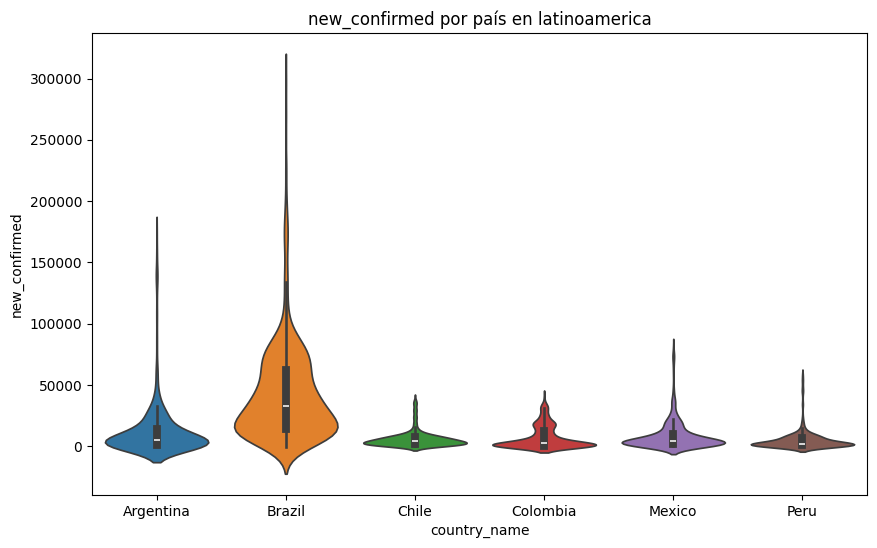

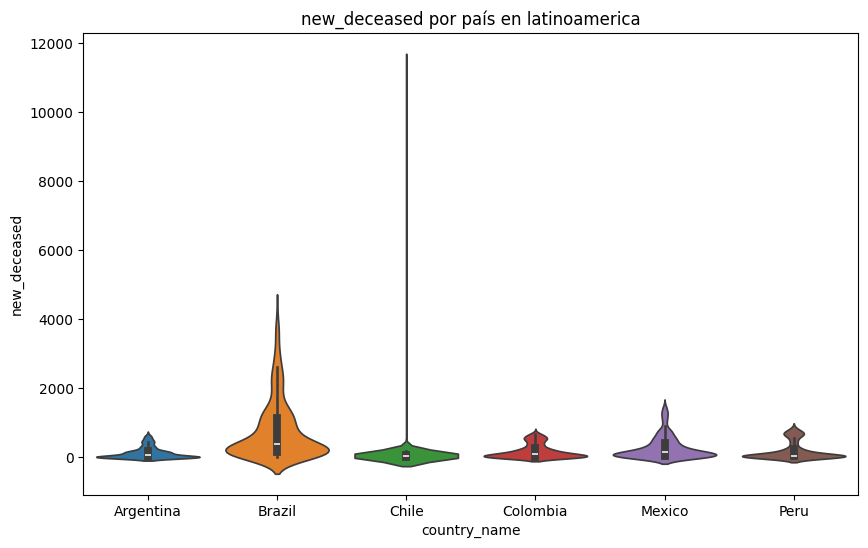

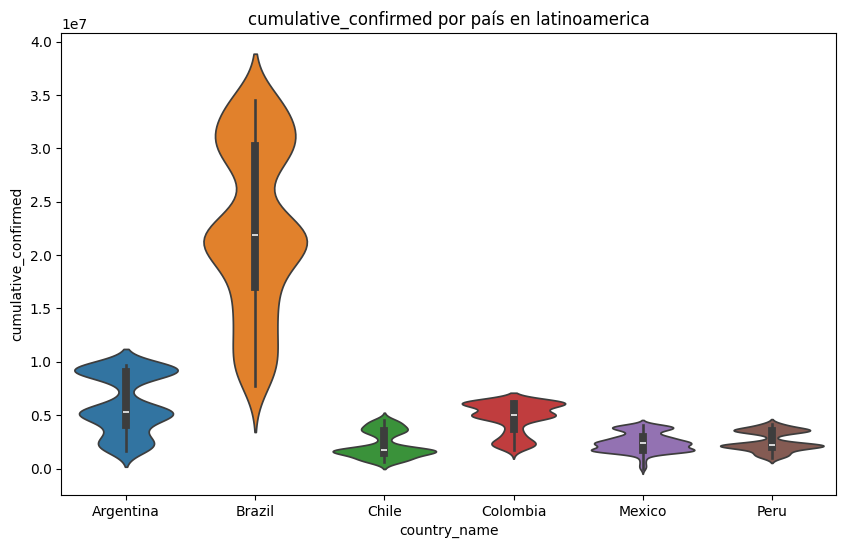

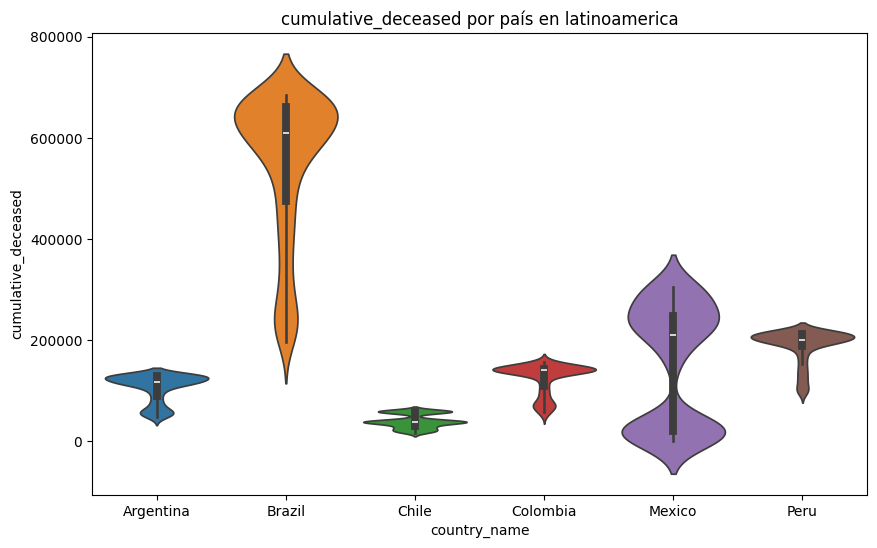

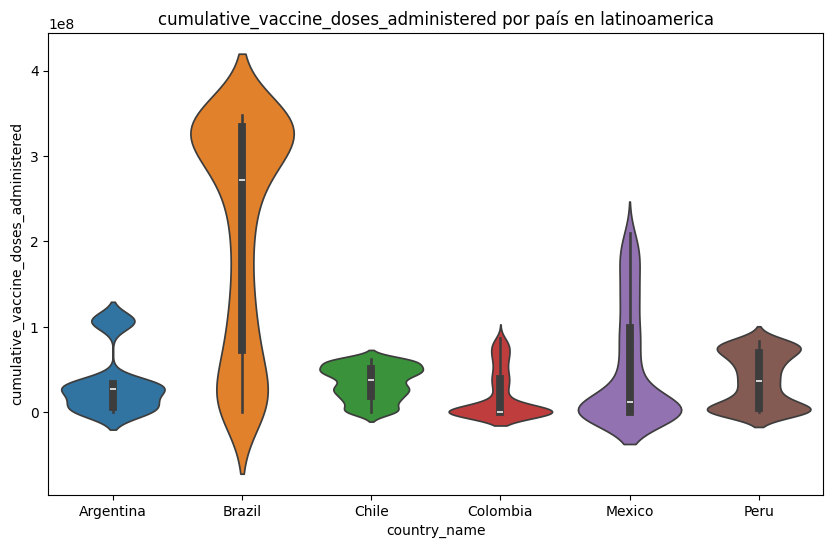

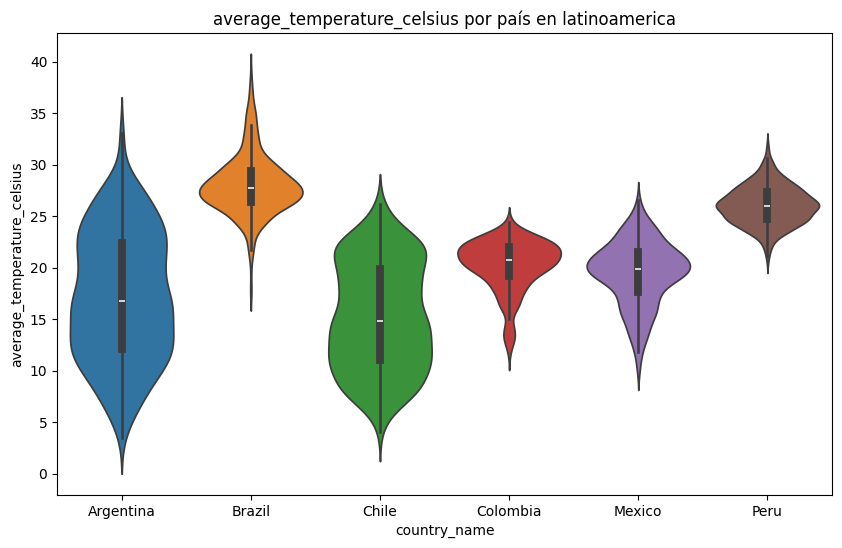

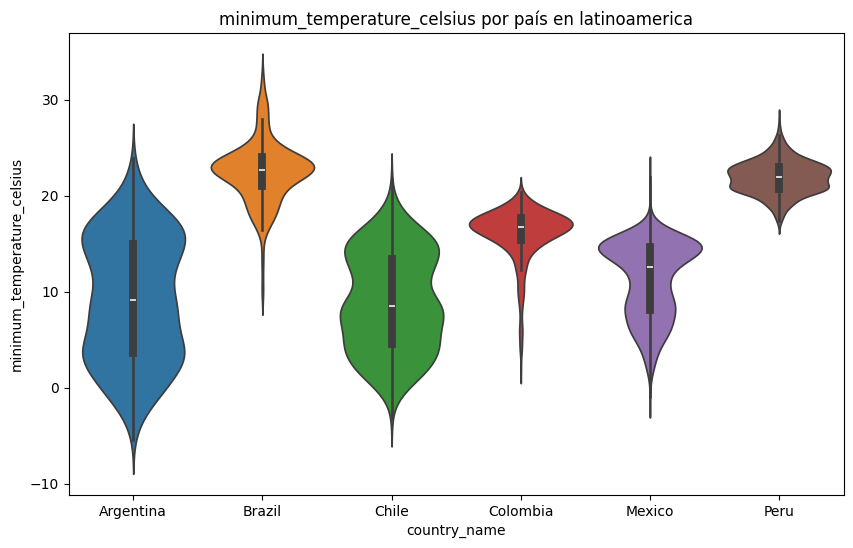

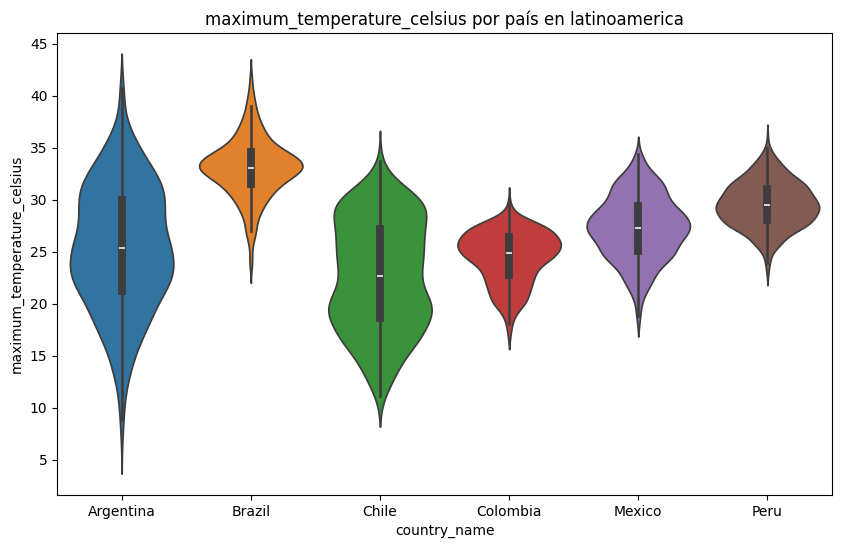

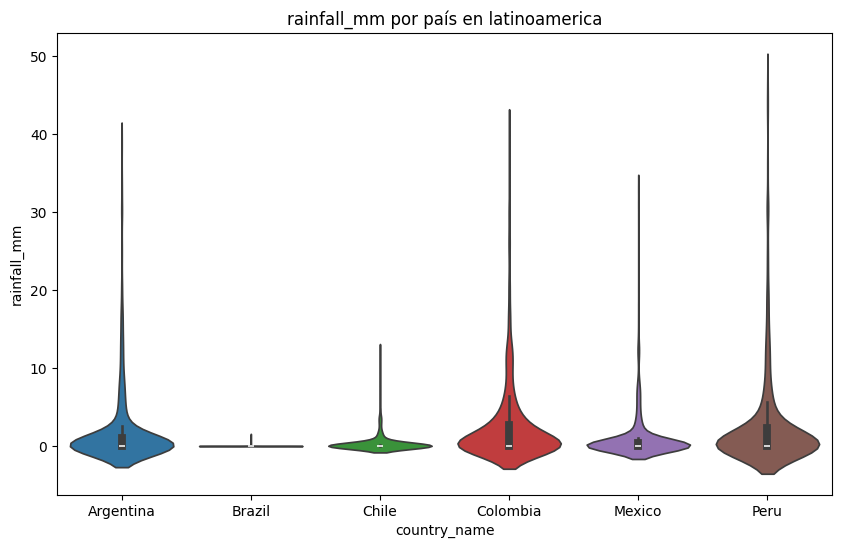

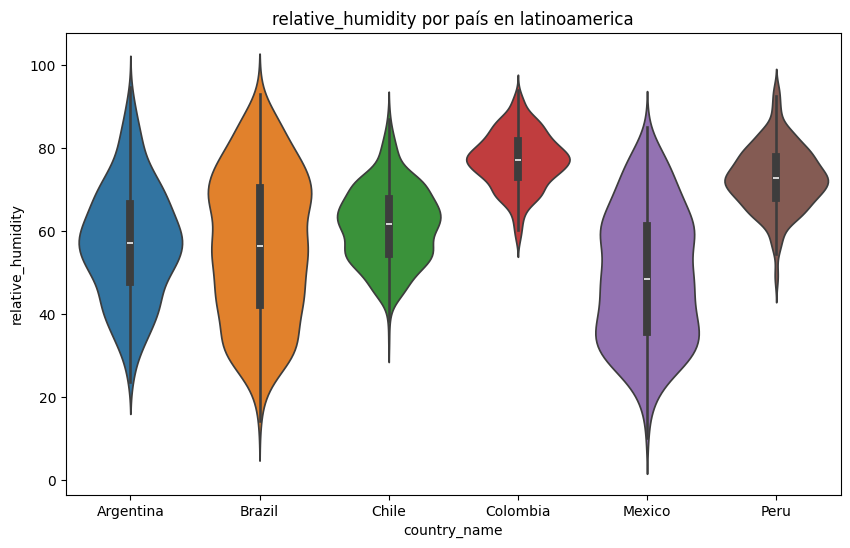

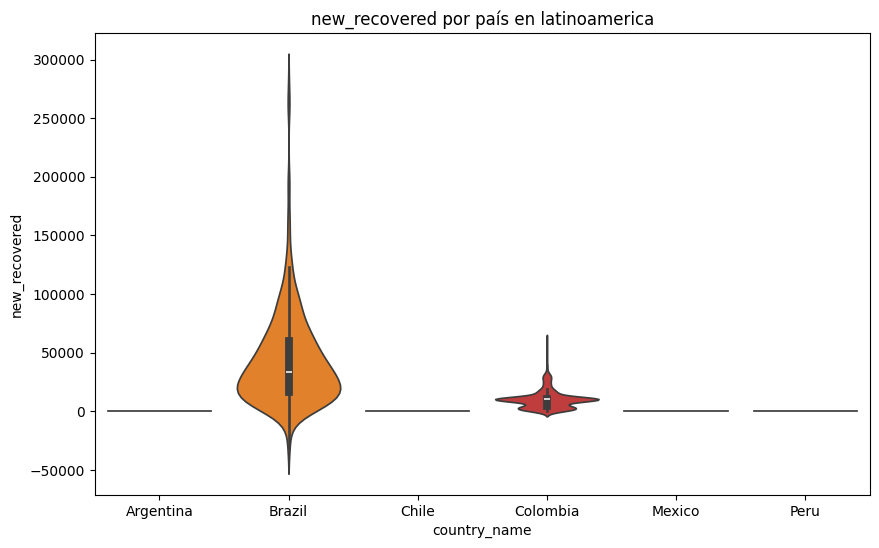

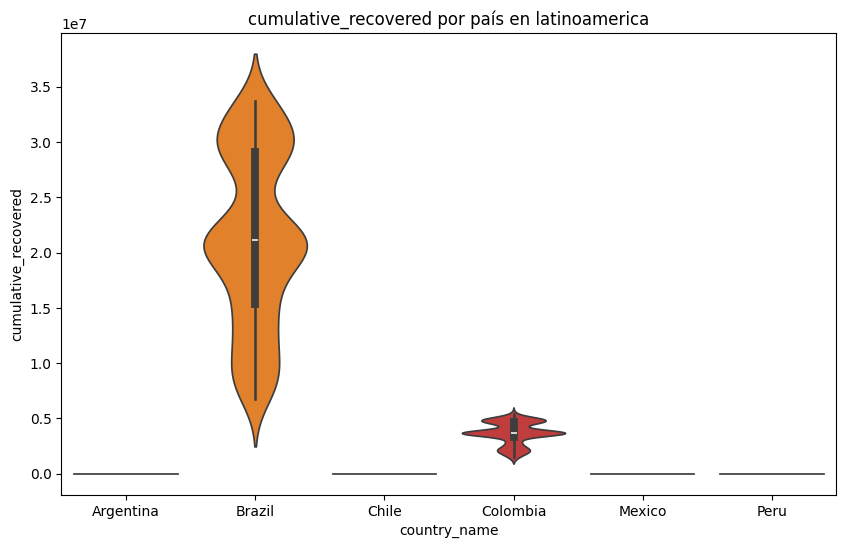

In [61]:
# Se crea un dataframe con las columnas mayores a 6 porque son las que tienen valores diferentes para cada país.
columnas_mayores_6=[]
for i in data_latinoamerica_paises.columns:
    if i not in ['location_key','date','country_code','latitude','longitude']:
        if data_latinoamerica_paises[i].nunique()>6:
            columnas_mayores_6.append(i)
#agregar a columnas_mayores_6 la columna country_name para poder hacer analisis por país.
columnas_mayores_6.append('country_name')

# Se crea un dataframe con las columnas mayores a 6
data_latinoamerica_paises_mayores_6=data_latinoamerica_paises[columnas_mayores_6]


# violinplot en todos los paises para variables numericas
for i in data_latinoamerica_paises_mayores_6.columns:
    if i not in ['location_key','date','country_code','latitude','longitude','country_name']:
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.violinplot(x='country_name', y=i, data=data_latinoamerica_paises_mayores_6,hue='country_name')
        plt.title(f'{i} por país en latinoamerica')
        plt.show()

Procedamos a analizar la distribución de la población por grupos de edad en los paises seleccionados, para tratar de entender como se comporta la población en cada país y en un futuro poder tomar decisiones más acertadas.

In [62]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [63]:
cut_columns = ['country_name','population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
last_cases = data_latinoamerica_paises[cut_columns].groupby('country_name').last().sort_values(by='population_age_00_09')
age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = last_cases[age_columns].sum()
age_distribution

population_age_00_09          72354498.00
population_age_10_19          75821668.00
population_age_20_29          75953404.00
population_age_30_39          72153175.00
population_age_40_49          59596656.00
population_age_50_59          47961620.00
population_age_60_69          32654396.00
population_age_70_79          17789478.00
population_age_80_and_older    8711719.00
dtype: float64

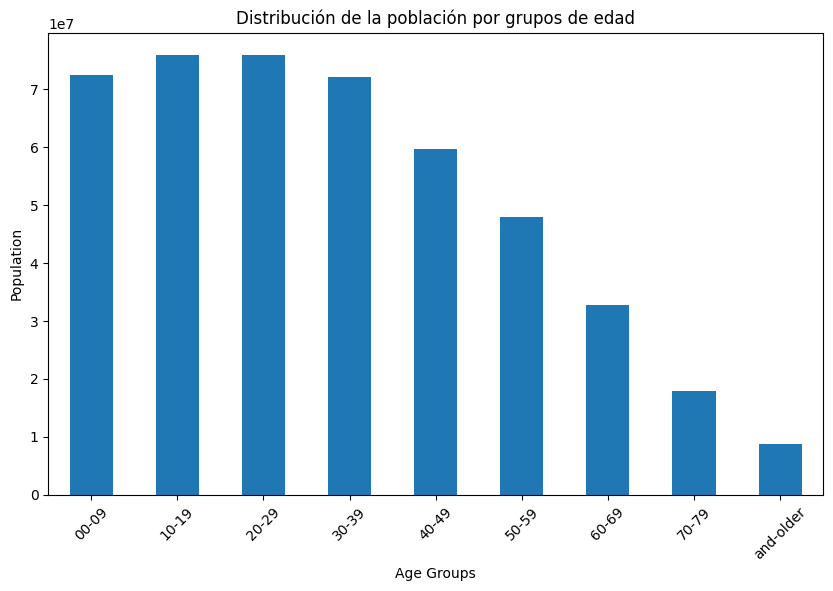

In [64]:
# Calculamos la distribucion de la poblacion por grupos de edad

cut_columns = ['country_name','population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
last_cases = data_latinoamerica_paises[cut_columns].groupby('country_name').last().sort_values(by='population_age_00_09')
age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = last_cases[age_columns].sum()

plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', stacked=True)
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.title('Distribución de la población por grupos de edad')
plt.xticks(range(len(age_columns)), [col.split('_')[-2] + '-' + col.split('_')[-1] for col in age_columns], rotation=45)

plt.show()

Esta gráfica es interesante porque nos permite ver la población por grupos de edad en cada país, lo que nos puede ayudar a entender cómo se comporta la población y también nos genera la idea de que podríamos graficar la cantidad de vacunas por cada grupo etario.

In [65]:
paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']

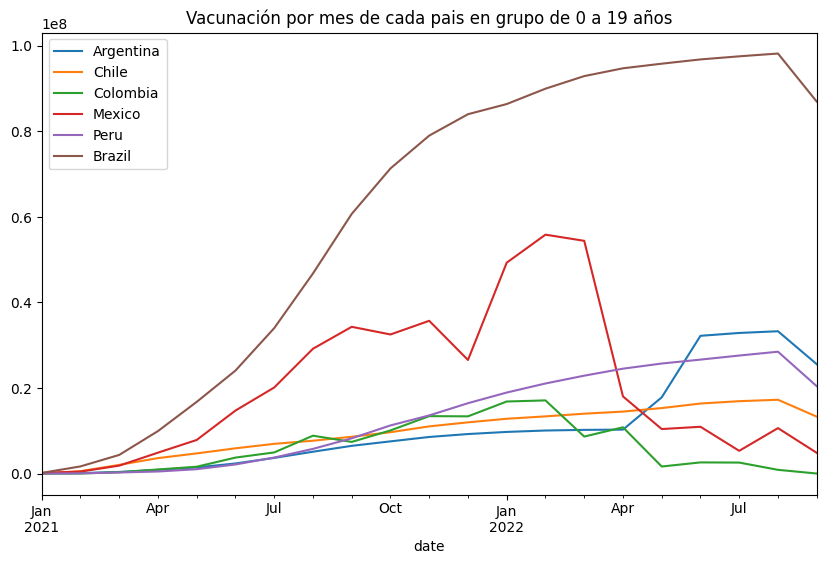

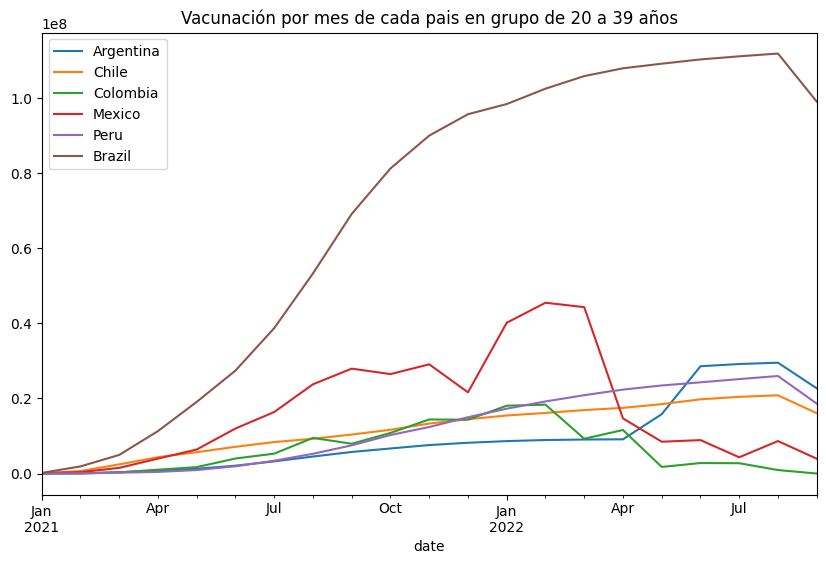

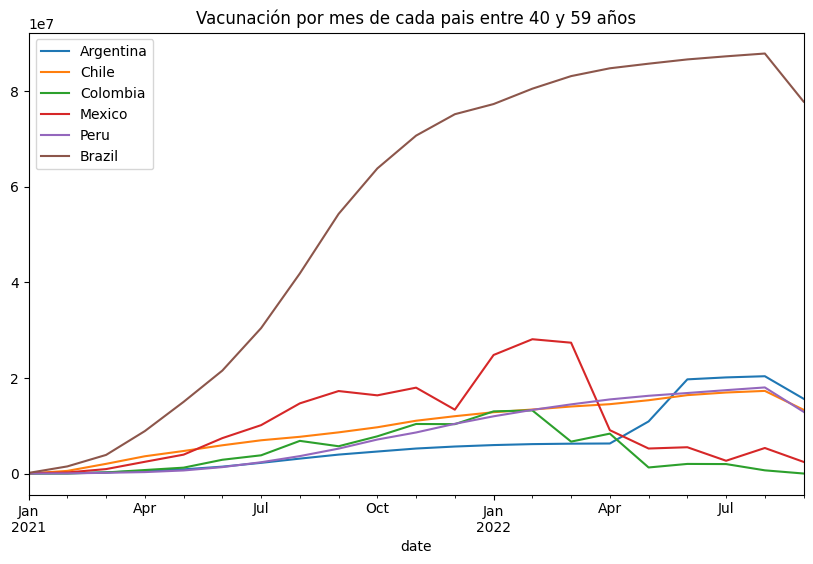

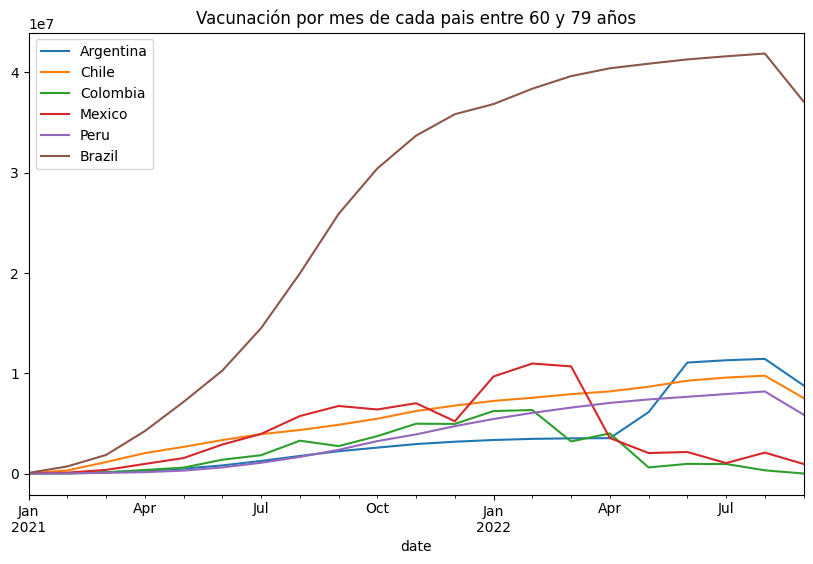

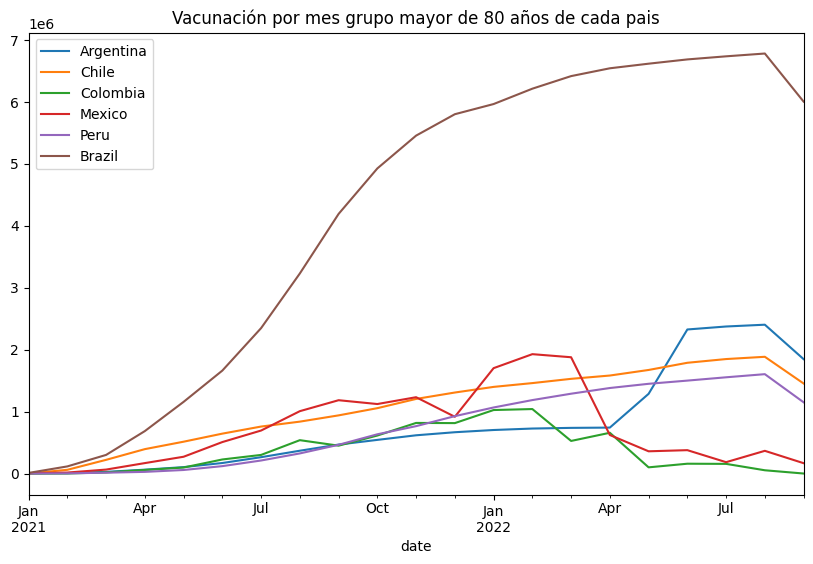

In [66]:
# Grupo etareo mas vacunado
data_latinoamerica_paises['population_age_00_19']=data_latinoamerica_paises['population_age_00_09']+data_latinoamerica_paises['population_age_10_19']
data_latinoamerica_paises['population_age_20_39']=data_latinoamerica_paises['population_age_20_29']+data_latinoamerica_paises['population_age_30_39']
data_latinoamerica_paises['population_age_40_59']=data_latinoamerica_paises['population_age_40_49']+data_latinoamerica_paises['population_age_50_59']
data_latinoamerica_paises['population_age_60_79']=data_latinoamerica_paises['population_age_60_69']+data_latinoamerica_paises['population_age_70_79']
data_latinoamerica_paises['population_age_80_and_older']=data_latinoamerica_paises['population_age_80_and_older']

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_00_19']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_20_39']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_40_59']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_60_79']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_80_and_older']/data_latinoamerica_paises['population']

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['population_age_00_19_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['population_age_20_39_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['population_age_40_59_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['population_age_60_79_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['population_age_80_and_older_vacunados'].fillna(0)

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['population_age_00_19_vacunados'].astype(int)
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['population_age_20_39_vacunados'].astype(int)
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['population_age_40_59_vacunados'].astype(int)
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['population_age_60_79_vacunados'].astype(int)
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['population_age_80_and_older_vacunados'].astype(int)

data_latinoamerica_paises['population_age_00_19_vacunados'].sum()
data_latinoamerica_paises['population_age_20_39_vacunados'].sum()
data_latinoamerica_paises['population_age_40_59_vacunados'].sum()
data_latinoamerica_paises['population_age_60_79_vacunados'].sum()
data_latinoamerica_paises['population_age_80_and_older_vacunados'].sum()

# Grafica de valores medios de todos los paises cumulative_vaccine_doses_administered
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_00_19_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 0 a 19 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_20_39_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 20 a 39 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_40_59_vacunados'].plot()
plt.title('Vacunación por mes de cada pais entre 40 y 59 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_60_79_vacunados'].plot()
plt.title('Vacunación por mes de cada pais entre 60 y 79 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_80_and_older_vacunados'].plot()
plt.title('Vacunación por mes grupo mayor de 80 años de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

Revisemos la mortalidad por genero para identificar la población más vulnerable en cada país, con esto ya podriamos tener una idea de cuál serían la población a vacunar primero.

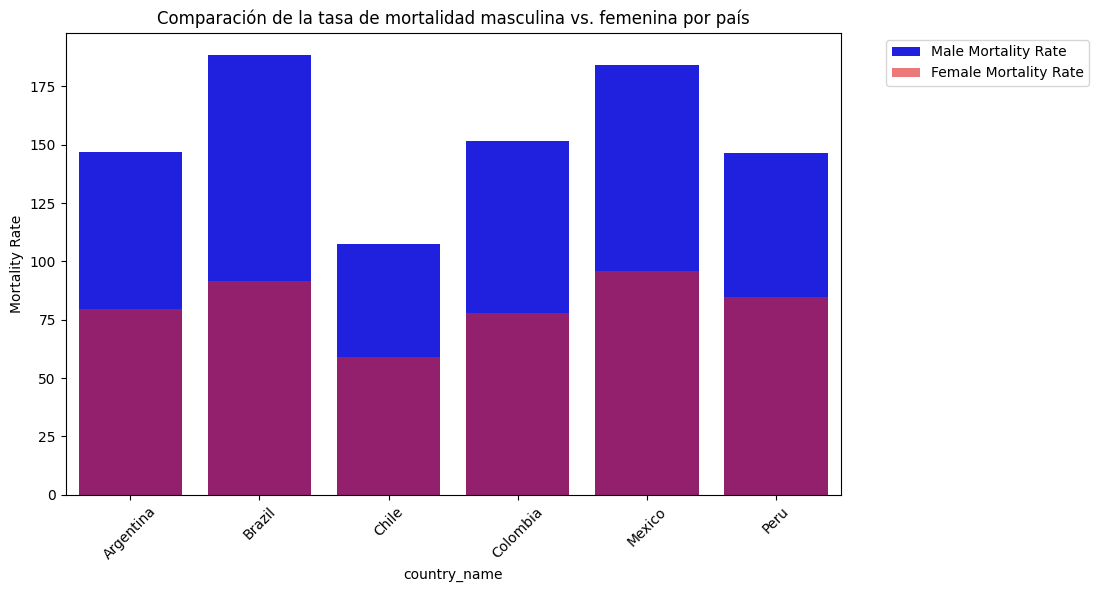

In [67]:
# Grafica de mortalidad por genero. Tasa de Mortalidad entendida en Cantidad de muertes cada 1.000.000 de habitantes

plt.figure(figsize=(10, 6))
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_male_mortality_rate', color='blue', label='Male Mortality Rate')
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_female_mortality_rate', color='red', alpha=0.6, label='Female Mortality Rate')
plt.xticks(rotation=45)
plt.ylabel('Mortality Rate')
plt.title('Comparación de la tasa de mortalidad masculina vs. femenina por país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

De acuerdo a la gráfica de mortalidad, se puede observar que en todos los paises la cantidad de muertes es mayor en los hombres que en las mujeres, por lo que se podría decir que los hombres son más vulnerables a la enfermedad o están menos protegidos.

Y si vemos las enfermedades preexistentes o comorbilidades? Podríamos ver si hay alguna enfermedad que sea más común en los paises seleccionados y que haya causado más muertes.

Veamos a ver si existe de una manera mas detallada la variables y la correlación entre ellas.

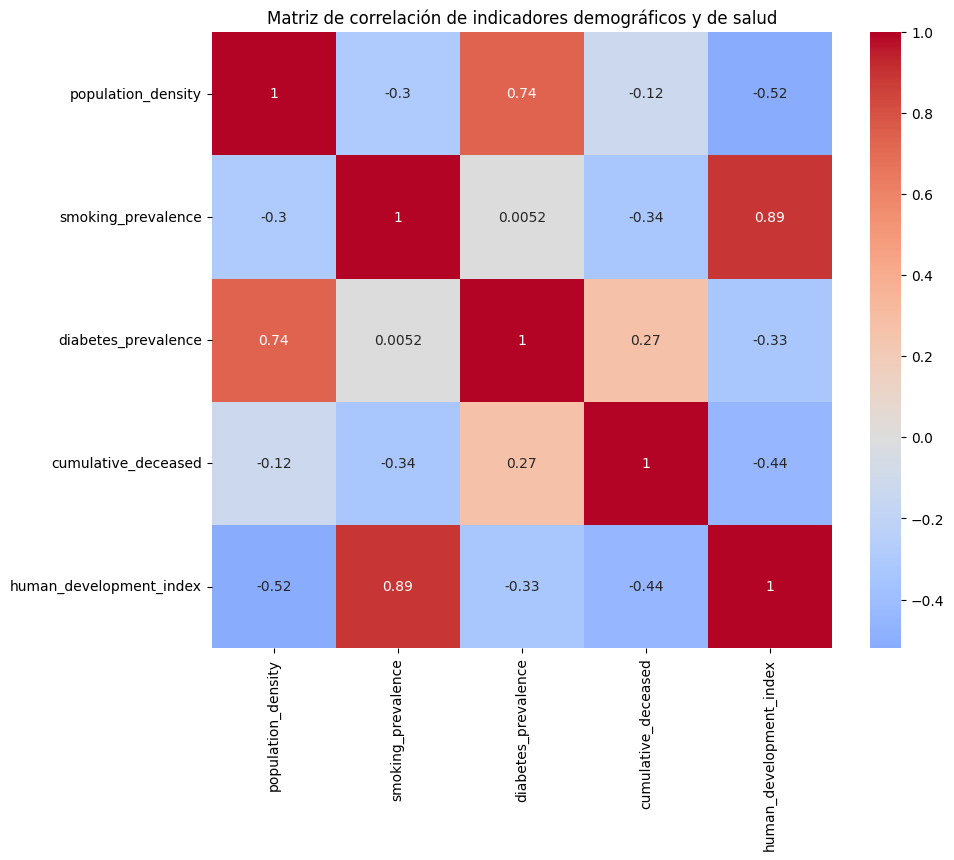

In [68]:
# Selecciono las variables númericas que quiero correlacionar
columns = ['population_density', 'smoking_prevalence', 'diabetes_prevalence', 'cumulative_deceased', 'human_development_index']
correlation_matrix = data_latinoamerica_paises[columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación de indicadores demográficos y de salud')
plt.show()

De esta matriz podemos observar que el fumar y tener diabetes son las enfermedades preexistentes que más afectan a la población en los paises seleccionados, por lo que se podría decir que estas enfermedades son las que más han causado muertes en los paises seleccionados, sin embargo esto no quiere decir que sean las únicas enfermedades que han causado muertes sino que son las más comúnes.

De acuerdo a esto veamos se comporta la mortalidad en los paises seleccionados por enfermedades preexistentes o comorbilidades.

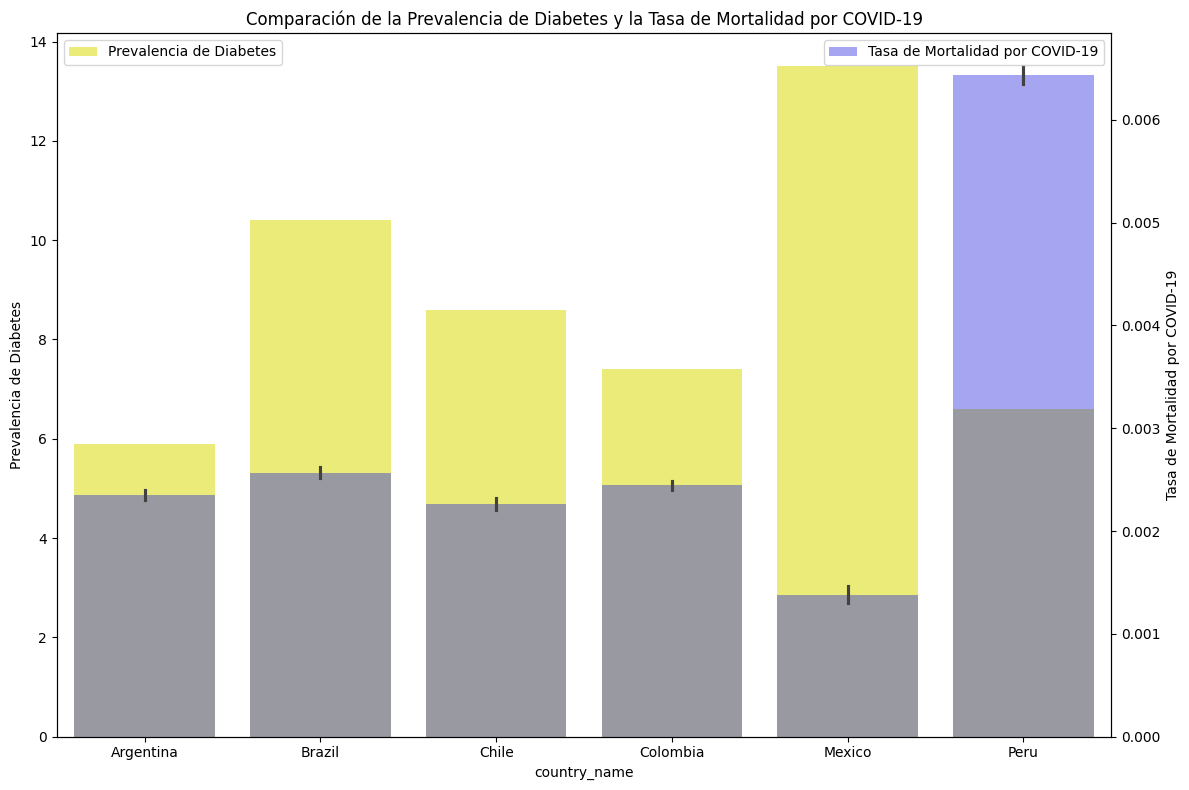

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['diabetes_prevalence'], 
            color='yellow', 
            label='Prevalencia de Diabetes',
            ax=ax,
            alpha=0.6
)

ax2 = ax.twinx()

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population'],
            color='Blue', 
            label='Tasa de Mortalidad por COVID-19', 
            ax=ax2,
            alpha=0.4)

plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Diabetes')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

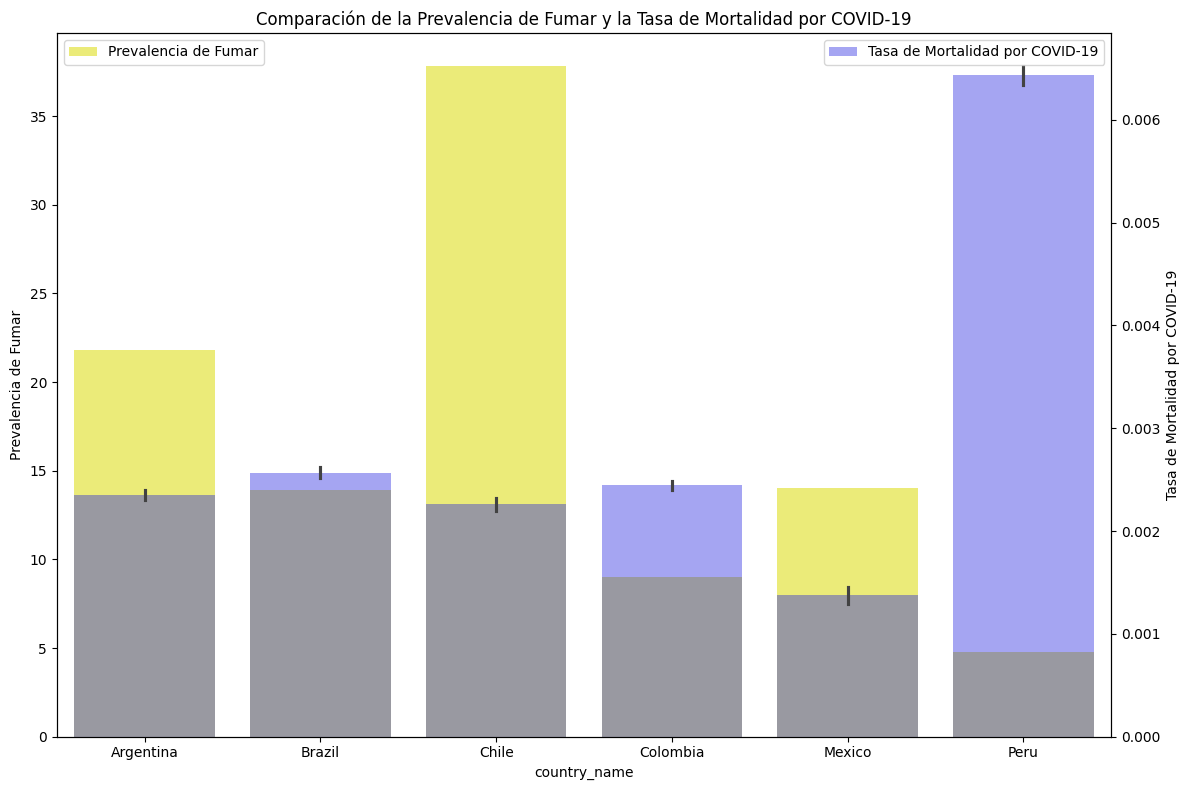

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['smoking_prevalence'], 
            color='yellow', 
            label='Prevalencia de Fumar',
            ax=ax,
            alpha=0.6)

ax2 = ax.twinx()

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population'], 
            color='Blue', 
            label='Tasa de Mortalidad por COVID-19', 
            ax=ax2,
            alpha=0.4)

plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Fumar')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Comparación de la Prevalencia de Fumar y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

Las dos enfermedades muestran un comportamiento similar en los paises seleccionados, sin embargo se puede observar que la diabetes es la enfermedad que más ha causado muertes en los paises seleccionados, seguido del fumar.

Como conclusión de este avance podemos decir que los paises que más necesitan ayuda son Brasil, México y Colombia, ya que son los paises que más casos confirmados y muertes han tenido, además de ser los paises que menos vacunas han administrado.

Las enfermedades preexistentes que más han afectado a la población en los paises seleccionados son el fumar y la diabetes, por lo que se podría decir que estas enfermedades son las que más han causado muertes en los paises seleccionados (Aclarar que esto no quiere decir que sean las únicas enfermedades que han causado muertes sino que son las más comúnes y de las que tenemos datos).

### Avance 3

2. Importa las librerías que necesites utilizar en este avance.

In [71]:
# Carga de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

3. Realiza un análisis exploratorio detallado utilizando técnicas avanzadas de Pandas y Numpy, centrándote en el análisis de series temporales para comprender la evolución de elementos específicos del conjunto de datos. Para ello, puedes empezar por identificar tendencias, estacionalidad y patrones temporales relevantes, análisis de autocorrelación y descomposición de series temporales. 

In [72]:
data_latinoamerica_paises = pd.read_csv("DatosFinalesFiltrado.csv")
data_latinoamerica_paises

location_key        date country_code country_name  new_confirmed  \
0              AR  2021-01-02           AR    Argentina        7767.00   
1              AR  2021-01-03           AR    Argentina        4934.00   
2              AR  2021-01-04           AR    Argentina       13953.00   
3              AR  2021-01-05           AR    Argentina       14085.00   
4              AR  2021-01-06           AR    Argentina       14496.00   
...           ...         ...          ...          ...            ...   
3739           PE  2022-09-13           PE         Peru        1150.00   
3740           PE  2022-09-14           PE         Peru        5032.18   
3741           PE  2022-09-15           PE         Peru        5032.18   
3742           PE  2022-09-16           PE         Peru        5032.18   
3743           PE  2022-09-17           PE         Peru        5032.18   

      new_deceased  cumulative_confirmed  cumulative_deceased  \
0           166.00            1670634.00             46688.00   
1           157.00            1675568.00             46845.00   
2           157.00            1689521.00             47002.00   
3           160.00            1703606.00             47162.00   
4           131.00            1718102.00             47293.00   
...            ...                   ...                  ...   
3739         22.00            4127612.00            216173.00   
3740        197.23            2576905.63            188954.37   
3741        197.23            2576905.63            188954.37   
3742        197.23            2576905.63            188954.37   
3743        197.23            2576905.63            188954.37   

      cumulative_vaccine_doses_administered  population  ...  \
0                                  20334.00 44938712.00  ...   
1                                  20529.00 44938712.00  ...   
2                                  25164.00 44938712.00  ...   
3                                  29852.00 44938712.00  ...   
4                                  34162.00 44938712.00  ...   
...                                     ...         ...  ...   
3739                                   0.00 29381884.00  ...   
3740                                   0.00 29381884.00  ...   
3741                                   0.00 29381884.00  ...   
3742                                   0.00 29381884.00  ...   
3743                                   0.00 29381884.00  ...   

      population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                 15057273.00        2690269.00          55032.00   
1                 15057273.00        2690269.00          55032.00   
2                 15057273.00        2690269.00          55032.00   
3                 15057273.00        2690269.00          55032.00   
4                 15057273.00        2690269.00          55032.00   
...                       ...               ...               ...   
3739              10554712.00        1256339.00          16425.00   
3740              10554712.00        1256339.00          16425.00   
3741              10554712.00        1256339.00          16425.00   
3742              10554712.00        1256339.00          16425.00   
3743              10554712.00        1256339.00          16425.00   

      life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0               76.52                     147.09                        79.48   
1               76.52                     147.09                        79.48   
2               76.52                     147.09                        79.48   
3               76.52                     147.09                        79.48   
4               76.52                     147.09                        79.48   
...               ...                        ...                          ...   
3739            76.52                     146.37                        84.81   
3740            76.52                     146.37                        84.81   
3741    

In [73]:
data_latinoamerica_paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3744 non-null   float64
 5   new_deceased                           3744 non-null   float64
 6   cumulative_confirmed                   3744 non-null   float64
 7   cumulative_deceased                    3744 non-null   float64
 8   cumulative_vaccine_doses_administered  3744 non-null   float64
 9   population                             3744 non-null   float64
 10  population_male                        3744 non-null   float64
 11  popu

In [74]:
data_latinoamerica_paises["date"] = pd.to_datetime(data_latinoamerica_paises["date"])
data_latinoamerica_paises = data_latinoamerica_paises.set_index("date")
data_latinoamerica_paises

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina        7767.00   
2021-01-03           AR           AR    Argentina        4934.00   
2021-01-04           AR           AR    Argentina       13953.00   
2021-01-05           AR           AR    Argentina       14085.00   
2021-01-06           AR           AR    Argentina       14496.00   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru        1150.00   
2022-09-14           PE           PE         Peru        5032.18   
2022-09-15           PE           PE         Peru        5032.18   
2022-09-16           PE           PE         Peru        5032.18   
2022-09-17           PE           PE         Peru        5032.18   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02        166.00            1670634.00             46688.00   
2021-01-03        157.00            1675568.00             46845.00   
2021-01-04        157.00            1689521.00             47002.00   
2021-01-05        160.00            1703606.00             47162.00   
2021-01-06        131.00            1718102.00             47293.00   
...                  ...                   ...                  ...   
2022-09-13         22.00            4127612.00            216173.00   
2022-09-14        197.23            2576905.63            188954.37   
2022-09-15        197.23            2576905.63            188954.37   
2022-09-16        197.23            2576905.63            188954.37   
2022-09-17        197.23            2576905.63            188954.37   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                               20334.00 44938712.00   
2021-01-03                               20529.00 44938712.00   
2021-01-04                               25164.00 44938712.00   
2021-01-05                               29852.00 44938712.00   
2021-01-06                               34162.00 44938712.00   
...                                           ...         ...   
2022-09-13                                   0.00 29381884.00   
2022-09-14                                   0.00 29381884.00   
2022-09-15                                   0.00 29381884.00   
2022-09-16                                   0.00 29381884.00   
2022-09-17                                   0.00 29381884.00   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-02      19523766.00  ...              15057273.00        2690269.00   
2021-01-03      19523766.00  ...              15057273.00        2690269.00   
2021-01-04      19523766.00  ...              15057273.00        2690269.00   
2021-01-05      19523766.00  ...              15057273.00        2690269.00   
2021-01-06      19523766.00  ...              15057273.00        2690269.00   
...                     ...  ...                      ...               ...   
2022-09-13      14450757.00  ...              10554712.00        1256339.00   
2022-09-14      14450757.00  ...              10554712.00        1256339.00   
2022-09-15      14450757.00  ...              10554712.00        1256339.00   
2022-09-16      14450757.00  ...              10554712.00        1256339.00   
2022-09-17      14450757.00  ...              10554712.00        1256339.00   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-02          55032.00            76.52                     147.09   
2021-01-03          55032.00            76.52                     147.09   
2021-01-04          5503

In [75]:
data_latinoamerica_paises['week'] = data_latinoamerica_paises.index.isocalendar().week
data_latinoamerica_paises

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina        7767.00   
2021-01-03           AR           AR    Argentina        4934.00   
2021-01-04           AR           AR    Argentina       13953.00   
2021-01-05           AR           AR    Argentina       14085.00   
2021-01-06           AR           AR    Argentina       14496.00   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru        1150.00   
2022-09-14           PE           PE         Peru        5032.18   
2022-09-15           PE           PE         Peru        5032.18   
2022-09-16           PE           PE         Peru        5032.18   
2022-09-17           PE           PE         Peru        5032.18   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02        166.00            1670634.00             46688.00   
2021-01-03        157.00            1675568.00             46845.00   
2021-01-04        157.00            1689521.00             47002.00   
2021-01-05        160.00            1703606.00             47162.00   
2021-01-06        131.00            1718102.00             47293.00   
...                  ...                   ...                  ...   
2022-09-13         22.00            4127612.00            216173.00   
2022-09-14        197.23            2576905.63            188954.37   
2022-09-15        197.23            2576905.63            188954.37   
2022-09-16        197.23            2576905.63            188954.37   
2022-09-17        197.23            2576905.63            188954.37   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                               20334.00 44938712.00   
2021-01-03                               20529.00 44938712.00   
2021-01-04                               25164.00 44938712.00   
2021-01-05                               29852.00 44938712.00   
2021-01-06                               34162.00 44938712.00   
...                                           ...         ...   
2022-09-13                                   0.00 29381884.00   
2022-09-14                                   0.00 29381884.00   
2022-09-15                                   0.00 29381884.00   
2022-09-16                                   0.00 29381884.00   
2022-09-17                                   0.00 29381884.00   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-02      19523766.00  ...        2690269.00          55032.00   
2021-01-03      19523766.00  ...        2690269.00          55032.00   
2021-01-04      19523766.00  ...        2690269.00          55032.00   
2021-01-05      19523766.00  ...        2690269.00          55032.00   
2021-01-06      19523766.00  ...        2690269.00          55032.00   
...                     ...  ...               ...               ...   
2022-09-13      14450757.00  ...        1256339.00          16425.00   
2022-09-14      14450757.00  ...        1256339.00          16425.00   
2022-09-15      14450757.00  ...        1256339.00          16425.00   
2022-09-16      14450757.00  ...        1256339.00          16425.00   
2022-09-17      14450757.00  ...        1256339.00          16425.00   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02            76.52                     147.09   
2021-01-03            76.52                     147.09   
2021-01-04            76.52                     147.09   
2021-01-05            76.52                     147.09   
2021-01-06            76.52                     147.09   
...          

Como primera aproximación vamos a realizar un análisis del comportamiento de manera semanal y anual, para esto vamos a agrupar los datos por semana y por año. Para que recordemos como usar groupby.

In [76]:
data_latinoamerica_paises_2021 = data_latinoamerica_paises.loc[
    (data_latinoamerica_paises.index >= '2021-01-01') & 
    (data_latinoamerica_paises.index <= '2021-12-31')
]
data_latinoamerica_paises_2021

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina        7767.00   
2021-01-03           AR           AR    Argentina        4934.00   
2021-01-04           AR           AR    Argentina       13953.00   
2021-01-05           AR           AR    Argentina       14085.00   
2021-01-06           AR           AR    Argentina       14496.00   
...                 ...          ...          ...            ...   
2021-12-27           PE           PE         Peru        3261.00   
2021-12-28           PE           PE         Peru        4270.00   
2021-12-29           PE           PE         Peru        4340.00   
2021-12-30           PE           PE         Peru        5220.00   
2021-12-31           PE           PE         Peru        4290.00   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02        166.00            1670634.00             46688.00   
2021-01-03        157.00            1675568.00             46845.00   
2021-01-04        157.00            1689521.00             47002.00   
2021-01-05        160.00            1703606.00             47162.00   
2021-01-06        131.00            1718102.00             47293.00   
...                  ...                   ...                  ...   
2021-12-27         29.00            2285854.00            202515.00   
2021-12-28         37.00            2290124.00            202552.00   
2021-12-29         40.00            2294464.00            202592.00   
2021-12-30         45.00            2299684.00            202637.00   
2021-12-31         37.00            2303974.00            202674.00   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                               20334.00 44938712.00   
2021-01-03                               20529.00 44938712.00   
2021-01-04                               25164.00 44938712.00   
2021-01-05                               29852.00 44938712.00   
2021-01-06                               34162.00 44938712.00   
...                                           ...         ...   
2021-12-27                            50186253.00 29381884.00   
2021-12-28                            50515554.00 29381884.00   
2021-12-29                            50800766.00 29381884.00   
2021-12-30                            51020490.00 29381884.00   
2021-12-31                            51092425.00 29381884.00   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-02      19523766.00  ...        2690269.00          55032.00   
2021-01-03      19523766.00  ...        2690269.00          55032.00   
2021-01-04      19523766.00  ...        2690269.00          55032.00   
2021-01-05      19523766.00  ...        2690269.00          55032.00   
2021-01-06      19523766.00  ...        2690269.00          55032.00   
...                     ...  ...               ...               ...   
2021-12-27      14450757.00  ...        1256339.00          16425.00   
2021-12-28      14450757.00  ...        1256339.00          16425.00   
2021-12-29      14450757.00  ...        1256339.00          16425.00   
2021-12-30      14450757.00  ...        1256339.00          16425.00   
2021-12-31      14450757.00  ...        1256339.00          16425.00   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02            76.52                     147.09   
2021-01-03            76.52                     147.09   
2021-01-04            76.52                     147.09   
2021-01-05            76.52                     147.09   
2021-01-06            76.52                     147.09   
...          

In [77]:
weekly_cases = data_latinoamerica_paises_2021.groupby(['country_name', 'week'])[['new_confirmed','new_deceased']].sum().reset_index()
weekly_cases

country_name  week  new_confirmed  new_deceased
0      Argentina     1       85321.00       1093.00
1      Argentina     2       76129.00       1191.00
2      Argentina     3       66250.00       1321.00
3      Argentina     4       58524.00       1199.00
4      Argentina     5       50576.00       1112.00
..           ...   ...            ...           ...
313         Peru    49       10004.00        272.00
314         Peru    50       10637.00        265.00
315         Peru    51       11306.00        257.00
316         Peru    52       21381.00        188.00
317         Peru    53        3355.00        374.00

[318 rows x 4 columns]

In [78]:
weekly_cases['country_name'].unique()

array(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru'],
      dtype=object)

In [79]:
import warnings

# Ignorar todos los warnings
warnings.filterwarnings("ignore")

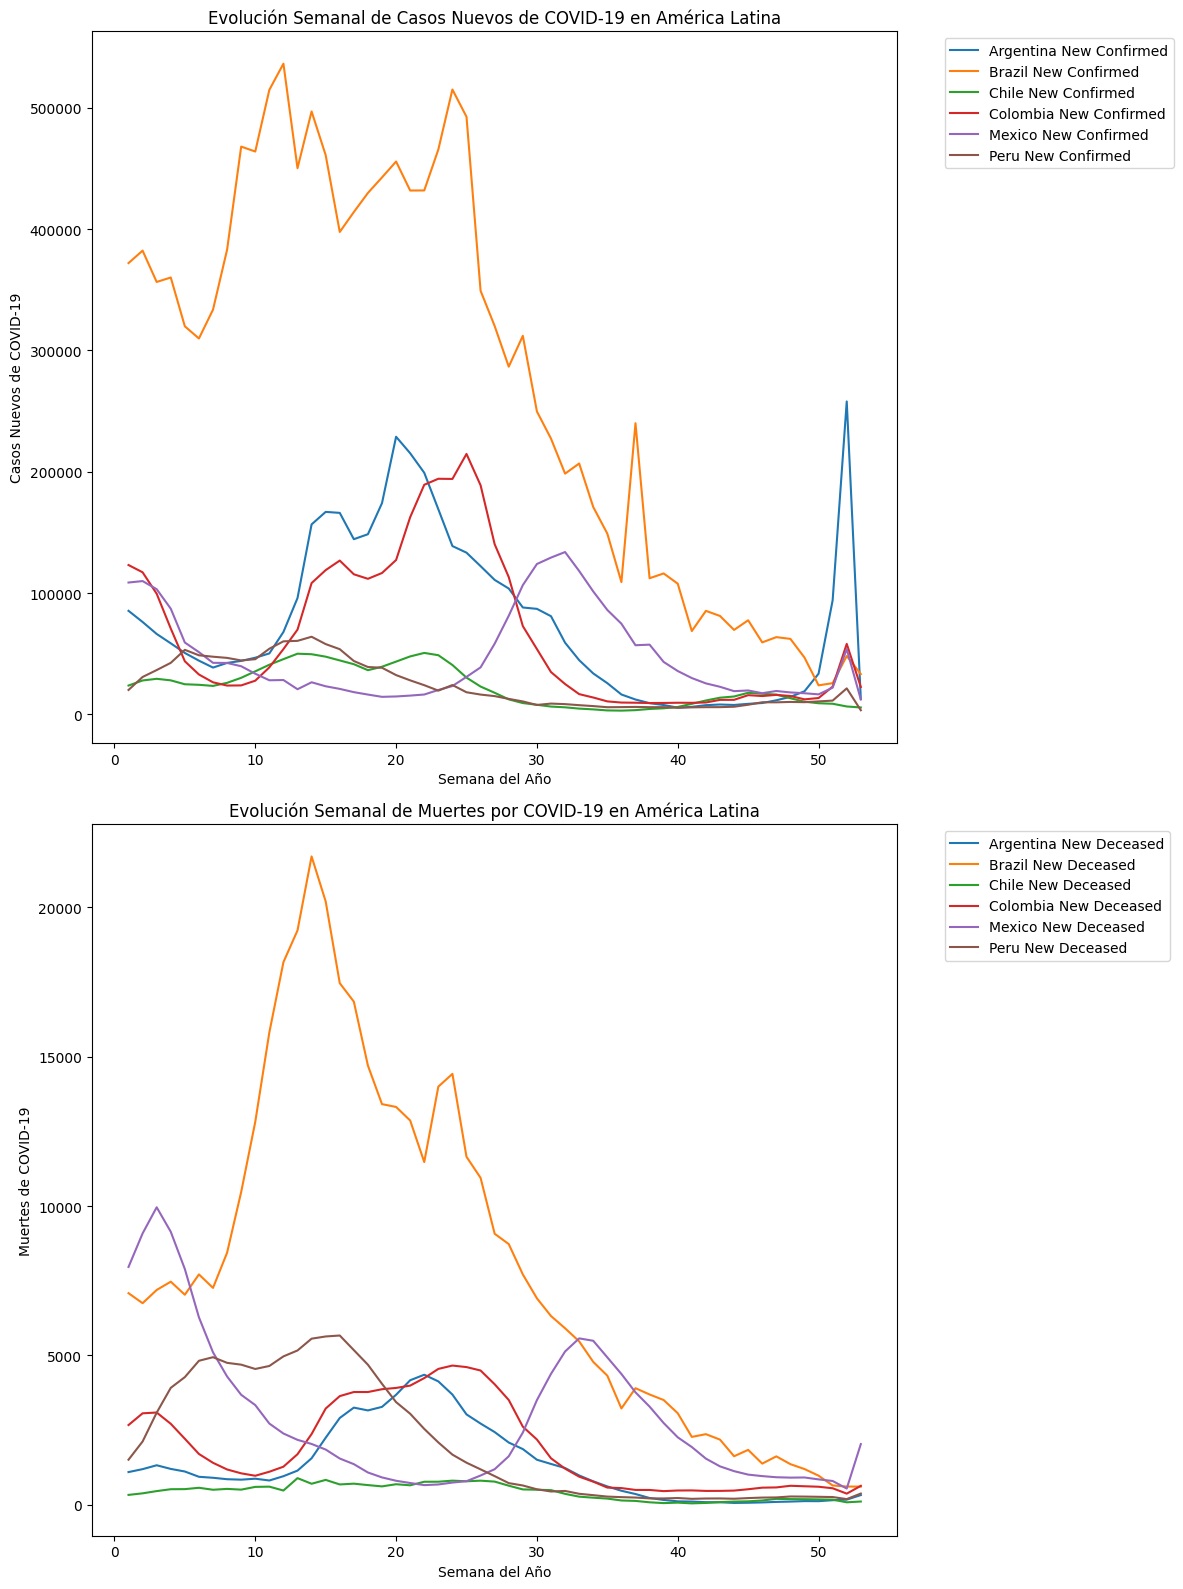

In [80]:
# Vamos a analizar como evolucionan los casos de COVID-19 en América Latina a lo largo del tiempo por semana
weekly_cases = data_latinoamerica_paises_2021.groupby(['country_name', 'week'])[['new_confirmed','new_deceased']].sum().reset_index() # type: ignore

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 16))
for country in weekly_cases['country_name'].unique():
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == country]
    ax[0].plot(country_weekly_cases['week'], country_weekly_cases['new_confirmed'], label=f'{country} New Confirmed')
    ax[1].plot(country_weekly_cases['week'], country_weekly_cases['new_deceased'], label=f'{country} New Deceased')

ax[0].set_xlabel("Semana del Año")
ax[0].set_ylabel("Casos Nuevos de COVID-19")
ax[0].set_title("Evolución Semanal de Casos Nuevos de COVID-19 en América Latina")
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax[1].set_xlabel("Semana del Año")
ax[1].set_ylabel("Muertes de COVID-19")
ax[1].set_title("Evolución Semanal de Muertes por COVID-19 en América Latina")
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

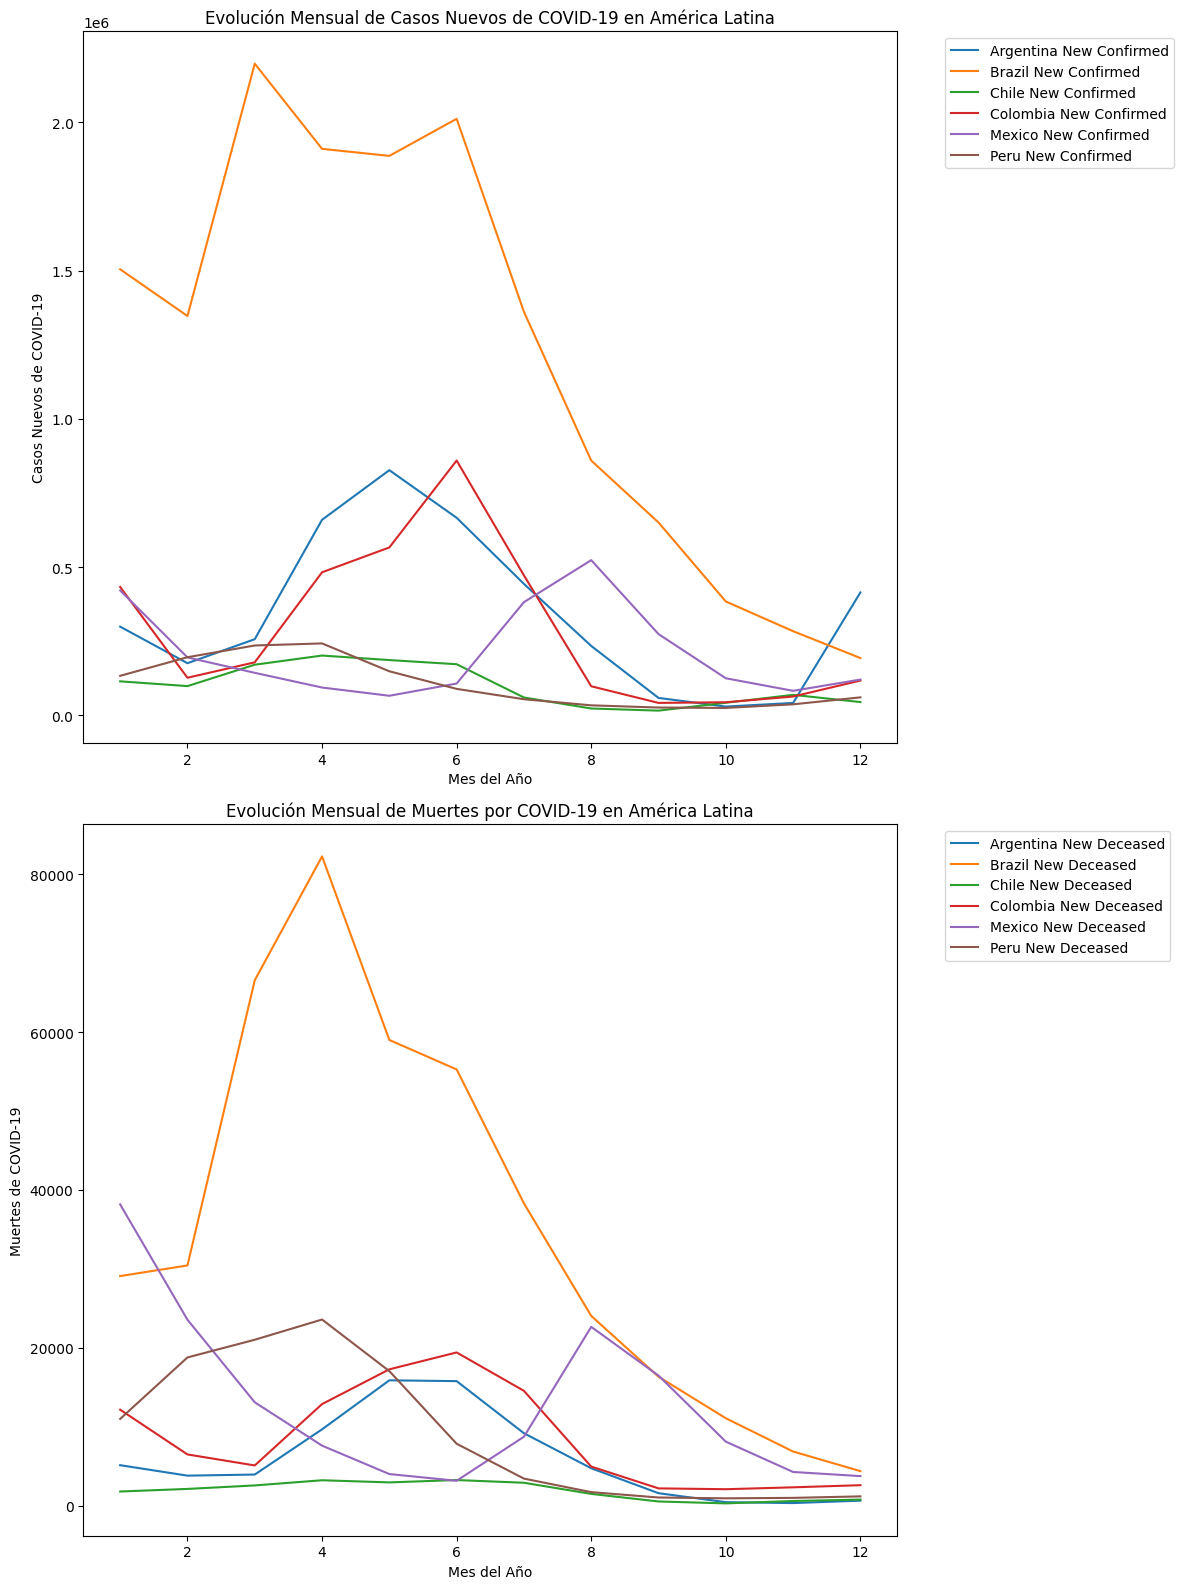

In [81]:

#ahora por vamos por mes del añoaño
data_latinoamerica_paises_2021['month'] = data_latinoamerica_paises_2021.index.month # type: ignore
yearly_cases = data_latinoamerica_paises_2021.groupby(['country_name', 'month'])[['new_confirmed','new_deceased']].sum().reset_index() # type: ignore

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 16))
for country in yearly_cases['country_name'].unique():
    country_yearly_cases = yearly_cases[yearly_cases['country_name'] == country]
    ax[0].plot(country_yearly_cases['month'], country_yearly_cases['new_confirmed'], label=f'{country} New Confirmed')
    ax[1].plot(country_yearly_cases['month'], country_yearly_cases['new_deceased'], label=f'{country} New Deceased')

ax[0].set_xlabel("Mes del Año")
ax[0].set_ylabel("Casos Nuevos de COVID-19")
ax[0].set_title("Evolución Mensual de Casos Nuevos de COVID-19 en América Latina")
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax[1].set_xlabel("Mes del Año")
ax[1].set_ylabel("Muertes de COVID-19")
ax[1].set_title("Evolución Mensual de Muertes por COVID-19 en América Latina")
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

De la anterior gráfica se puede observar que la cantidad de casos confirmados y muertes ha ido disminuyendo a lo largo del tiempo, sin embargo esto no quiere decir que la pandemia haya terminado, ya que la cantidad de casos confirmados y muertes sigue siendo alta, ademas se nota un pico en la fechas finales.

4. Genera gráficas acordes a tu análisis. Las mismas pueden ser:
    - Evolución de Casos Activos vs. Recuperados
    - Tasa de Crecimiento (%)
    - Relación entre la Cobertura de Vacunación y la Reducción de Casos
    - ('País') Progreso de la vacunación por país
    - Nuevos casos y temperatura promedio
    - Impacto de la Urbanización en la Propagación del Covid-19
    - Evolución Semanal de Casos Nuevos
    - Evolución Anual de Casos Nuevos
    - Distribución de la Población por Edad en Países
    - Comparación de Estrategias de Vacunación en América Latina
    - Evolución del Número de Muertes Diarias.
    - Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad
    - Variación Mensual de Casos y Muertes
    - Análisis Temporal de la Mortalidad/
    - Comparación de la Situación Actual (Contexto de los datos)


In [82]:
data_latinoamerica_paises

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina        7767.00   
2021-01-03           AR           AR    Argentina        4934.00   
2021-01-04           AR           AR    Argentina       13953.00   
2021-01-05           AR           AR    Argentina       14085.00   
2021-01-06           AR           AR    Argentina       14496.00   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru        1150.00   
2022-09-14           PE           PE         Peru        5032.18   
2022-09-15           PE           PE         Peru        5032.18   
2022-09-16           PE           PE         Peru        5032.18   
2022-09-17           PE           PE         Peru        5032.18   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02        166.00            1670634.00             46688.00   
2021-01-03        157.00            1675568.00             46845.00   
2021-01-04        157.00            1689521.00             47002.00   
2021-01-05        160.00            1703606.00             47162.00   
2021-01-06        131.00            1718102.00             47293.00   
...                  ...                   ...                  ...   
2022-09-13         22.00            4127612.00            216173.00   
2022-09-14        197.23            2576905.63            188954.37   
2022-09-15        197.23            2576905.63            188954.37   
2022-09-16        197.23            2576905.63            188954.37   
2022-09-17        197.23            2576905.63            188954.37   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                               20334.00 44938712.00   
2021-01-03                               20529.00 44938712.00   
2021-01-04                               25164.00 44938712.00   
2021-01-05                               29852.00 44938712.00   
2021-01-06                               34162.00 44938712.00   
...                                           ...         ...   
2022-09-13                                   0.00 29381884.00   
2022-09-14                                   0.00 29381884.00   
2022-09-15                                   0.00 29381884.00   
2022-09-16                                   0.00 29381884.00   
2022-09-17                                   0.00 29381884.00   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-02      19523766.00  ...        2690269.00          55032.00   
2021-01-03      19523766.00  ...        2690269.00          55032.00   
2021-01-04      19523766.00  ...        2690269.00          55032.00   
2021-01-05      19523766.00  ...        2690269.00          55032.00   
2021-01-06      19523766.00  ...        2690269.00          55032.00   
...                     ...  ...               ...               ...   
2022-09-13      14450757.00  ...        1256339.00          16425.00   
2022-09-14      14450757.00  ...        1256339.00          16425.00   
2022-09-15      14450757.00  ...        1256339.00          16425.00   
2022-09-16      14450757.00  ...        1256339.00          16425.00   
2022-09-17      14450757.00  ...        1256339.00          16425.00   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02            76.52                     147.09   
2021-01-03            76.52                     147.09   
2021-01-04            76.52                     147.09   
2021-01-05            76.52                     147.09   
2021-01-06            76.52                     147.09   
...          

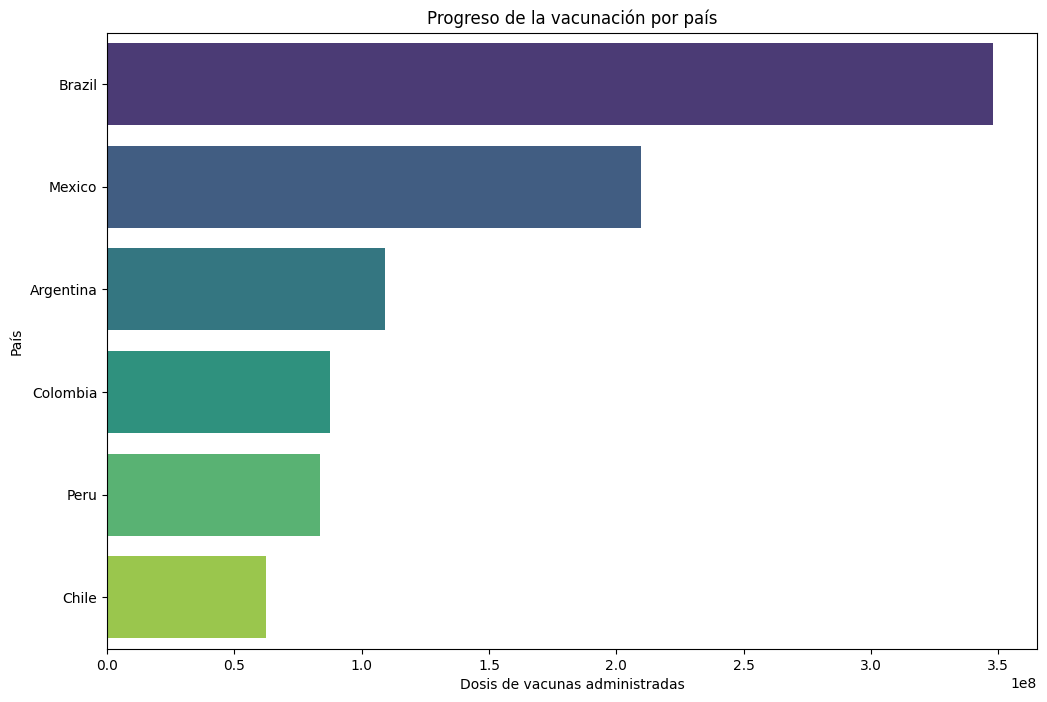

In [83]:
# - Comparación de Estrategias de Vacunación en América Latina
vaccination_data = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=vaccination_data.values, y=vaccination_data.index, hue=vaccination_data.index, palette='viridis')
plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('País')
plt.title('Progreso de la vacunación por país')

plt.show()

El país con mayor dosis administradas es Brasil, seguido de México, Argentina, Colombia, Perú, Chile.

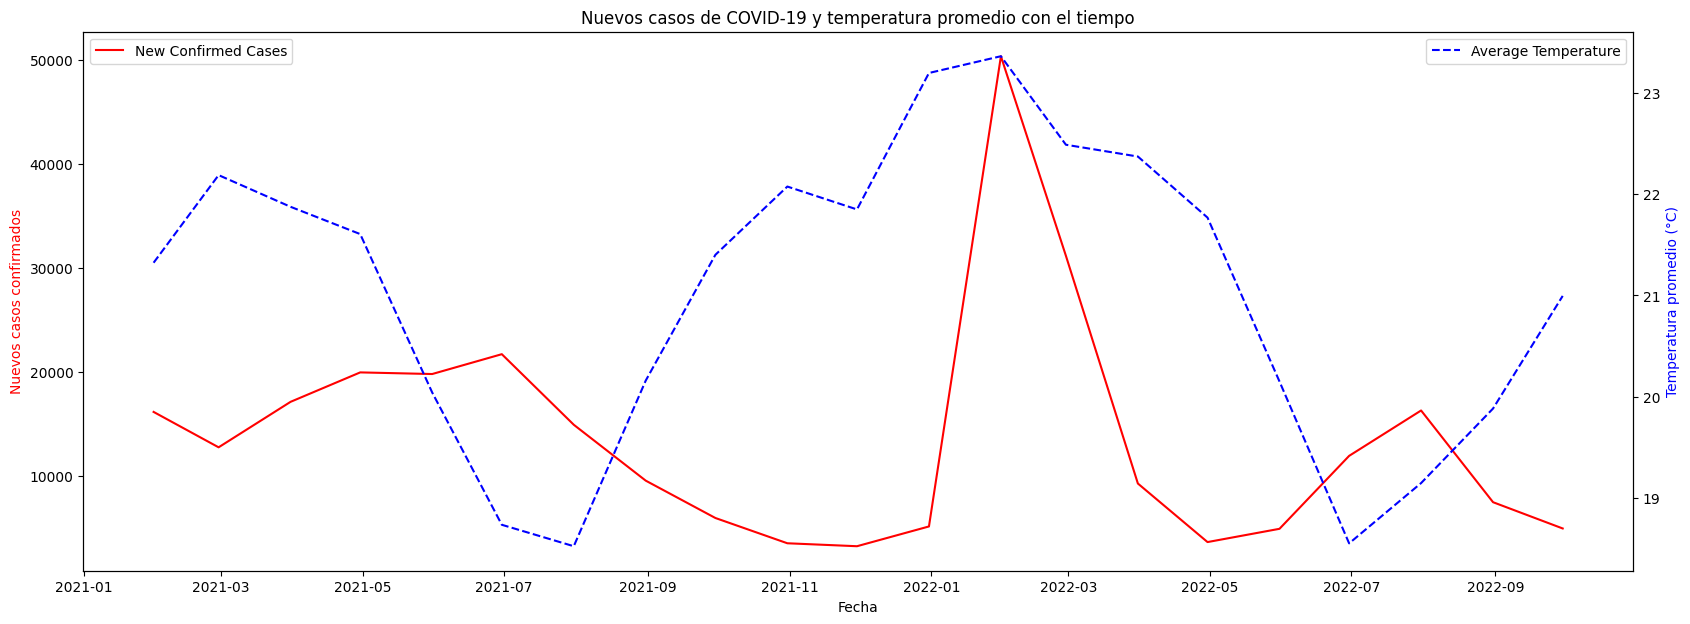

In [84]:
# - Nuevos casos y temperatura promedio
# Graficamos la relación entre la temperatura promedio y los nuevos casos confirmados de COVID-19

plt.figure(figsize=(20, 7))
ax1 = plt.gca() # Obtiene el eje actual de la gráfica y lo asigna a ax1.
ax2 = ax1.twinx() # Crea un segundo eje ax2 que comparte el mismo eje x que ax1, permitiendo graficar dos conjuntos de datos con diferentes escalas y unidades en el mismo gráfico.
ax1.plot(data_latinoamerica_paises.resample('ME').mean(numeric_only=True).index, data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'], color='red', label='New Confirmed Cases')
ax2.plot(data_latinoamerica_paises.resample('ME').mean(numeric_only=True).index, data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['average_temperature_celsius'], color='blue', label='Average Temperature', linestyle='--')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos casos confirmados', color='red')
ax2.set_ylabel('Temperatura promedio (°C)', color='blue')
plt.title('Nuevos casos de COVID-19 y temperatura promedio con el tiempo')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

Podemos observar que la temperatura promedio ha ido aumentando y los casos confirmados han ido disminuyendo sin embargo hubo un pico antes del mes de marzo pero disminuyó rápidamente, esto puede ser por la cantidad de vacunas administradas o por la cantidad de personas que se han vacunado.

Cada país tiene un impacto debido a la urbanización y la densidad de población, por lo que vamos a analizar la densidad de población en cada país.

In [85]:
data_latinoamerica_paises.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

In [86]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [87]:
data_latinoamerica_paises[["population","population_urban","cumulative_confirmed"]]

population  population_urban  cumulative_confirmed
date                                                          
2021-01-02 44938712.00       41339571.00            1670634.00
2021-01-03 44938712.00       41339571.00            1675568.00
2021-01-04 44938712.00       41339571.00            1689521.00
2021-01-05 44938712.00       41339571.00            1703606.00
2021-01-06 44938712.00       41339571.00            1718102.00
...                ...               ...                   ...
2022-09-13 29381884.00       25390339.00            4127612.00
2022-09-14 29381884.00       25390339.00            2576905.63
2022-09-15 29381884.00       25390339.00            2576905.63
2022-09-16 29381884.00       25390339.00            2576905.63
2022-09-17 29381884.00       25390339.00            2576905.63

[3744 rows x 3 columns]

In [88]:
# -Impacto de la Urbanización en la Propagación del Covid-19
data_latinoamerica_paises['urban_population_percentage'] = data_latinoamerica_paises['population_urban'] / data_latinoamerica_paises['population']
data_latinoamerica_paises['confirmed_population_percentage'] = data_latinoamerica_paises['cumulative_confirmed'] / data_latinoamerica_paises['population']
urban_cases = data_latinoamerica_paises.groupby('country_name').last().sort_values(by='urban_population_percentage')
urban_cases

location_key country_code  new_confirmed  new_deceased  \
country_name                                                          
Colombia               CO           CO        7407.41        185.10   
Brazil                 BR           BR       43196.55        787.45   
Peru                   PE           PE        5032.18        197.23   
Argentina              AR           AR       12911.39        134.38   
Mexico                 MX           MX        8874.67        285.94   
Chile                  CL           CL        6109.25         71.23   

              cumulative_confirmed  cumulative_deceased  \
country_name                                              
Colombia                4765656.10            124442.12   
Brazil                 22540067.93            546022.74   
Peru                    2576905.63            188954.37   
Argentina               6079578.72            105716.12   
Mexico                  2460619.11            152805.81   
Chile                   2239614.29             39806.26   

              cumulative_vaccine_doses_administered   population  \
country_name                                                       
Colombia                                       0.00  50882884.00   
Brazil                                         0.00 212559409.00   
Peru                                           0.00  29381884.00   
Argentina                                      0.00  44938712.00   
Mexico                                         0.00 110991953.00   
Chile                                          0.00  17574003.00   

              population_male  population_female  ...  life_expectancy  \
country_name                                      ...                    
Colombia          24984564.00        25898320.00  ...            77.11   
Brazil           104435783.00       108123626.00  ...            75.67   
Peru              14450757.00        14931127.00  ...            76.52   
Argentina         19523766.00        20593330.00  ...            76.52   
Mexico            54855231.00        57481307.00  ...            74.99   
Chile              8972014.00         8601989.00  ...            80.04   

              adult_male_mortality_rate  adult_female_mortality_rate  \
country_name                                                           
Colombia                         151.62                        78.00   
Brazil                           188.53                        91.42   
Peru                             146.37                        84.81   
Argentina                        147.09                        79.48   
Mexico                           184.38                        95.81   
Chile                            107.67                        59.03   

              pollution_mortality_rate  comorbidity_mortality_rate  \
country_name                                                         
Colombia                         37.00                       15.80   
Brazil                           29.90                       16.60   
Peru                             63.90                       12.60   
Argentina                        26.60                       15.80   
Mexico                           36.70                       15.70   
Chile                            25.30                       12.40   

              new_recovered  cumulative_recovered  week  \
country_name                                              
Colombia           10283.72            3688457.10    37   
Brazil             43412.51           21180663.69    37   
Peru                   0.00                  0.00    37   
Argentina              0.00                  0.00    37   
Mexico                 0.00                  0.00    37   
Chile                  0.00                  0.00    37   

              urban_population_percentage  confirmed_population_percentage  
country_name                                                                
Colombia                             0.80                           

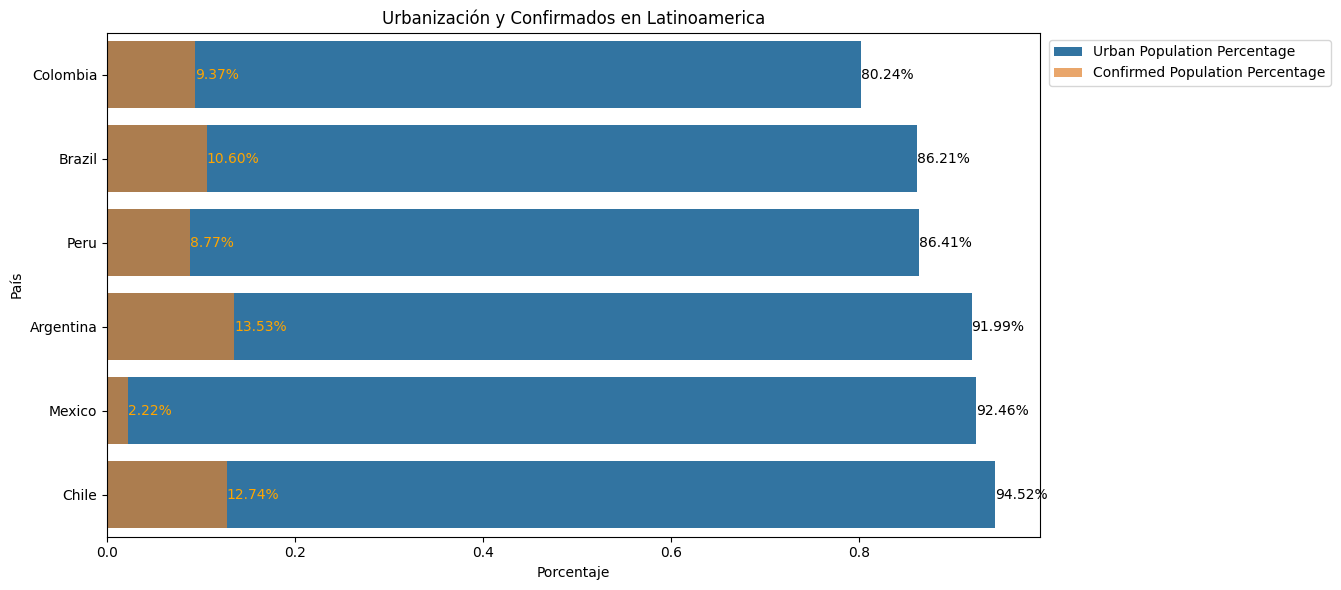

In [89]:
# - Impacto de la Urbanización en la Propagación del Covid-19: Urbanización en Latinoamerica
data_latinoamerica_paises['urban_population_percentage'] = data_latinoamerica_paises['population_urban'] / data_latinoamerica_paises['population']
data_latinoamerica_paises['confirmed_population_percentage'] = data_latinoamerica_paises['cumulative_confirmed'] / data_latinoamerica_paises['population']
urban_cases = data_latinoamerica_paises.groupby('country_name').last().sort_values(by='urban_population_percentage')

plt.figure(figsize=(14, 6))
ax = sns.barplot(x='urban_population_percentage', y=urban_cases.index, data=urban_cases, label='Urban Population Percentage')

# Añadir etiquetas a cada barra para urban_population_percentage
for index, value in enumerate(urban_cases['urban_population_percentage']):
    ax.text(value, index, f'{value*100:.2f}%', color='black', ha="left", va="center")

# Superponer la segunda barra para confirmed_population_percentage
ax2 = sns.barplot(x='confirmed_population_percentage', y=urban_cases.index, data=urban_cases, alpha=0.7, label='Confirmed Population Percentage')

# Añadir etiquetas a cada barra para confirmed_population_percentage
for index, value in enumerate(urban_cases['confirmed_population_percentage']):
    ax2.text(value, index, f'{value*100:.2f}%', color='orange', ha="left", va="center")

plt.xlabel('Porcentaje')
plt.ylabel('País')
plt.title('Urbanización y Confirmados en Latinoamerica')
plt.legend(bbox_to_anchor=(1.32, 1), loc="upper right")
plt.tight_layout()
plt.show()


In [91]:
data_latinoamerica_paises['deceased_percentage'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population']
data_latinoamerica_paises

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina        7767.00   
2021-01-03           AR           AR    Argentina        4934.00   
2021-01-04           AR           AR    Argentina       13953.00   
2021-01-05           AR           AR    Argentina       14085.00   
2021-01-06           AR           AR    Argentina       14496.00   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru        1150.00   
2022-09-14           PE           PE         Peru        5032.18   
2022-09-15           PE           PE         Peru        5032.18   
2022-09-16           PE           PE         Peru        5032.18   
2022-09-17           PE           PE         Peru        5032.18   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02        166.00            1670634.00             46688.00   
2021-01-03        157.00            1675568.00             46845.00   
2021-01-04        157.00            1689521.00             47002.00   
2021-01-05        160.00            1703606.00             47162.00   
2021-01-06        131.00            1718102.00             47293.00   
...                  ...                   ...                  ...   
2022-09-13         22.00            4127612.00            216173.00   
2022-09-14        197.23            2576905.63            188954.37   
2022-09-15        197.23            2576905.63            188954.37   
2022-09-16        197.23            2576905.63            188954.37   
2022-09-17        197.23            2576905.63            188954.37   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                               20334.00 44938712.00   
2021-01-03                               20529.00 44938712.00   
2021-01-04                               25164.00 44938712.00   
2021-01-05                               29852.00 44938712.00   
2021-01-06                               34162.00 44938712.00   
...                                           ...         ...   
2022-09-13                                   0.00 29381884.00   
2022-09-14                                   0.00 29381884.00   
2022-09-15                                   0.00 29381884.00   
2022-09-16                                   0.00 29381884.00   
2022-09-17                                   0.00 29381884.00   

            population_male  ...  adult_male_mortality_rate  \
date                         ...                              
2021-01-02      19523766.00  ...                     147.09   
2021-01-03      19523766.00  ...                     147.09   
2021-01-04      19523766.00  ...                     147.09   
2021-01-05      19523766.00  ...                     147.09   
2021-01-06      19523766.00  ...                     147.09   
...                     ...  ...                        ...   
2022-09-13      14450757.00  ...                     146.37   
2022-09-14      14450757.00  ...                     146.37   
2022-09-15      14450757.00  ...                     146.37   
2022-09-16      14450757.00  ...                     146.37   
2022-09-17      14450757.00  ...                     146.37   

            adult_female_mortality_rate  pollution_mortality_rate  \
date                                                                
2021-01-02                        79.48                     26.60   
2021-01-03                        79.48                     26.60   
2021-01-04                        79.48                     26.60   
2021-01-05                        79.48                     26.60   
2021-01-06                        79.48                     26.60   
...                                 ...              

In [92]:
high_mortality_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False).head(5).index
high_mortality_countries

Index(['Peru', 'Chile', 'Brazil', 'Colombia', 'Argentina'], dtype='object', name='country_name')

In [93]:
data_latinoamerica_paises.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

In [94]:
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
data_latinoamerica_paises[age_groups]

population_age_00_09  population_age_10_19  population_age_20_29  \
date                                                                           
2021-01-02            6718871.00            7045513.00            6430658.00   
2021-01-03            6718871.00            7045513.00            6430658.00   
2021-01-04            6718871.00            7045513.00            6430658.00   
2021-01-05            6718871.00            7045513.00            6430658.00   
2021-01-06            6718871.00            7045513.00            6430658.00   
...                          ...                   ...                   ...   
2022-09-13            5140624.00            5035905.00            4895056.00   
2022-09-14            5140624.00            5035905.00            4895056.00   
2022-09-15            5140624.00            5035905.00            4895056.00   
2022-09-16            5140624.00            5035905.00            4895056.00   
2022-09-17            5140624.00            5035905.00            4895056.00   

            population_age_30_39  population_age_40_49  population_age_50_59  \
date                                                                           
2021-01-02            5777148.00            4507125.00            3911943.00   
2021-01-03            5777148.00            4507125.00            3911943.00   
2021-01-04            5777148.00            4507125.00            3911943.00   
2021-01-05            5777148.00            4507125.00            3911943.00   
2021-01-06            5777148.00            4507125.00            3911943.00   
...                          ...                   ...                   ...   
2022-09-13            4379777.00            3660378.00            2772568.00   
2022-09-14            4379777.00            3660378.00            2772568.00   
2022-09-15            4379777.00            3660378.00            2772568.00   
2022-09-16            4379777.00            3660378.00            2772568.00   
2022-09-17            4379777.00            3660378.00            2772568.00   

            population_age_60_69  population_age_70_79  \
date                                                     
2021-01-02            2914251.00            1817557.00   
2021-01-03            2914251.00            1817557.00   
2021-01-04            2914251.00            1817557.00   
2021-01-05            2914251.00            1817557.00   
2021-01-06            2914251.00            1817557.00   
...                          ...                   ...   
2022-09-13            1846407.00            1078066.00   
2022-09-14            1846407.00            1078066.00   
2022-09-15            1846407.00            1078066.00   
2022-09-16            1846407.00            1078066.00   
2022-09-17            1846407.00            1078066.00   

            population_age_80_and_older  
date                                     
2021-01-02                    994030.00  
2021-01-03                    994030.00  
2021-01-04                    994030.00  
2021-01-05                    994030.00  
2021-01-06                    994030.00  
...                                 ...  
2022-09-13                    573103.00  
2022-09-14                    573103.00  
2022-09-15                    573103.00  
2022-09-16                    573103.00  
2022-09-17                    573103.00  

[3744 rows x 9 columns]

In [95]:
age_distribution = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()
age_distribution

population_age_00_09  population_age_10_19  \
country_name                                               
Argentina               6718871.00            7045513.00   
Brazil                 29076910.00           31160446.00   
Chile                   2428079.00            2493879.00   
Colombia                7414155.00            8119876.00   
Peru                    5140624.00            5035905.00   

              population_age_20_29  population_age_30_39  \
country_name                                               
Argentina               6430658.00            5777148.00   
Brazil                 34104643.00           34476762.00   
Chile                   2995538.00            2945404.00   
Colombia                8847061.00            7810299.00   
Peru                    4895056.00            4379777.00   

              population_age_40_49  population_age_50_59  \
country_name                                               
Argentina               4507125.00            3911943.00   
Brazil                 29462006.00           24421202.00   
Chile                   2578404.00            2352271.00   
Colombia                6450787.00            5543980.00   
Peru                    3660378.00            2772568.00   

              population_age_60_69  population_age_70_79  \
country_name                                               
Argentina               2914251.00            1817557.00   
Brazil                 16896862.00            8801551.00   
Chile                   1791787.00             993126.00   
Colombia                3771358.00            1979761.00   
Peru                    1846407.00            1078066.00   

              population_age_80_and_older  
country_name                               
Argentina                       994030.00  
Brazil                         4159027.00  
Chile                           537721.00  
Colombia                        945607.00  
Peru                            573103.00

In [96]:
age_distribution_arg = age_distribution[age_distribution.index == 'Argentina']
age_distribution_arg

population_age_00_09  population_age_10_19  \
country_name                                               
Argentina               6718871.00            7045513.00   

              population_age_20_29  population_age_30_39  \
country_name                                               
Argentina               6430658.00            5777148.00   

              population_age_40_49  population_age_50_59  \
country_name                                               
Argentina               4507125.00            3911943.00   

              population_age_60_69  population_age_70_79  \
country_name                                               
Argentina               2914251.00            1817557.00   

              population_age_80_and_older  
country_name                               
Argentina                       994030.00

In [97]:
age_distribution.index.unique()

Index(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Peru'], dtype='object', name='country_name')

In [98]:
age_distribution_arg.loc["Argentina"]

population_age_00_09          6718871.00
population_age_10_19          7045513.00
population_age_20_29          6430658.00
population_age_30_39          5777148.00
population_age_40_49          4507125.00
population_age_50_59          3911943.00
population_age_60_69          2914251.00
population_age_70_79          1817557.00
population_age_80_and_older    994030.00
Name: Argentina, dtype: float64

In [99]:
age_distribution.loc["Argentina"].index

Index(['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older'],
      dtype='object')

In [100]:
age_distribution.loc["Argentina"].values

array([6718871., 7045513., 6430658., 5777148., 4507125., 3911943.,
       2914251., 1817557.,  994030.])

In [101]:
age_distribution_arg.index

Index(['Argentina'], dtype='object', name='country_name')

In [102]:
age_distribution_arg.columns

Index(['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older'],
      dtype='object')

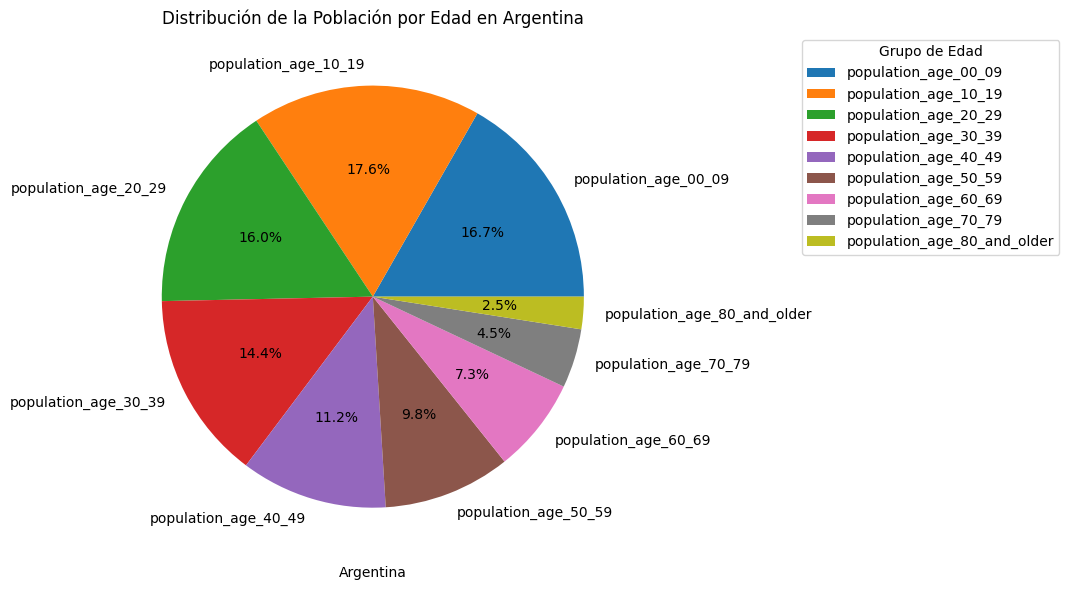

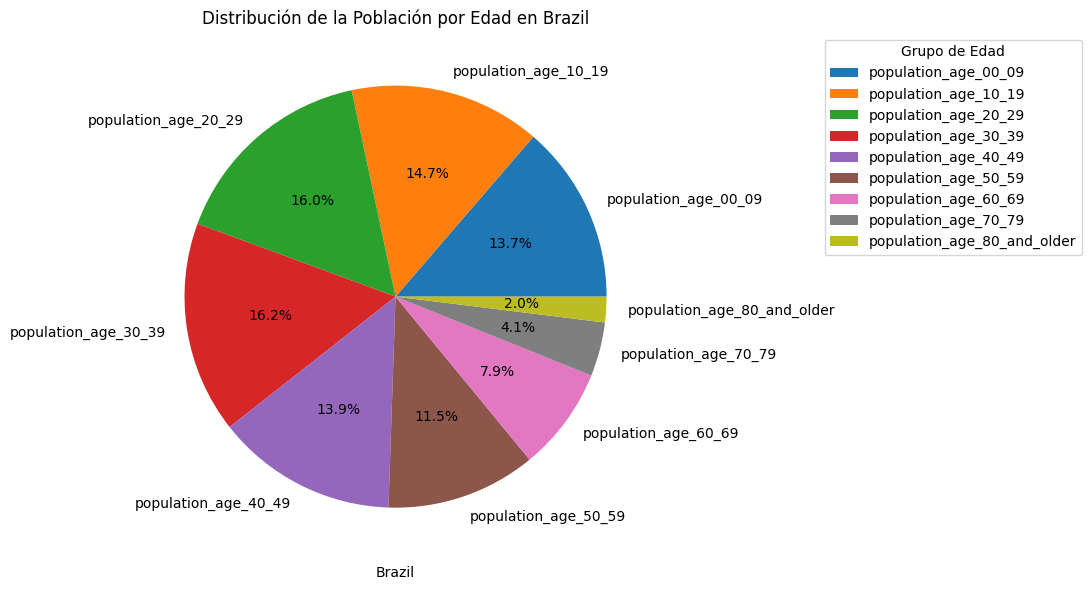

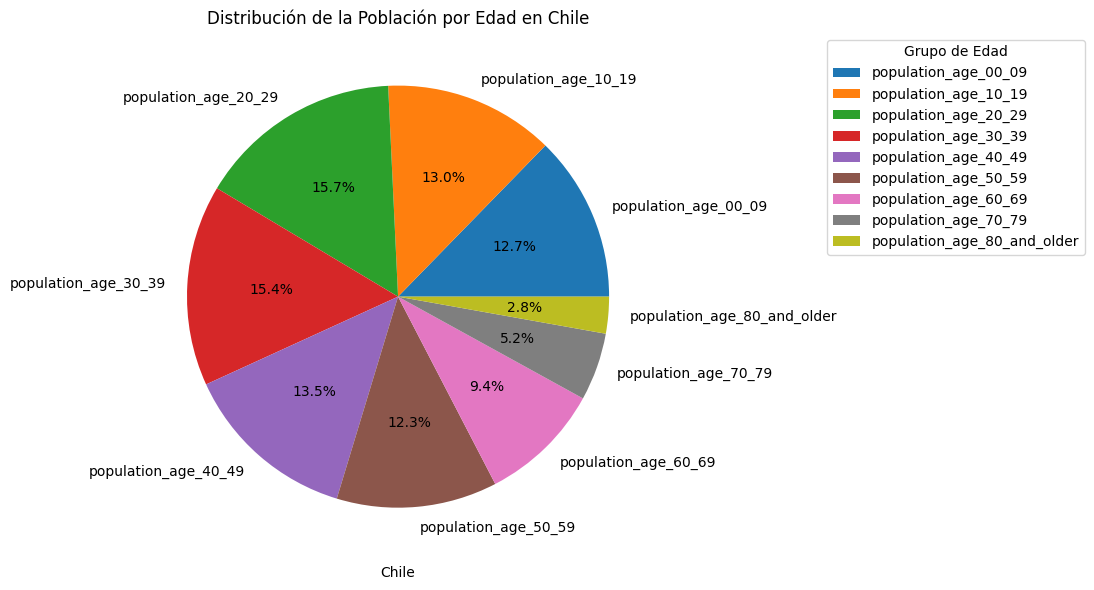

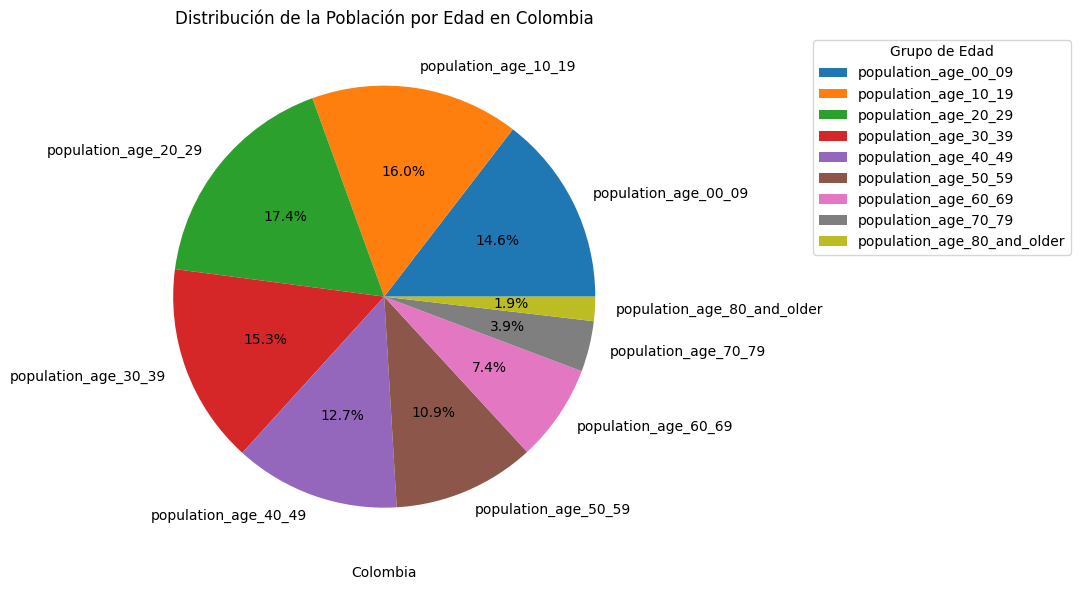

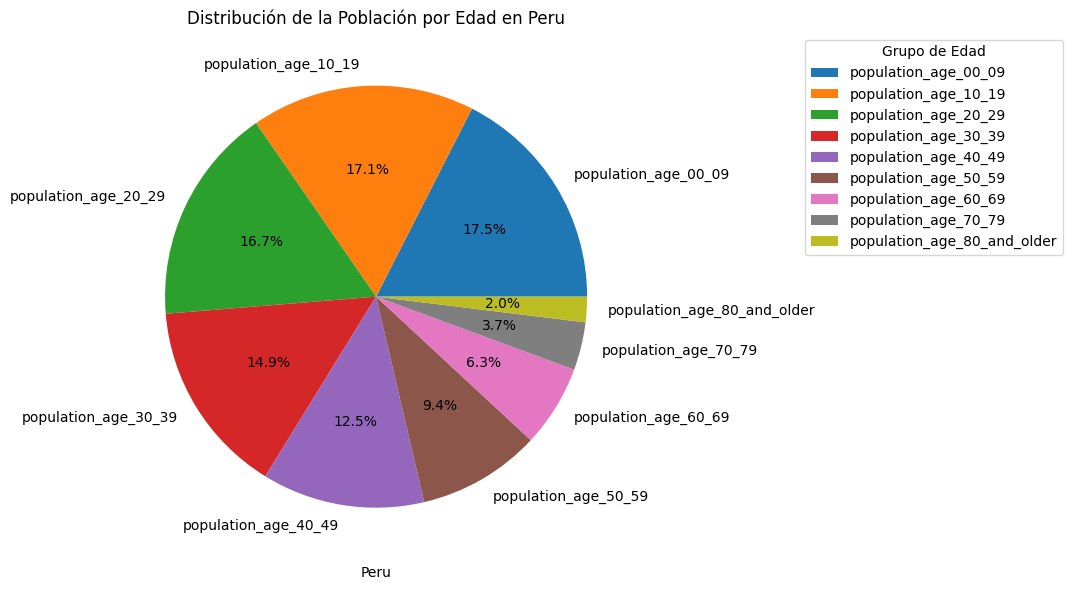

In [103]:
# Densidad de población por grupos de edad
high_mortality_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False).head(5).index
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()
paises = age_distribution.index.unique()

for pais in paises:
    plt.figure(figsize=(12,6))
    plt.pie(
        age_distribution.loc[pais].values,
        labels=age_distribution.loc[pais].index,
        autopct='%1.1f%%'
    )

    # age_distribution.plot(kind='pie', stacked=True, figsize=(12, 8))
    plt.xlabel(f'{pais}')
    plt.title(f'Distribución de la Población por Edad en {pais}')
    plt.legend(bbox_to_anchor=(1.3, 1), loc='upper left', title='Grupo de Edad')
    plt.tight_layout()
    plt.show()

El gráfico muestra claramente la desigualdad en cantidades de población por grupos de edad en los paises seleccionados aunque no proporcione muchas cosas interesantes. Es bueno tenerlo en cuenta para futuros análisis.

Sin embargo podemos empezar a ver como fueron de buenas o malas las estrategias de vacunación para mitigar la mortalidad y los casos confirmados.

In [104]:
data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max()

country_name
Argentina   109204825.00
Brazil      347868481.00
Chile        62204235.00
Colombia     87566541.00
Mexico      209673612.00
Peru         83624934.00
Name: cumulative_vaccine_doses_administered, dtype: float64

In [105]:
data_latinoamerica_paises.groupby('country_name')['population'].mean()

country_name
Argentina    44938712.00
Brazil      212559409.00
Chile        17574003.00
Colombia     50882884.00
Mexico      110991953.00
Peru         29381884.00
Name: population, dtype: float64

In [106]:
data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_paises.groupby('country_name')['population'].mean()

country_name
Argentina   2.43
Brazil      1.64
Chile       3.54
Colombia    1.72
Mexico      1.89
Peru        2.85
dtype: float64

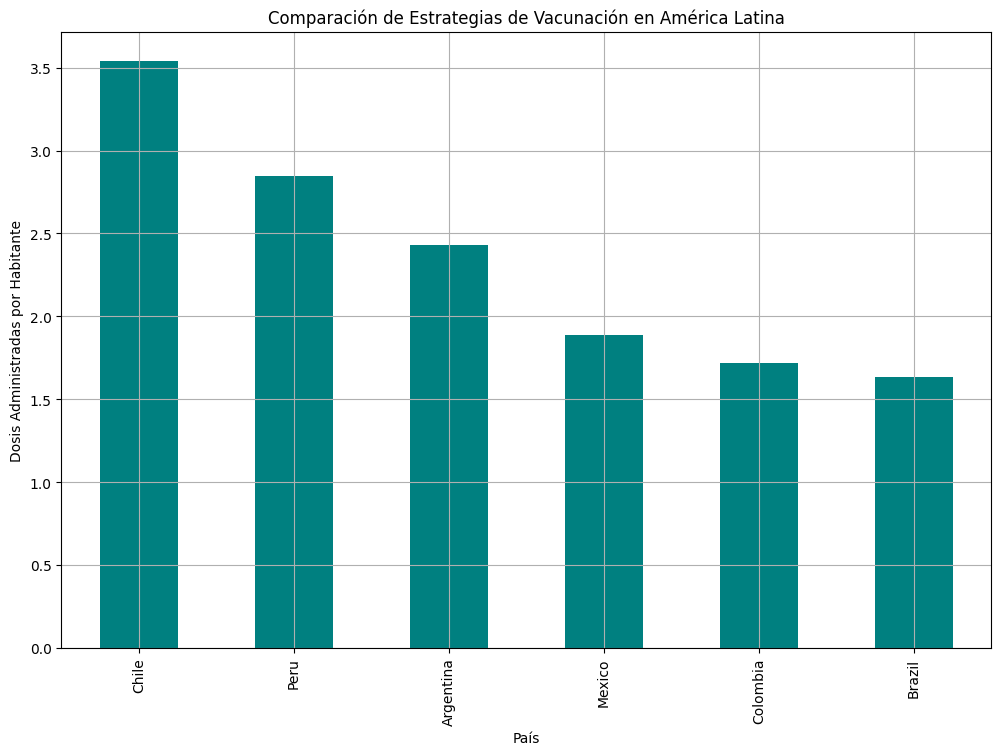

In [107]:
vaccination_strategy = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_paises.groupby('country_name')['population'].mean()
vaccination_strategy.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), color='teal', grid=True)

plt.xlabel('País')
plt.ylabel('Dosis Administradas por Habitante')
plt.title('Comparación de Estrategias de Vacunación en América Latina')
plt.show()

Nuevamente vemos el buen resultado de las politicas de chile y un clara falla en Colombia y Brasil.

Con esto vamos definiendo los paises que necesitan más ayuda y donde se deberían crear los nuevos centros.

Anterioremente revisamos las diabeter pero seria bueno revisarlo en porcentajes para identificar paises.

In [109]:
#- Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad
data_latinoamerica_paises.columns




Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

In [113]:
top_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nlargest(3).index
top_countries

Index(['Peru', 'Chile', 'Brazil'], dtype='object', name='country_name')

In [114]:
bottom_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nsmallest(3).index # 5 paises con menor cantidad de muertes
bottom_countries

Index(['Mexico', 'Argentina', 'Colombia'], dtype='object', name='country_name')

In [115]:
all_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False) # 5 paises con menor cantidad de muertes
all_countries

country_name
Peru        0.01
Chile       0.00
Brazil      0.00
Colombia    0.00
Argentina   0.00
Mexico      0.00
Name: deceased_percentage, dtype: float64

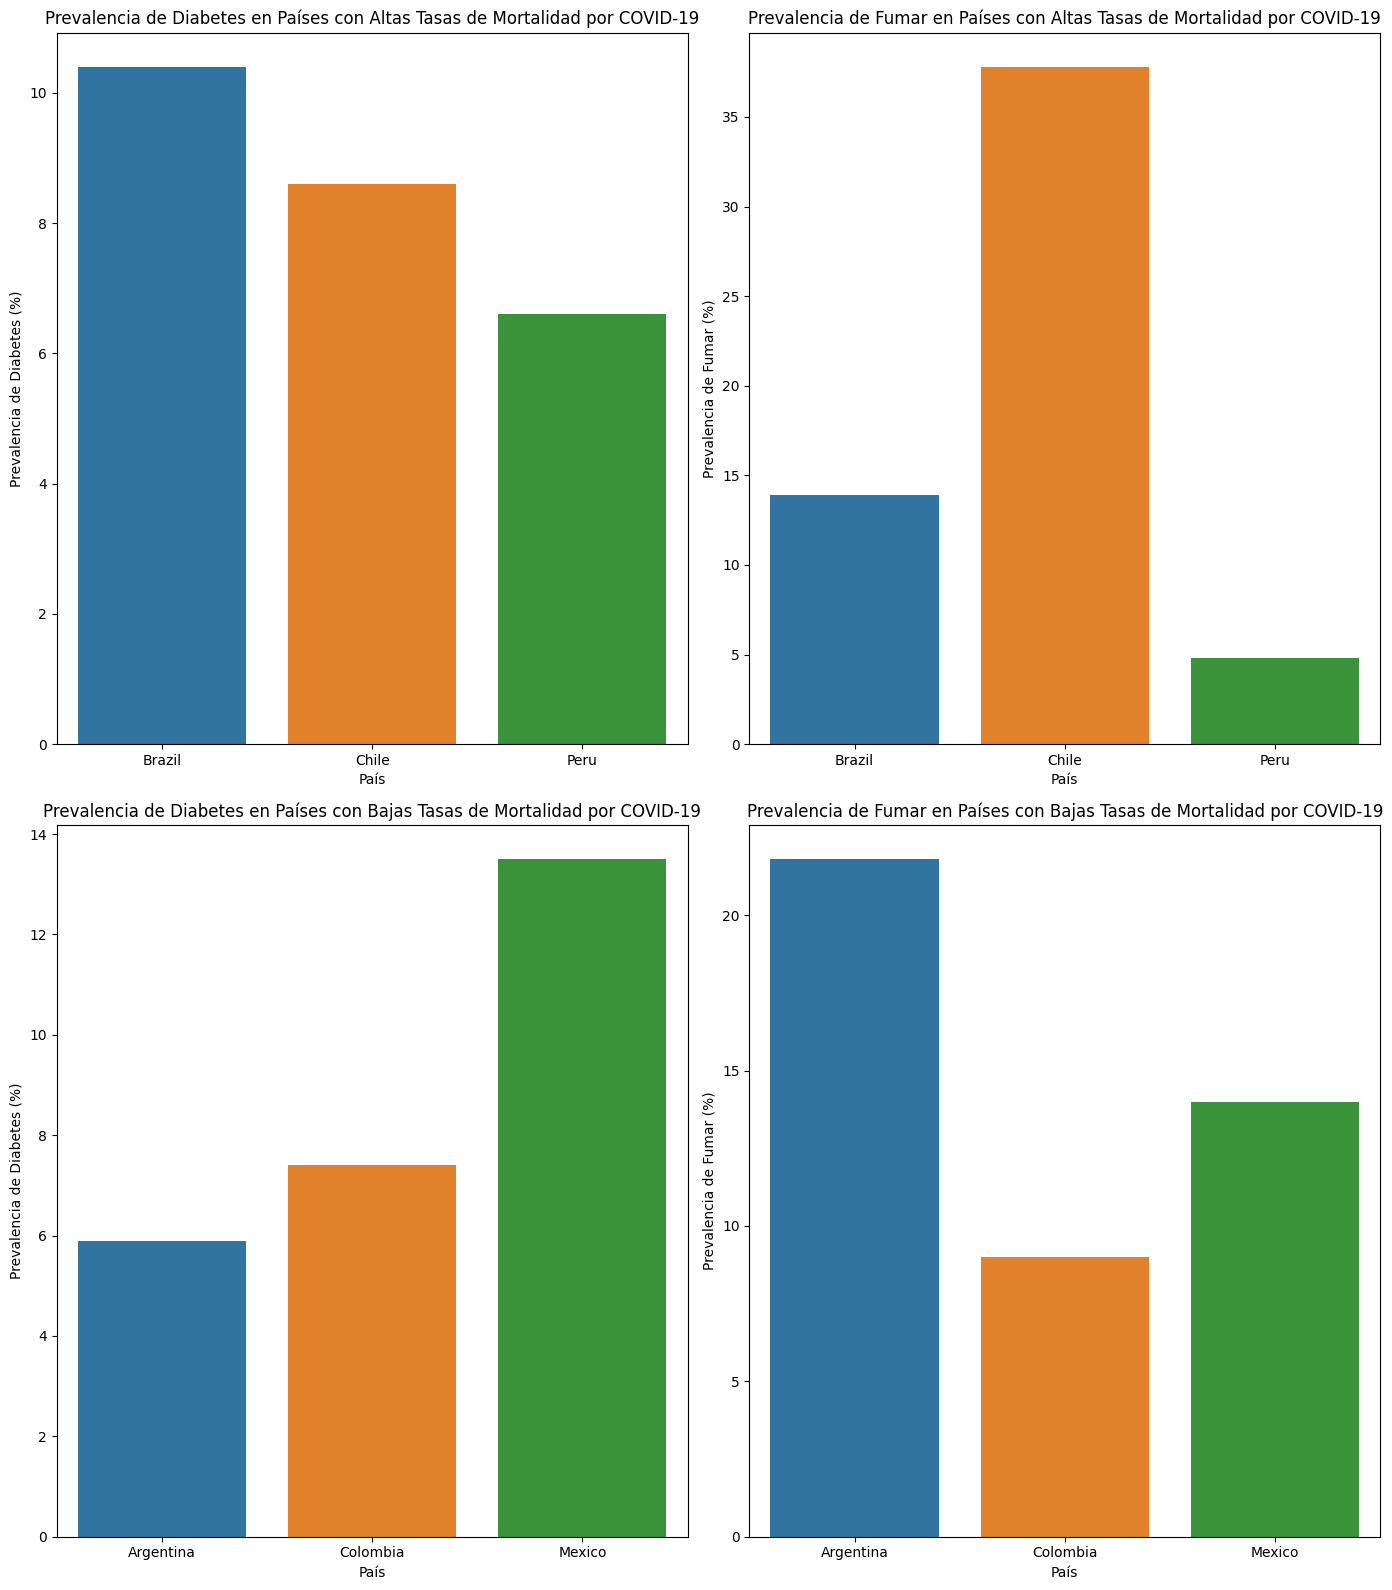

In [116]:
# Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad.

top_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nlargest(3).index # 5 paises con mayor cantidad de muertes
bottom_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nsmallest(3).index # 5 paises con menor cantidad de muertes

conditions_top_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(top_countries)]
conditions_bottom_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(bottom_countries)]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    ncols=2,
    nrows=2,
    figsize=(14, 16)
)

# Prevalencia de diabetes en top
sns.barplot(data=conditions_top_data, x='country_name', y='diabetes_prevalence', hue='country_name', ax=ax1)
ax1.set_xlabel('País')
ax1.set_ylabel('Prevalencia de Diabetes (%)')
ax1.set_title('Prevalencia de Diabetes en Países con Altas Tasas de Mortalidad por COVID-19')

# Prevalencia de fumar en top
sns.barplot(data=conditions_top_data, x='country_name', y='smoking_prevalence', hue='country_name', ax=ax2)
ax2.set_xlabel('País')
ax2.set_ylabel('Prevalencia de Fumar (%)')
ax2.set_title('Prevalencia de Fumar en Países con Altas Tasas de Mortalidad por COVID-19')

# Prevalencia de diabetes en top
sns.barplot(data=conditions_bottom_data, x='country_name', y='diabetes_prevalence', hue='country_name', ax=ax3)
ax3.set_xlabel('País')
ax3.set_ylabel('Prevalencia de Diabetes (%)')
ax3.set_title('Prevalencia de Diabetes en Países con Bajas Tasas de Mortalidad por COVID-19')

# Prevalencia de fumar en top
sns.barplot(data=conditions_bottom_data, x='country_name', y='smoking_prevalence', hue='country_name', ax=ax4)
ax4.set_xlabel('País')
ax4.set_ylabel('Prevalencia de Fumar (%)')
ax4.set_title('Prevalencia de Fumar en Países con Bajas Tasas de Mortalidad por COVID-19')

plt.tight_layout()

plt.show()

Ahora identificamos que la diabetes afecta mucho mas a México y Brasil, por lo que se podría decir que estos paises son los que más han sufrido por la diabetes. Respecto a fumar se puede observar que afecta más a Chile y Argentina, por lo que se podría decir que estos paises son los que más han sufrido por el fumar.

Sin embargo mientras Brasil aparece entre los países con mayor tasa de mortalidad, México aparece entre los ménores. 
Lo mismo pasas entre Chile (mayor) y Argentina (menor)

Por lo que dificilmente pueda entenderse una correlación entre Situaciones Preexistentes y Mortalidad por Covid. 

Y viendo todo esto, ¿cómo se ha visto la fatalidad por país?

In [117]:
#fatalidad por pais
data_latinoamerica_paises['case_fatality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed'] # Otro indice de fatalidad posible. Muertos sobre contagiados. 
fatality_rates = data_latinoamerica_paises.groupby('country_name')['case_fatality_rate'].last().sort_values()
fatality_rates

country_name
Argentina   0.02
Chile       0.02
Brazil      0.02
Colombia    0.03
Mexico      0.06
Peru        0.07
Name: case_fatality_rate, dtype: float64

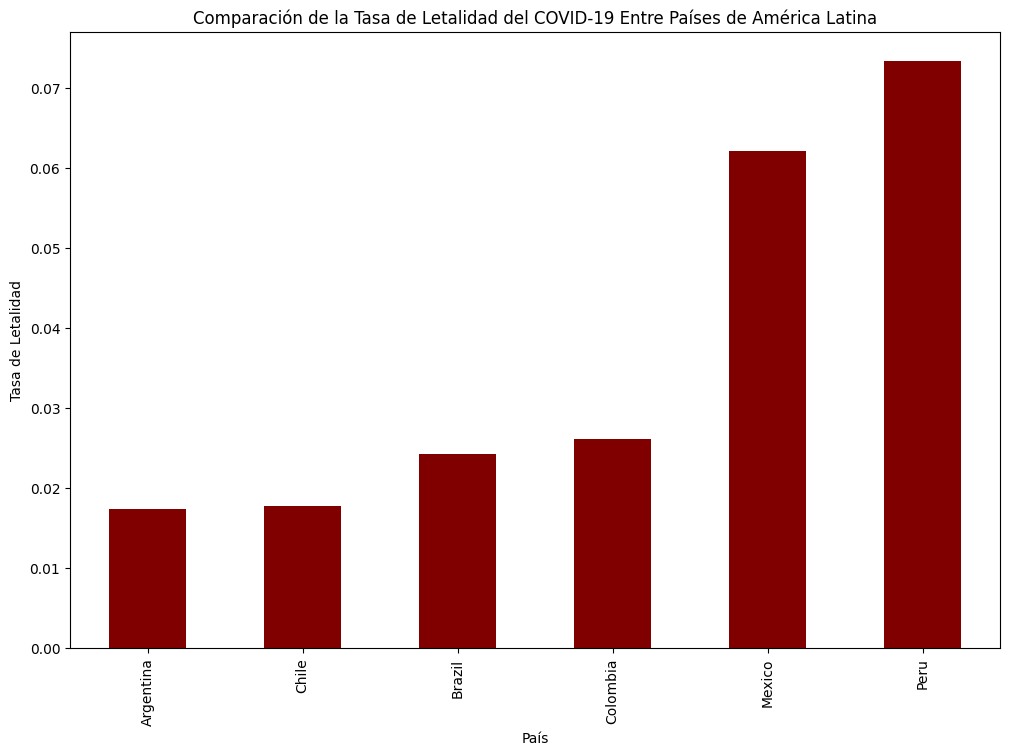

In [118]:
#  Fatalidad por pais

data_latinoamerica_paises['case_fatality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']
fatality_rates = data_latinoamerica_paises.groupby('country_name')['case_fatality_rate'].last().sort_values()

plt.figure(figsize=(12, 8))
fatality_rates.plot(kind='bar', color='maroon')
plt.xlabel('País')
plt.ylabel('Tasa de Letalidad')
plt.title('Comparación de la Tasa de Letalidad del COVID-19 Entre Países de América Latina')
plt.show()

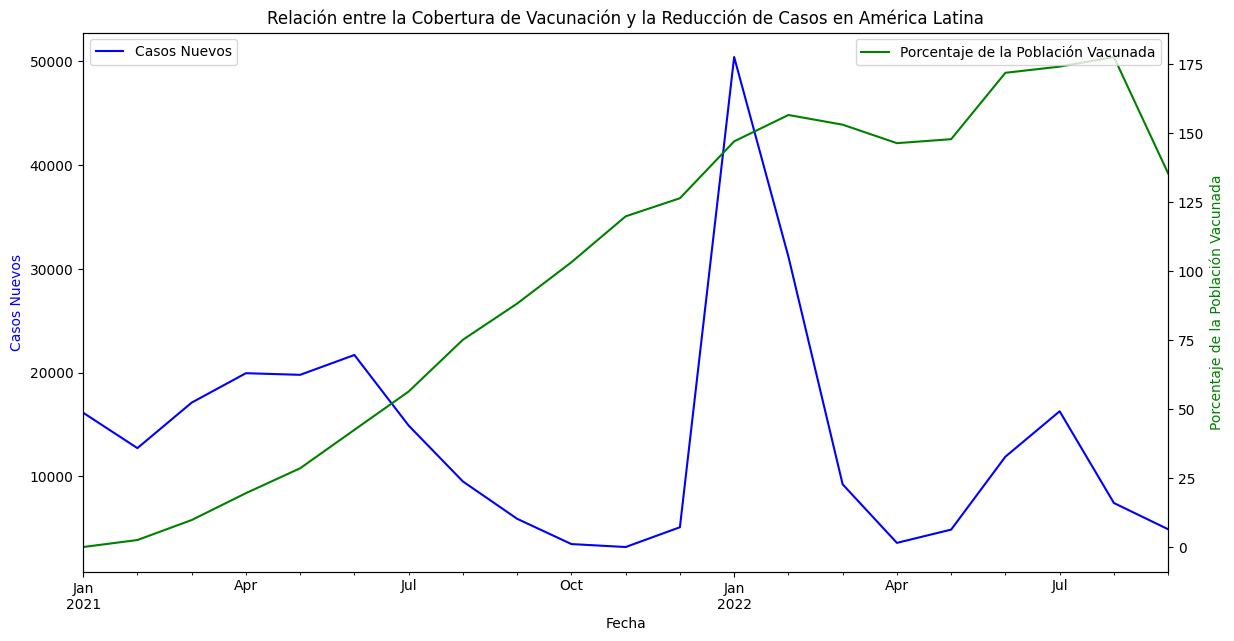

In [123]:
# Como evoluciona la vacunación en América Latina y la reducción de casos de COVID-19
plt.figure(figsize=(14, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()

#crea percentajes de vacunacion
data_latinoamerica_paises['percentage_vaccinated'] = data_latinoamerica_paises['cumulative_vaccine_doses_administered'] / data_latinoamerica_paises['population'] * 100

# Gráfico mis dos lineplots
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='green', label='Porcentaje de la Población Vacunada')


ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Nuevos', color='blue')
ax2.set_ylabel('Porcentaje de la Población Vacunada', color='green')
ax1.set_title('Relación entre la Cobertura de Vacunación y la Reducción de Casos en América Latina')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

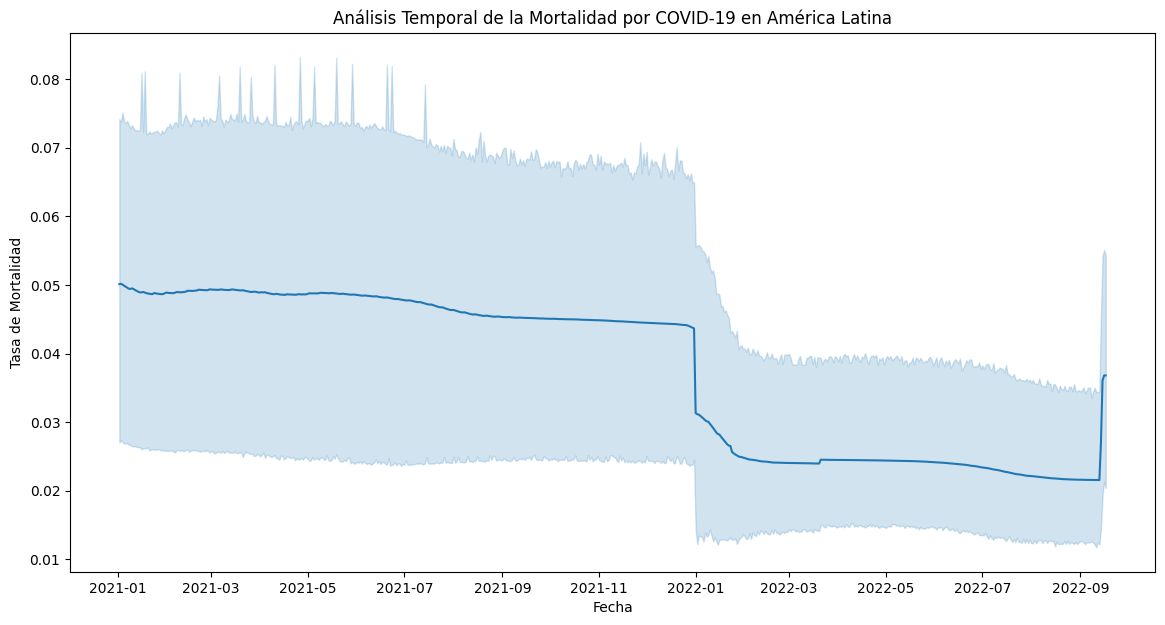

In [124]:
# cómo evolucionó la mortalidad

data_latinoamerica_paises['mortality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=data_latinoamerica_paises, 
    x='date', 
    y='mortality_rate', 
    estimator='mean'
)
plt.title('Análisis Temporal de la Mortalidad por COVID-19 en América Latina')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad')
plt.show()

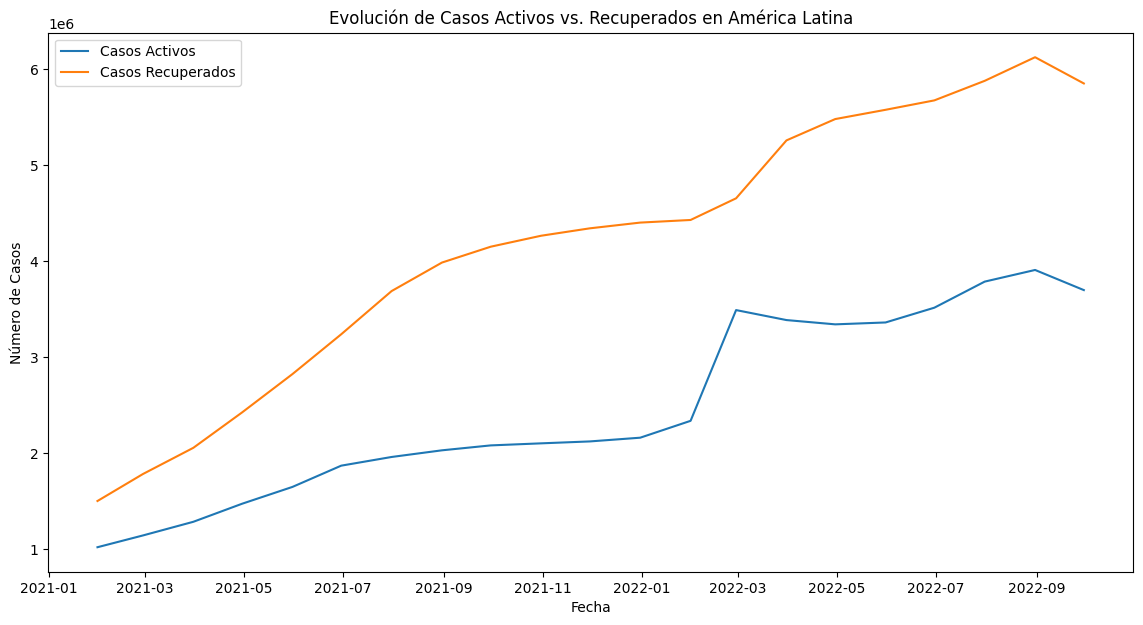

In [125]:
# Como evolucionan los casos activos y recuperados en América Latina
## Creo la columna active cases
data_latinoamerica_paises['active_cases'] = data_latinoamerica_paises['cumulative_confirmed'] - data_latinoamerica_paises['cumulative_deceased'] - data_latinoamerica_paises['cumulative_recovered']

# Grafico dos lineas sobre el mismo eje: 
plt.figure(figsize=(14, 7))
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='active_cases', label='Casos Activos')
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='cumulative_recovered', label='Casos Recuperados')

plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.title('Evolución de Casos Activos vs. Recuperados en América Latina')
plt.legend()
plt.show()

In [126]:
current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].last().sort_values(by="active_cases")
current_situation

active_cases  cumulative_recovered  cumulative_deceased
country_name                                                         
Brazil           813381.51           21180663.69            546022.74
Colombia         952756.88            3688457.10            124442.12
Chile           2199808.03                  0.00             39806.26
Mexico          2307813.31                  0.00            152805.81
Peru            2387951.27                  0.00            188954.37
Argentina       5973862.60                  0.00            105716.12

In [127]:
# Debo usar max() porque last no registra el acumulado de recovered
current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].max().sort_values(by="active_cases")
current_situation

active_cases  cumulative_recovered  cumulative_deceased
country_name                                                         
Colombia        2474151.90            5441021.00            155770.00
Mexico          3754874.00                  0.00            304025.00
Peru            3911439.00                  0.00            216173.00
Chile           4507673.00                  0.00             60822.00
Argentina       9567933.00                  0.00            129830.00
Brazil         12638643.31           33706231.00            685203.00

In [128]:
data_latinoamerica_paises[['country_name','active_cases', 'cumulative_recovered', 'cumulative_deceased']].loc[
    (data_latinoamerica_paises.index >= data_latinoamerica_paises.index.max())
]

country_name  active_cases  cumulative_recovered  \
date                                                          
2022-09-17    Argentina    5973862.60                  0.00   
2022-09-17       Brazil     813381.51           21180663.69   
2022-09-17        Chile    2199808.03                  0.00   
2022-09-17     Colombia     952756.88            3688457.10   
2022-09-17       Mexico    2307813.31                  0.00   
2022-09-17         Peru    2387951.27                  0.00   

            cumulative_deceased  
date                             
2022-09-17            105716.12  
2022-09-17            546022.74  
2022-09-17             39806.26  
2022-09-17            124442.12  
2022-09-17            152805.81  
2022-09-17            188954.37

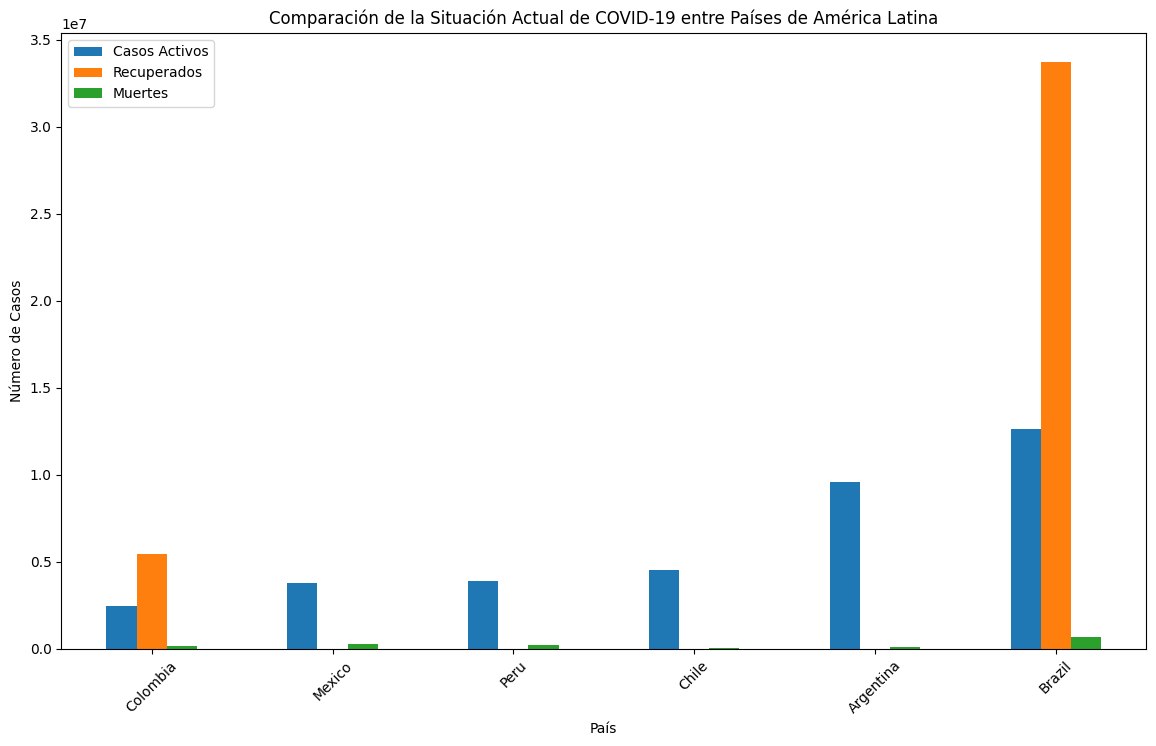

In [129]:
# No se tienen dato pero hay datos de recuperados y muertes en algunos paises
current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].max().sort_values(by="active_cases")
current_situation.plot(kind='bar', stacked=False, figsize=(14, 8))
plt.title('Comparación de la Situación Actual de COVID-19 entre Países de América Latina')
plt.xlabel('País')
plt.ylabel('Número de Casos')
plt.legend(['Casos Activos', 'Recuperados', 'Muertes'])
plt.xticks(rotation=45)
plt.show()

In [130]:
! pip install folium

   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   ------------------------------------- -- 102.4/108.4 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 108.4/108.4 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/133.3 kB ? eta -:--:--
   ---------------------------------------- 133.3/133.3 kB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/64.9 kB ? eta -:--:--
   ---------------------------------------- 64.9/64.9 kB 3.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/85.1 kB ? eta -:--:--
   ---------------------------------------- 85.1/85.1 kB 5.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/167.3 kB ? eta -:--:--
   ---------------------------------------  163.8/167.3 kB 9.6 MB/s eta 0:00:01
   ---------------------------------------- 167.3/167.3 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/100.4 kB ? eta -:--:--
   -----------------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [131]:
# mapa para ver la distribución de casos confirmado, muertes, vacuna y recuperados
import folium
from folium.plugins import HeatMap

# Seleccionamos las columnas que vamos a utilizar
columns = ['latitude', 'longitude', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'cumulative_recovered']
data_map = data_latinoamerica_paises[columns].dropna()

# Creamos un mapa centrado en América Latina
map = folium.Map(location=[-14.235004, -51.92528], zoom_start=3)

# Creamos un mapa de calor para los casos confirmados
heat_map_confirmed = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_confirmed']], radius=15)
map.add_child(heat_map_confirmed)

# Creamos un mapa de calor para las muertes
heat_map_deceased = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_deceased']], radius=15)
map.add_child(heat_map_deceased)

# Creamos un mapa de calor para las vacunas administradas
heat_map_vaccine = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_vaccine_doses_administered']], radius=15)
map.add_child(heat_map_vaccine)

# Creamos un mapa de calor para los recuperados
heat_map_recovered = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_recovered']], radius=15)
map.add_child(heat_map_recovered)

map.save('mapa.html')

map